### Contents

### [1. Introduction](#INTRO)

### [2. Data Exploration](#DE)
#### [2.1 Loading libraries](#DE1)
#### [2.2 High level data overview using summary statistics](#DE2)
#### [2.3 Checking the correlation between variables](#DE3)
#### [2.4 View the variable distributions using boxplots and histograms](#DE4)
#### [2.5 Relationship between predictors and critical temperature](#DE5)
#### [2.6 Identification of near zero variance predictors](#DE6)

### [3. Model Development](#MD)
#### [3.1 Linear Model](#MD1)
#### [3.1 a. Full Linear Model](#MD1a)
#### [3.1 b. Checking correlation of all the attributes variable against the target variable](#MD1b)
#### [3.1.c. Variance Inflation Factor](#MD1c)
#### [3.2 Using stepwise backward, forward and exhaustive method for subset selection](#MD2)
#### [3.3 Lasso Regularisation for feature selection](#MD3)
#### [3.4 Ridge Regularisation for feature selection](#MD4)
#### [3.5 Elastic Net Regularisation for feature selection](#MD4)
#### [3.6 Random Forest Model](#MD5)

### [4. Model Comparision](#MC)
### [5. Variable Identification and Explanation](#VE)
### [6. Conclusion](#CON)
### [7. References](#REF)


<a id='INTRO'></a>
# 1. Introduction

Superconductivity is a phenomenon of exactly zero electrical resistance and expulsion of magnetic flux fields occurring in certain materials, called super-conductors, when cooled below a characteristic critical temperature. Super-conductors are widely used in many industries, e.g. the Magnetic Resonance Imaging (MRI) in health care, electricity transportation in energy industry and magnetic separation, etc.

Aim of this assignment is to predict the critical temperature (Tc) of a superconductor based on data from the Super-conducting Material Database maintained by Japan's National Institute for Materials Science (NIMS), by building statistical models that can predict Tc based on the material's chemical properties.

The two questions to be answered are:
 predict the critical temperature Tc given some chemical properties of a material?
 explain your prediction and the associated findings? For example, describe the key properties associated with the response variable.

<a id='DE'></a>
# 2. Data Exploration

This section aims at understanding the data at hand on a high level, using summary statistics and by assessing interaction between the variables.

<a id='DE1'></a>
### 2.1 Loading libraries 

In [2]:
## Loading libraries 
options(warn = -1)
library(reshape2) #for manipulating data
library(car) #for boxplots
library(stats) #for different functions
library(scales) #for axis, labelling
library(grid) #for graphic layout
library(gridExtra) #for multiple  grids
library(RColorBrewer) #for color palatte
library(psych) #for describe
library(lattice) #for levelplot, correlation
library(caret) #for non zero var 
library(randomForest) #for random forest
library(glmnet) #for linear modelling
library(cvTools) #for cross validation
library(fmsb) #for vif function
library(leaps) #for regsubsets
library(caret) #functions for training and plotting misc models
library(e1071) #functions for misc models


<a id='DE2'></a>
### 2.2 High level data overview using summary statistics

In [3]:
#loading the data
df_super <- read.csv('train.csv', header = TRUE) 

In [4]:
# Display the dimensions
cat("The super conductor dataset has", dim(df_super)[1], "records, each with", dim(df_super)[2], "attributes\n")

The super conductor dataset has 21263 records, each with 82 attributes


In [5]:
# Display the structure
cat("The structure is:\n")
str(df_super)

The structure is:
'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 1011 1010 ...
 $ gmean_fie                      : num  718 721 

In [6]:
cat("\nThe first 6 records in the dataset are:")
head(df_super)


The first 6 records in the dataset are:

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


In [7]:
cat("\nThe summary of dataset:")
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

round(describe(df_super),2)[1:30,]
round(describe(df_super),2)[31:60,]
round(describe(df_super),2)[61:82,]


The summary of dataset:

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
number_of_elements,1,21263,4.12,1.44,4.00,4.11,1.48,1.00,9.00,8.00,0.01,-0.69,0.01
mean_atomic_mass,2,21263,87.56,29.68,84.92,85.82,19.98,6.94,208.98,202.04,0.77,2.06,0.20
wtd_mean_atomic_mass,3,21263,72.99,33.49,60.70,68.41,18.41,6.42,208.98,202.56,1.50,2.83,0.23
gmean_atomic_mass,4,21263,71.29,31.03,66.36,67.62,15.26,5.32,208.98,203.66,1.47,3.33,0.21
wtd_gmean_atomic_mass,5,21263,58.54,36.65,39.92,52.08,15.27,1.96,208.98,207.02,1.70,2.90,0.25
entropy_atomic_mass,6,21263,1.17,0.36,1.20,1.19,0.36,0.00,1.98,1.98,-0.79,0.31,0.00
wtd_entropy_atomic_mass,7,21263,1.06,0.40,1.15,1.09,0.38,0.00,1.96,1.96,-0.63,-0.20,0.00
range_atomic_mass,8,21263,115.60,54.63,122.91,118.75,60.83,0.00,207.97,207.97,-0.38,-0.68,0.37
wtd_range_atomic_mass,9,21263,33.23,26.97,26.64,28.70,16.09,0.00,205.59,205.59,2.46,8.38,0.18
std_atomic_mass,10,21263,44.39,20.04,45.12,45.34,19.20,0.00,101.02,101.02,-0.35,-0.44,0.14


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
wtd_std_atomic_radius,31,21263,52.34,25.29,59.93,54.73,26.00,0.00,97.14,97.14,-0.65,-0.86,0.17
mean_Density,32,21263,6111.47,2846.79,5329.09,5671.49,1593.67,1.43,22590.00,22588.57,2.10,6.18,19.52
wtd_mean_Density,33,21263,5267.19,3221.31,4303.42,4710.39,2027.44,1.43,22590.00,22588.57,2.14,6.23,22.09
gmean_Density,34,21263,3460.69,3703.26,1339.97,2830.86,1078.96,1.43,22590.00,22588.57,1.66,3.19,25.40
wtd_gmean_Density,35,21263,3117.24,3975.12,1515.36,2430.88,2164.20,0.69,22590.00,22589.31,1.65,3.43,27.26
entropy_Density,36,21263,1.07,0.34,1.09,1.10,0.34,0.00,1.95,1.95,-0.81,0.61,0.00
wtd_entropy_Density,37,21263,0.86,0.32,0.88,0.88,0.29,0.00,1.70,1.70,-0.60,0.41,0.00
range_Density,38,21263,8665.44,4097.13,8958.57,8574.03,2338.91,0.00,22588.57,22588.57,0.38,1.16,28.10
wtd_range_Density,39,21263,2902.74,2398.47,2082.96,2471.93,923.60,0.00,22434.16,22434.16,3.32,15.76,16.45
std_Density,40,21263,3416.91,1673.62,3301.89,3314.42,902.40,0.00,10724.37,10724.37,0.86,2.13,11.48


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
wtd_std_FusionHeat,61,21263,7.72,7.29,5.50,6.23,1.84,0.00,51.68,51.68,2.85,9.08,0.05
mean_ThermalConductivity,62,21263,89.71,38.52,96.50,89.98,29.59,0.03,332.50,332.47,0.22,1.40,0.26
wtd_mean_ThermalConductivity,63,21263,81.55,45.52,73.33,76.95,35.97,0.03,406.96,406.93,1.38,4.09,0.31
gmean_ThermalConductivity,64,21263,29.84,34.06,14.29,23.03,10.81,0.03,317.88,317.86,2.34,7.75,0.23
wtd_gmean_ThermalConductivity,65,21263,27.31,40.19,6.10,19.12,8.12,0.02,376.03,376.01,2.59,10.20,0.28
entropy_ThermalConductivity,66,21263,0.73,0.33,0.74,0.73,0.38,0.00,1.63,1.63,-0.12,-0.64,0.00
wtd_entropy_ThermalConductivity,67,21263,0.54,0.32,0.55,0.52,0.40,0.00,1.61,1.61,0.31,-0.85,0.00
range_ThermalConductivity,68,21263,250.89,158.70,399.80,261.32,4.14,0.00,429.97,429.97,-0.23,-1.76,1.09
wtd_range_ThermalConductivity,69,21263,62.03,43.12,56.56,57.77,45.73,0.00,401.44,401.44,1.42,4.41,0.30
std_ThermalConductivity,70,21263,98.94,60.14,135.76,101.30,50.06,0.00,214.99,214.99,-0.23,-1.64,0.41


In [8]:
summary(df_super)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

Entropy and Valence columns have a small range between 1 and 7 

In [9]:
cat("Checking if any column has NA\n")
# Return no. of NA values for each attribute
sum(colSums(is.na(df_super)))

Checking if any column has NA


[1] 0

In [10]:
cat("There are is no missing data in any of the columns\n")

There are is no missing data in any of the columns


Checking the spread of critical temperature.


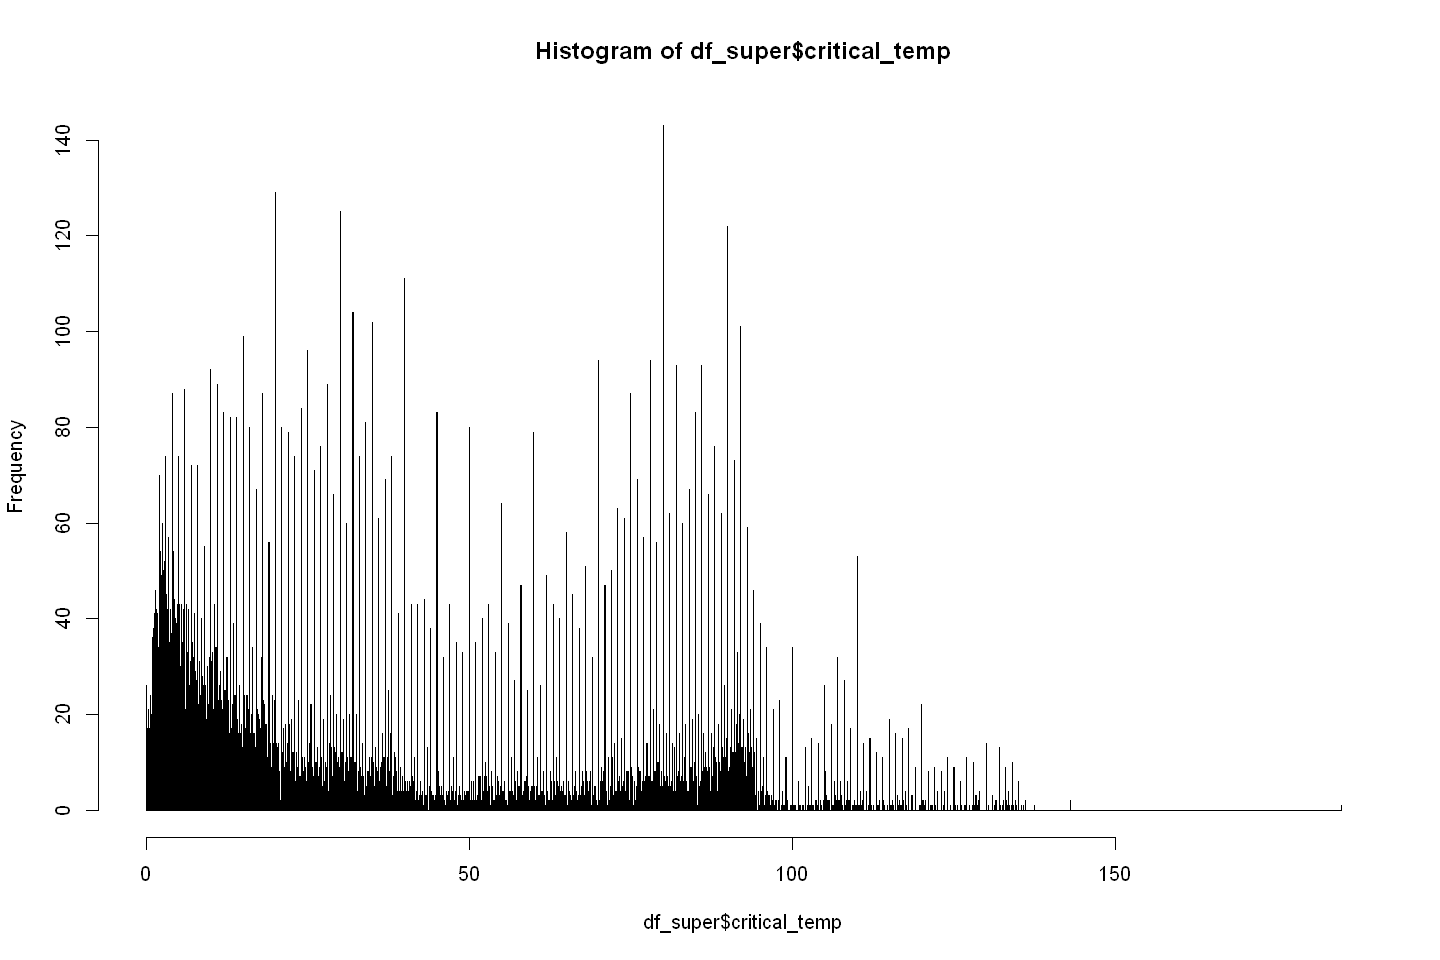

In [11]:
options(repr.plot.width = 12, repr.plot.height = 8)
hist(df_super$critical_temp, breaks = 20000)

This plot shows that most values of critical temperature is less than 50 and fewer observations have very critical temperature of more than 100.

<a id='DE3'></a>
### 2.3 Checking the correlation between variables

The section will help us understand the important metrics that are highly corelated with critical temperature both positively and negatively. Also we can understand which variables are highly corelated to each other which in turn will help us remove redundant attributes. 

In [12]:
cat("Correlation for each attribute against all other attributes:\n")
cor(df_super)

Correlation for each attribute against all other attributes:


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000000,-0.141922797,-0.353064435,-0.292968819,-0.454525138,0.93930406,0.881845150,0.682777066,-0.320293446,0.5139981526,0.546391203,0.167450898,0.484444731,0.024228530,0.4241522235,0.97319533,0.719209167,0.781226913,0.329623733,6.740048e-01,0.717830737,-0.0013888223,-0.42214416,-0.240444347,-0.518255859,0.97224524,0.904120682,0.768060022,-0.371349583,0.6248102983,0.69508858,-0.41867470,-0.507895375,-0.6305040923,-0.64988231,0.871831749,0.767078421,0.413485633,-0.355389487,0.21072387,0.334072073,-0.1193025717,0.195607767,-0.3560672476,-0.052883973,0.87730402,0.62579840,0.53154041,0.241411233,0.42373826,0.4808125440,-0.437624455,-0.449271665,-0.514251754,-0.519109340,0.900759345,0.86047882,0.005734172,-0.371787677,-0.1133612277,-0.074796377,0.227655893,0.206068511,-0.485323530,-0.469206128,0.501871343,0.207065208,0.69605999,0.316771509,0.60201807,0.66557986,-0.60941236,-0.648550851,-0.61851245,-0.65926774,0.967832451,0.892559475,0.231873976,-0.44776982,0.1053651524,3.521629e-02,0.60106857
mean_atomic_mass,-0.141922797,1.000000000,0.815977034,0.940298163,0.745840579,-0.10400015,-0.097609229,0.125658599,0.446224904,0.1964604909,0.130675110,-0.285781955,-0.222097406,-0.240565224,-0.2193812727,-0.16693490,-0.163564893,-0.255627735,-0.080544826,-2.765606e-01,-0.222811916,0.4976636306,0.37675980,0.561060699,0.359894450,-0.14003444,-0.147603805,-0.270694807,0.141100325,-0.3264029059,-0.28043975,0.75686112,0.608934913,0.5964846429,0.52558812,-0.043415596,0.026324752,0.198067091,0.342390738,0.24504240,0.180942527,0.0882295363,0.061103034,0.1892824348,0.134382340,-0.09153941,-0.10765065,-0.18706859,0.010235114,-0.16496019,-0.1331005498,-0.137668902,-0.135428565,0.014818495,-0.043002734,-0.008498640,-0.02854094,-0.347581882,-0.167527922,-0.3379688013,-0.335778336,-0.158265641,-0.065988791,0.006004074,0.056394180,-0.100076682,-0.098220524,-0.11453787,-0.027789696,-0.11065781,-0.11085641,0.37409881,0.304683244,0.39215274,0.32139894,-0.156786430,-0.145610386,-0.107449727,0.16863251,-0.0802785631,-8.125268e-02,-0.11352325
wtd_mean_atomic_mass,-0.353064435,0.815977034,1.000000000,0.848241529,0.964085105,-0.30804601,-0.412665507,-0.144029437,0.716623230,-0.0607391526,-0.089470766,-0.209296217,-0.522595267,-0.109490435,-0.5081088151,-0.36977251,-0.129779058,-0.452303149,-0.420457052,-4.593235e-01,-0.492250297,0.2884514847,0.66001105,0.468457460,0.667112083

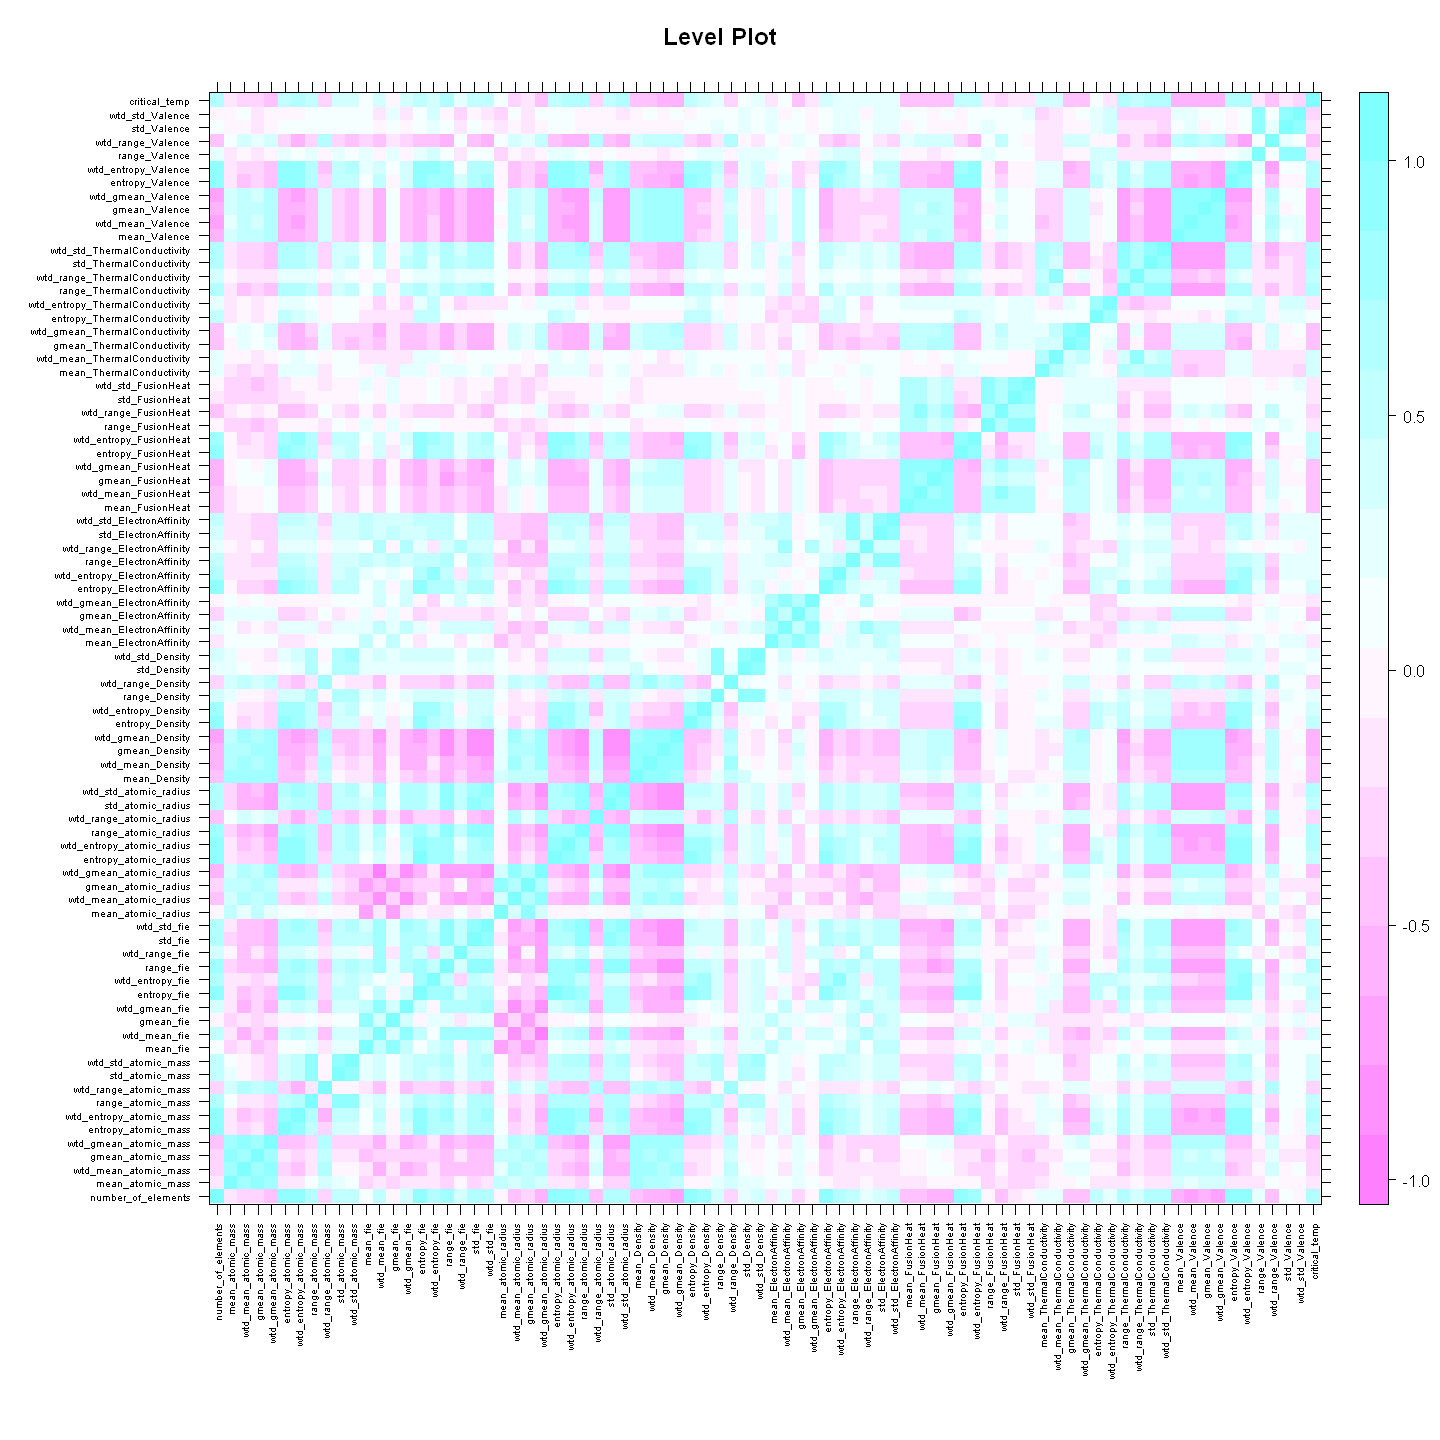

In [13]:
options(repr.plot.width = 12, repr.plot.height = 12)
levelplot(cor(df_super),scales = list(x=list(rot=90,cex=0.5),y=list(cex=0.5)), 
          main="Level Plot",xlab="",ylab="")

It is very hard to deduce corelation pattern in this data as of the variables seem highly corelated in either the positive or negative direction.

In [79]:
cat("Top 200 most correlated attributes:\n")
cor_ <- as.data.frame.table(cor(df_super[ , -ncol(df_super)]))
colnames(cor_) <- c("a", "b", "cor")
cor_ <- cor_[cor_$a != cor_$b, ]
cor_ <- cor_[order(abs(cor_$cor), decreasing = TRUE), ]
cor_ <- cor_[seq(1, nrow(cor_), 2), ]
cor_$cor <- round(cor_$cor, 2)
rownames(cor_) <- 1:nrow(cor_)
colnames(cor_) <- c("Attribute1", "Attribute2", "Correlation")
print(cor_[1:200, ])

Top 200 most correlated attributes:
                         Attribute1                   Attribute2 Correlation
1             entropy_atomic_radius                  entropy_fie        1.00
2                 wtd_gmean_Valence             wtd_mean_Valence        0.99
3                   entropy_Valence                  entropy_fie        0.99
4                     wtd_gmean_fie                 wtd_mean_fie        0.99
5                     gmean_Valence                 mean_Valence        0.99
6                   entropy_Valence        entropy_atomic_radius        0.99
7           std_ThermalConductivity    range_ThermalConductivity        0.99
8                    std_FusionHeat             range_FusionHeat        0.98
9                           std_fie                    range_fie        0.98
10          wtd_gmean_atomic_radius       wtd_mean_atomic_radius        0.98
11                      std_Valence                range_Valence        0.97
12                      entropy_fie     

Notes:
1. The columns 'entropy_atomic_radius' and 'entropy_fie' has a corelation of 1.0 which makes one of them highly redundant with respect to information 
2. Other columns that are highlly corelated are:
'wtd_gmean_Valence' and 'wtd_mean_Valence'
'entropy_Valence' and 'entropy_fie'        
'wtd_gmean_fie' and 'wtd_mean_fie'        
'gmean_Valence' and 'mean_Valence'        
'entropy_Valence' and 'entropy_atomic_radius'        
'std_ThermalConductivity' and 'range_ThermalConductivity' 
and so on
In general the variations of the same variable in terms of mean and weighted mean, std and range etc are highly correlated


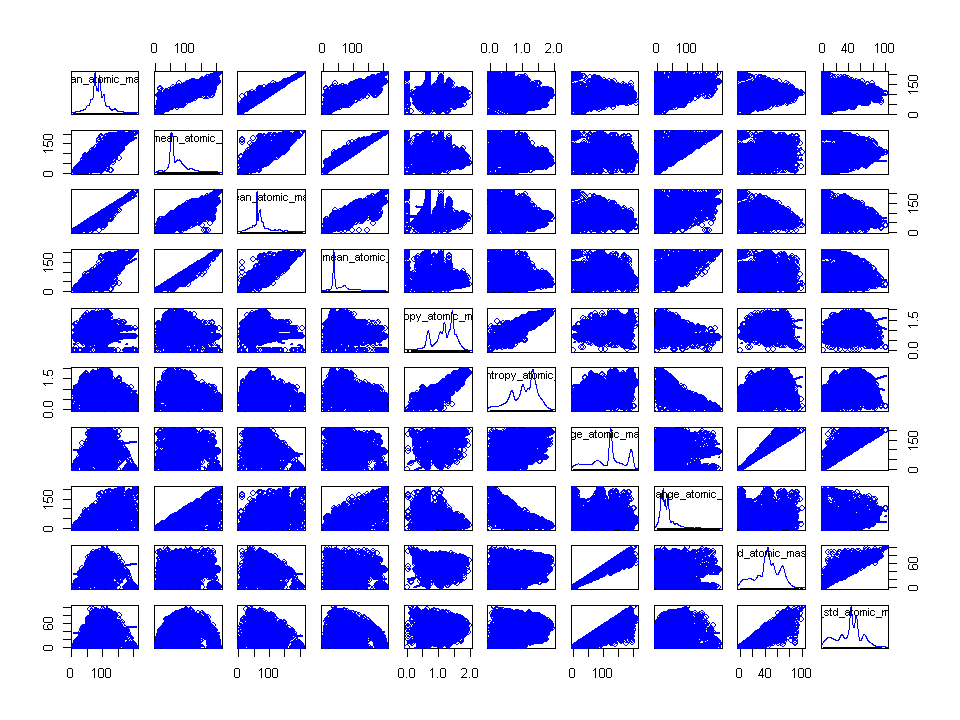

In [14]:
options(repr.plot.width = 8, repr.plot.height = 6)
scatterplotMatrix(~mean_atomic_mass+wtd_mean_atomic_mass+gmean_atomic_mass+wtd_gmean_atomic_mass+
                  entropy_atomic_mass+wtd_entropy_atomic_mass+range_atomic_mass+wtd_range_atomic_mass+
                  std_atomic_mass+wtd_std_atomic_mass,data=df_super)


Notes:

mean_atomic_mass is highly corelated with gmean_atomic_mass

wtd_mean_atomic_mass is highly corelated with wtd_gmean_atomic_mass

gmean_atomic_mass is also corelated with wtd_gmean_atomic_mass

wtd_entropy_atomic_mass is corelated with range_atomic_mass

range_atomic_mass is highyly corelated with std_atomic_mass and wtd_std_atomic_mass

std_atomic_mass are wtd_std_atomic_mass also corelated pairs


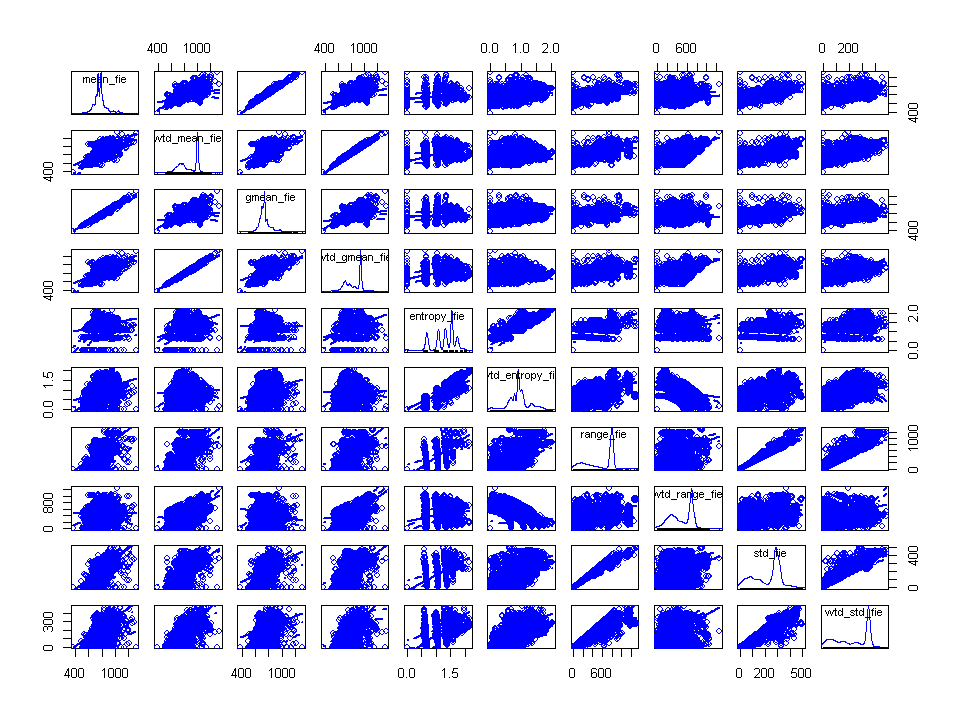

In [181]:
options(repr.plot.width = 8, repr.plot.height = 6)
scatterplotMatrix(~mean_fie+wtd_mean_fie+gmean_fie+wtd_gmean_fie+entropy_fie+wtd_entropy_fie+
                  range_fie+wtd_range_fie+std_fie+wtd_std_fie,data=df_super)


Notes:

mean_fie is highlly corelated with gmean_fie

wtd_mean_fie is corelated with wtd_gmean_fie

range_fie highly corelated with with std_fie and wtd_std_fie

std_fie and wtd_std_fie are corelated pairs

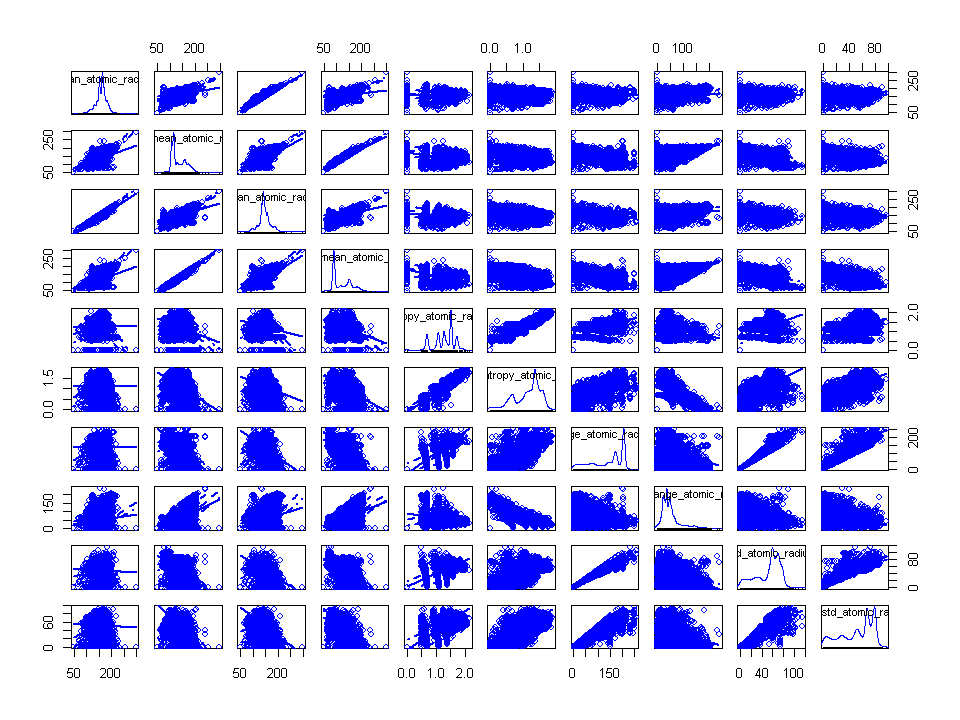

In [174]:
options(repr.plot.width = 8, repr.plot.height = 6)
scatterplotMatrix(~mean_atomic_radius+wtd_mean_atomic_radius+gmean_atomic_radius+wtd_gmean_atomic_radius+
                  entropy_atomic_radius+wtd_entropy_atomic_radius+range_atomic_radius+
                  wtd_range_atomic_radius+std_atomic_radius+wtd_std_atomic_radius,data=df_super)


Notes:

mean_atomic_radius is highly corelated with gmean_atomic_radius

wtd_mean_atomic_radius is highly corelated with gmean_atomic_radius

entropy_atomic_radius and wtd_entropy_atomic_radius corelated

range_atomic_radius is highly corelated with both std_atomic_radius+wtd_std_atomic_radius

std_atomic_radius and wtd_std_atomic_radius are highly corelated pairs


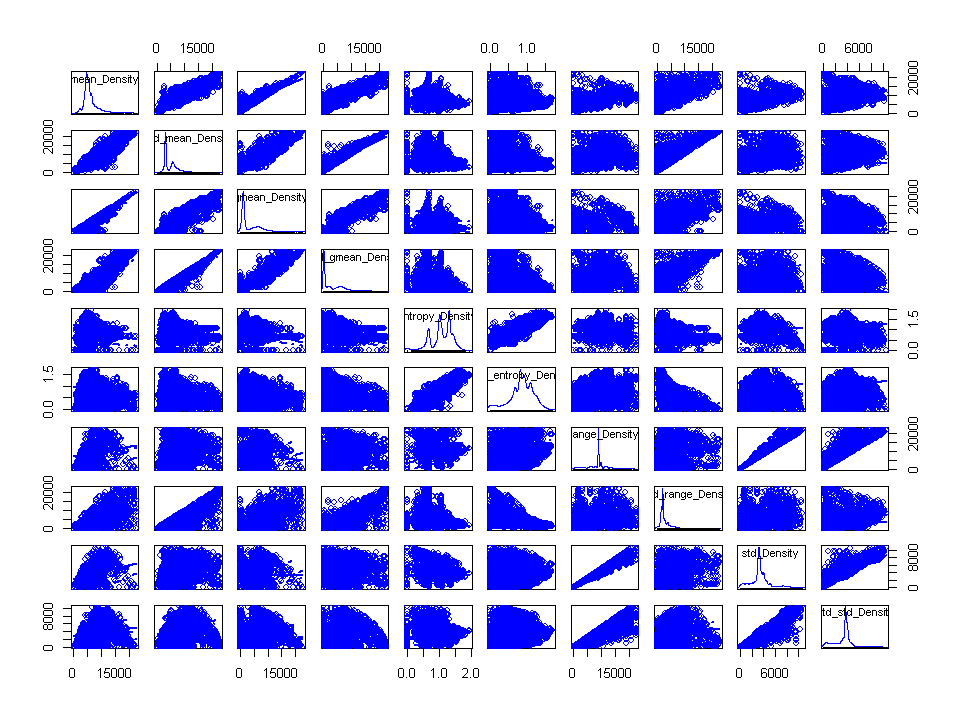

In [175]:
options(repr.plot.width = 8, repr.plot.height = 6)
scatterplotMatrix(~mean_Density+wtd_mean_Density+gmean_Density+wtd_gmean_Density+
                  entropy_Density+wtd_entropy_Density+range_Density+
                  wtd_range_Density+std_Density+wtd_std_Density,data=df_super)



Notes:

mean_Density is highly corelated with gmean_Density

wtd_mean_Density and wtd_gmean_Density are corelated as well

gmean_Density and wtd_gmean_Density are highly corelated

entropy_Density and entropy_Density corelated

range_Density is highly corelated with both std_Density and wtd_std_Density

std_Density and wtd_std_Density are highly corelated pairs


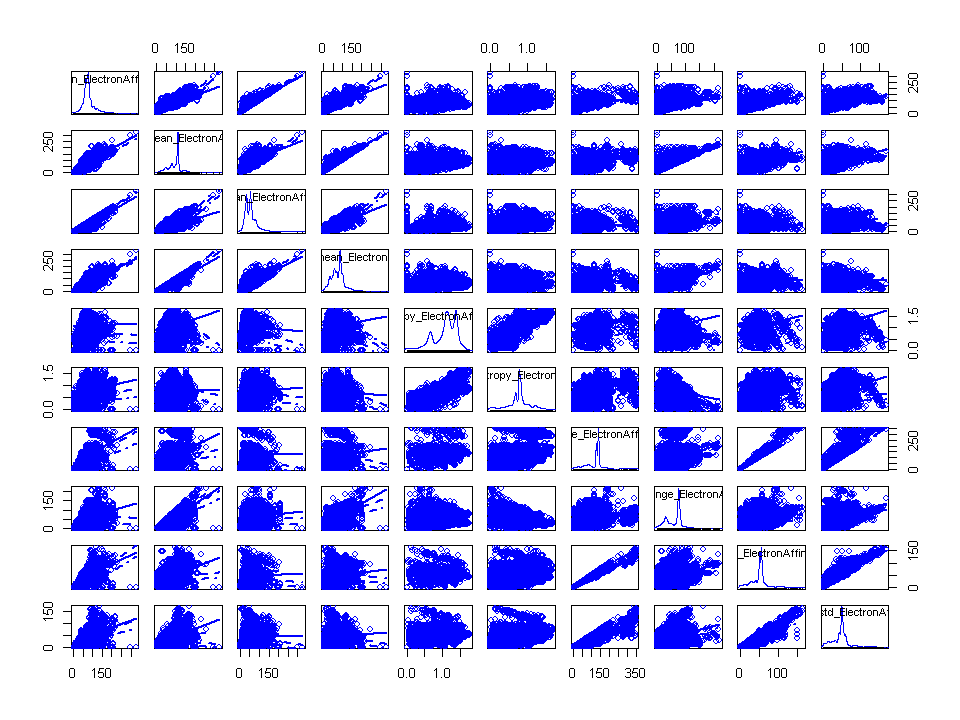

In [176]:
options(repr.plot.width = 8, repr.plot.height = 6)
scatterplotMatrix(~mean_ElectronAffinity+wtd_mean_ElectronAffinity+gmean_ElectronAffinity
                  +wtd_gmean_ElectronAffinity+entropy_ElectronAffinity+wtd_entropy_ElectronAffinity+
                  range_ElectronAffinity+wtd_range_ElectronAffinity+std_ElectronAffinity+
                  wtd_std_ElectronAffinity,data=df_super)



Notes:

mean_ElectronAffinity is highly corelated with wtd_mean_ElectronAffinity, gmean_ElectronAffinity and wtd_gmean_ElectronAffinity

wtd_mean_ElectronAffinity is highly corealted with gmean_ElectronAffinity and wtd_gmean_ElectronAffinity

gmean_ElectronAffinity and wtd_gmean_ElectronAffinity are highly corelated

range_ElectronAffinity is highly corelated with both std_ElectronAffinity and wtd_std_ElectronAffinity

std_ElectronAffinity and wtd_std_ElectronAffinity are highly corelated pairs


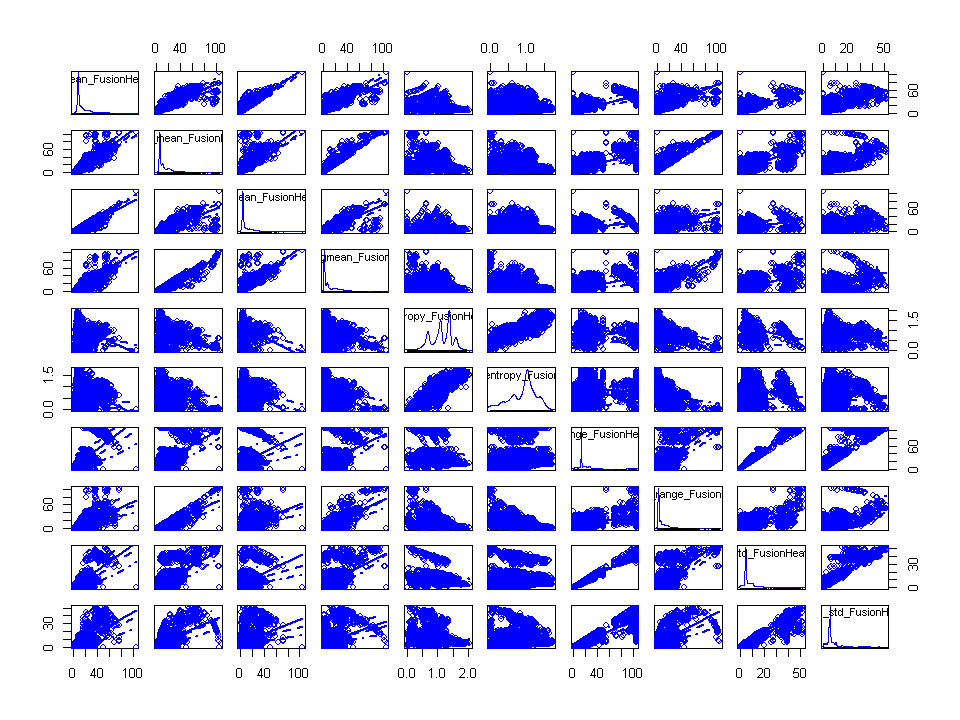

In [177]:
options(repr.plot.width = 8, repr.plot.height = 6)
scatterplotMatrix(~mean_FusionHeat+wtd_mean_FusionHeat+gmean_FusionHeat
                  +wtd_gmean_FusionHeat+entropy_FusionHeat+wtd_entropy_FusionHeat+
                  range_FusionHeat+wtd_range_FusionHeat+std_FusionHeat+
                  wtd_std_FusionHeat,data=df_super)




Notes:

mean_FusionHeat is highly corelated with gmean_FusionHeat

wtd_mean_FusionHeat is highly corealted with wtd_gmean_FusionHeat and wtd_range_FusionHeat

entropy_FusionHeat and wtd_entropy_FusionHeat are highly corelated

range_FusionHeat is highly corelated with both std_FusionHeat and wtd_std_FusionHeat

std_FusionHeat and wtd_std_FusionHeat are highly corelated pairs


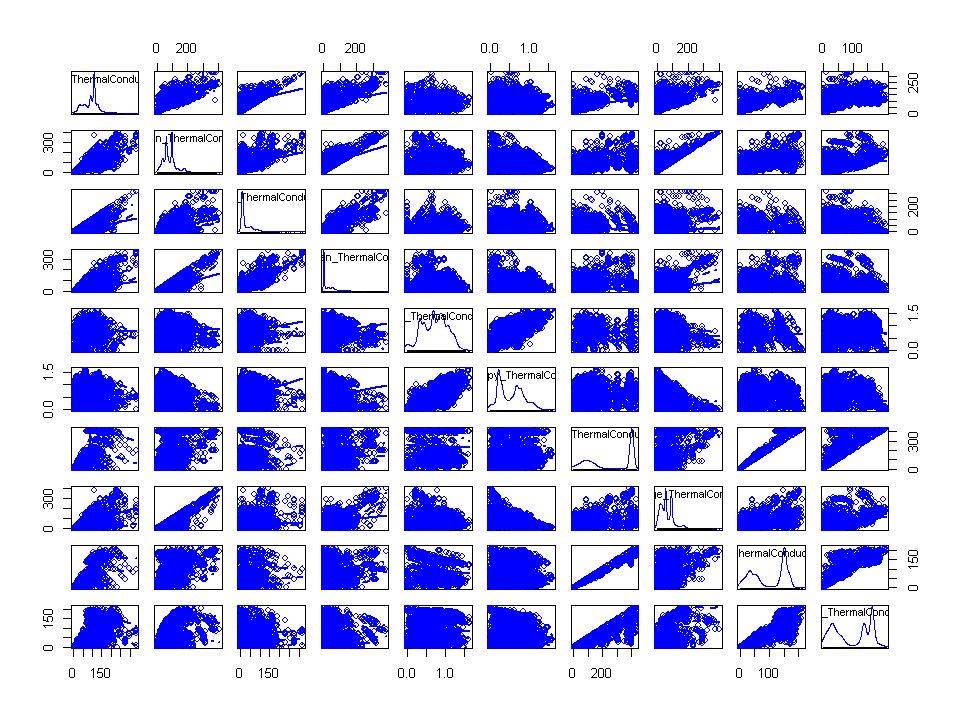

In [178]:
options(repr.plot.width = 8, repr.plot.height = 6)
scatterplotMatrix(~mean_ThermalConductivity+wtd_mean_ThermalConductivity+gmean_ThermalConductivity
                  +wtd_gmean_ThermalConductivity+entropy_ThermalConductivity+wtd_entropy_ThermalConductivity+
                  range_ThermalConductivity+wtd_range_ThermalConductivity+std_ThermalConductivity+
                  wtd_std_ThermalConductivity,data=df_super)



Notes:

mean_ThermalConductivity is highly corelated with gmean_ThermalConductivity

wtd_mean_ThermalConductivity is highly corealted with wtd_gmean_ThermalConductivity

range_ThermalConductivity is highly corelated with both std_ThermalConductivity and wtd_std_ThermalConductivity

std_ThermalConductivity and wtd_std_ThermalConductivity are highly corelated pairs



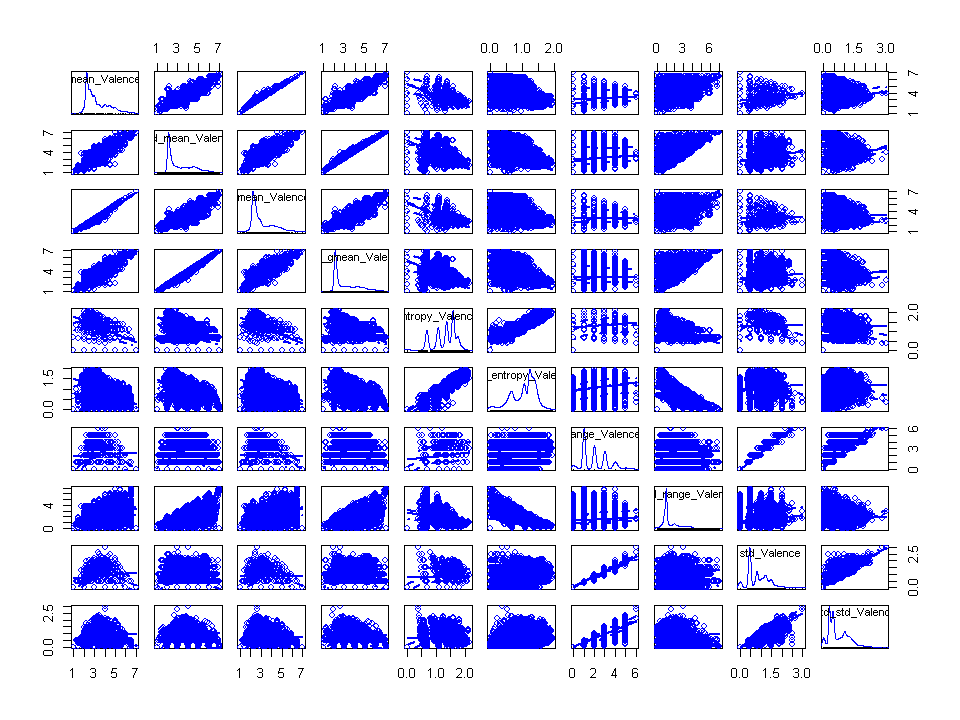

In [179]:
options(repr.plot.width = 8, repr.plot.height = 6)
scatterplotMatrix(~mean_Valence+wtd_mean_Valence+gmean_Valence
                  +wtd_gmean_Valence+entropy_Valence+wtd_entropy_Valence+
                  range_Valence+wtd_range_Valence+std_Valence+
                  wtd_std_Valence,data=df_super)


Notes:

mean_Valence is highly corelated with gmean_Valence

wtd_mean_Valence is highly corealted with wtd_gmean_Valence

entropy_Valence and wtd_entropy_Valence are highly corelated

range_Valence is highly corelated with both std_Valence


In general it can be concluded that almost for all of the 8 properties, namely Atomic Mass, First Ionization Energy, Atomic Radius, Density, Electron Afinity, Fusion Heat, Thermal Conductivity, Valence the 

1. *Mean and Geometric mean variations are highly corelated*
2. *Weighted mean and Weighted geometric mean are highly corelated*
3. *Range, Standard deviation, and Weighted standard deviation are highly corelated*

Standard deviation, and Weighted standard are different for Valence
Entropy, Weighted entropy are highly corelated for Fusion Heat


<a id='DE4'></a>
### 2.4 View the variable distributions using boxplots and histograms

Examining the boxplot for all variable to understand the variations across different variations for the same metric

#### Atomic Mass

Boxplot for Atomic Mass


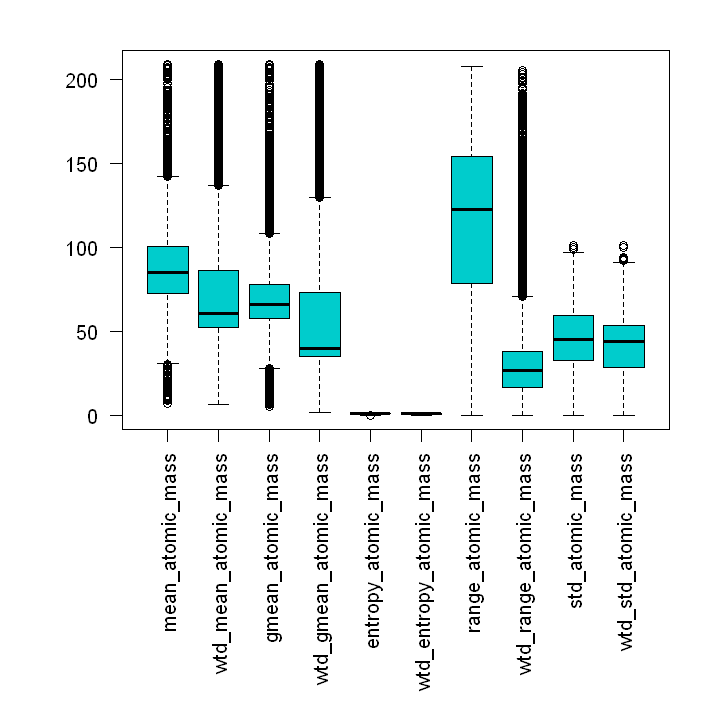

In [165]:
par(mar=c(12,5,2,2)+.1)
options(repr.plot.width = 6, repr.plot.height = 6)
cat("Boxplot for Atomic Mass\n")
boxplot(df_super[,2:11],las=2, cex.axis = 1, col="#00CCCC") 


Notes:

mean_atomic_mass and gmean_atomic_mass have similar spread

wtd_mean_atomic_massand wtd_gmean_atomic_mass have similar spread 

entropy_atomic_mass and wtd_entropy_atomic_mass have a very small scale comapred to other variations for Atomic Mass

wtd_range_atomic_mass seems to have a different spread compared to other variables, might be useful in linear modelling



#### First Ionization Energy

Boxplot for First Ionization Energy


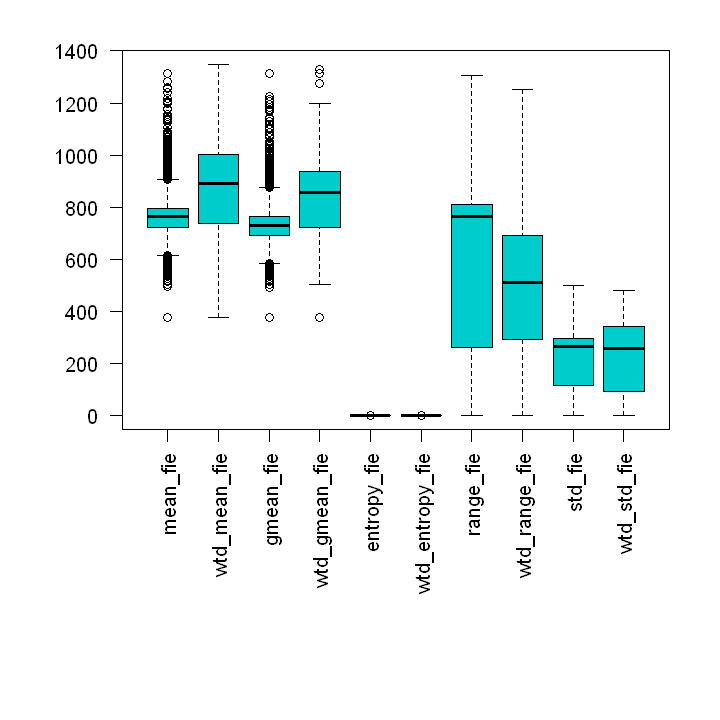

In [166]:
par(mar=c(12,5,2,2)+.1)
cat("Boxplot for First Ionization Energy\n")
options(repr.plot.width = 6, repr.plot.height = 6)
boxplot(df_super[,12:21],las=2, cex.axis = 1, col="#00CCCC")

Notes:

mean_fie and gmean_fie have similar spread

wtd_mean_fie and wtd_gmean_fie have similar spread 

entropy_fie and wtd_entropy_fie have a very small scale comapred to other variations for First Ionization energy

range_fie and std_fie have similar spread

wtd_range_fie seems to have a different spread compared to other variables, might be useful in linear modelling


#### Atomic Radius

Boxplot for Atomic Radius


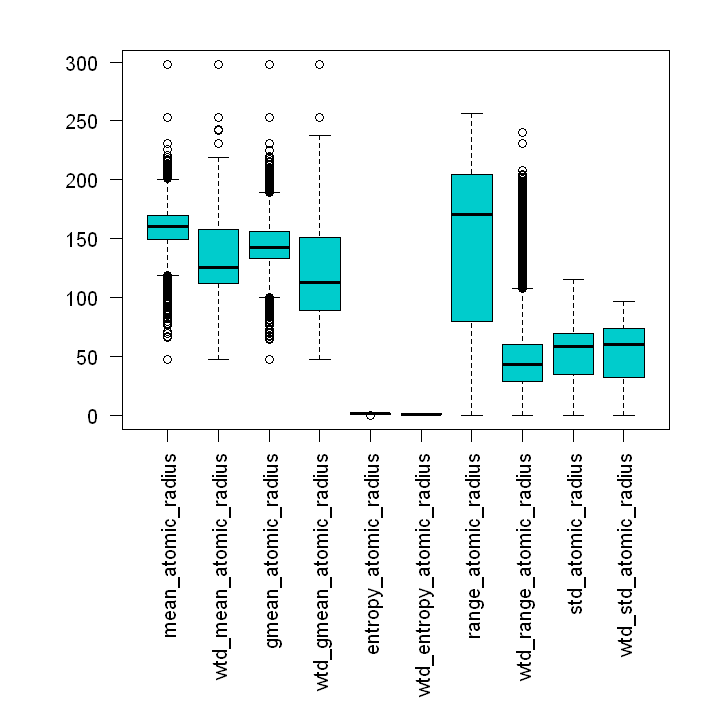

In [167]:
par(mar=c(12,5,2,2)+.1)
options(repr.plot.width = 6, repr.plot.height = 6)
cat("Boxplot for Atomic Radius\n")
boxplot(df_super[,22:31],las=2, cex.axis = 1, col="#00CCCC")


Notes:

mean_atomic_radius and gmean_atomic_radius have similar spread

wtd_mean_atomic_radius and wtd_gmean_atomic_radius have similar spread 

entropy_atomic_radius and wtd_entropy_atomic_radius have a very small scale comapred to other variations for Atomic Radius

range_atomic_radius, std_atomic_radius and wtd_std_atomic_radius have similar spread

wtd_range_atomic_radius seems to have a different spread compared to other variables, might be useful in linear modelling


#### Density

Boxplot for Density


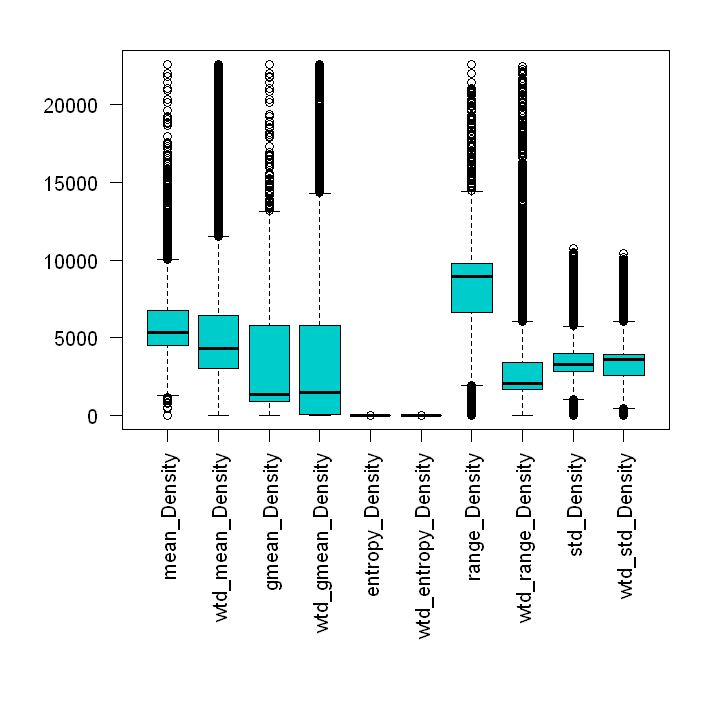

In [168]:
par(mar=c(12,5,2,2)+.1)
options(repr.plot.width = 6, repr.plot.height = 6)
cat("Boxplot for Density\n")
boxplot(df_super[,32:41],las=2, cex.axis = 1, col="#00CCCC")


Notes:

Density in general seems to have lot of outliers

entropy_density and wtd_entropy_density have a very small scale comapred to other variations for Density

range_density, and wtd_std_density have similar spread

wtd_range_density and std_density seems to have a different spread compared to other variables, might be useful in linear modelling


#### Electron Affinity

Boxplot for Electron Affinity


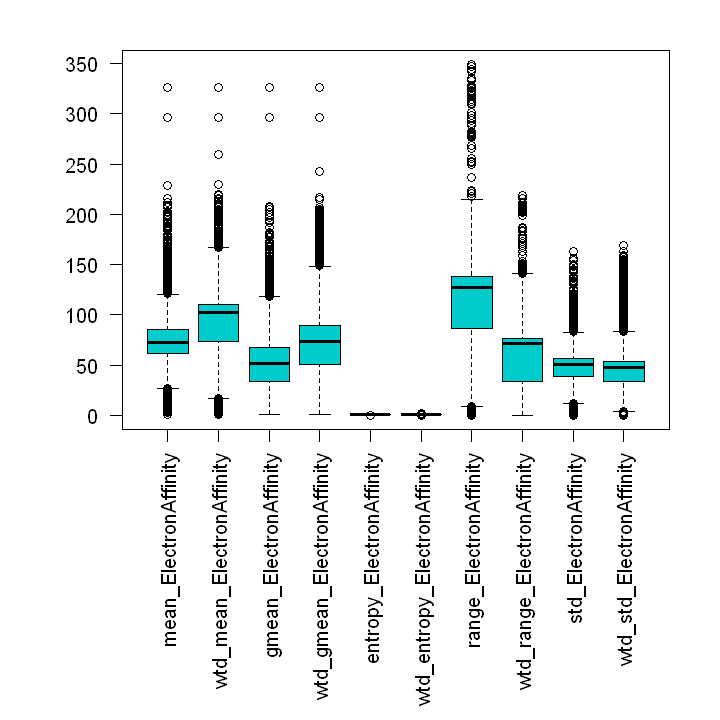

In [169]:
par(mar=c(12,5,2,2)+.1)
options(repr.plot.width = 6, repr.plot.height = 6)
cat("Boxplot for Electron Affinity\n")
boxplot(df_super[,42:51],las=2, cex.axis = 1, col="#00CCCC")


Notes:

mean_ElectronAffinity(has more outliers) and gmean_ElectronAffinity  have similar spread

wtd_mean_ElectronAffinity(has more outliers) and wtd_gmean_ElectronAffinity have similar spread 

entropy_ElectronAffinity and wtd_ElectronAffinity radius have a very small scale comapred to other variations for Electron Affinity

range_ElectronAffinity, std_ElectronAffinity and wtd_std_ElectronAffinity have similar spread though on different scale

wtd_range_ElectronAffinitys seems to have a different spread compared to other variables, might be useful in linear modelling


#### Fusion Heat

Boxplot for Fusion Heat


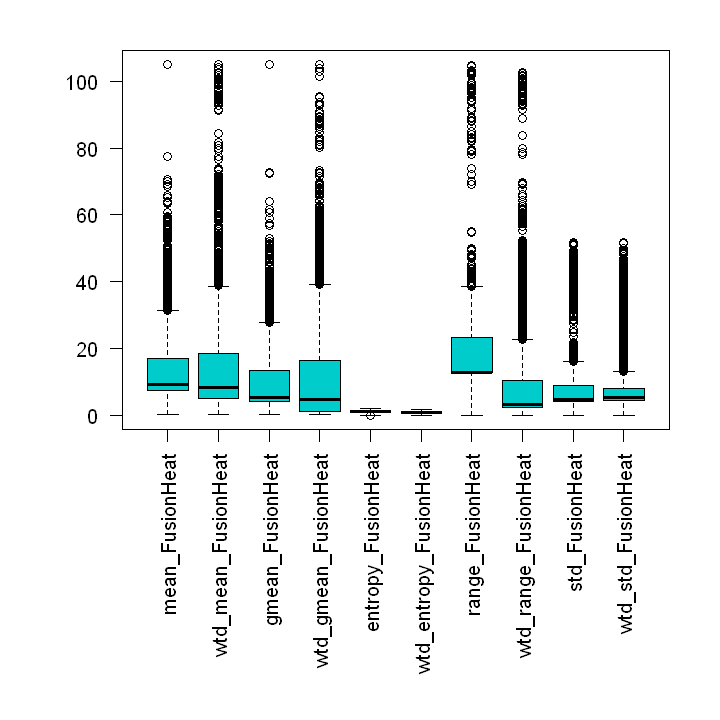

In [170]:
par(mar=c(12,5,2,2)+.1)
options(repr.plot.width = 6, repr.plot.height = 6)
cat("Boxplot for Fusion Heat\n")
boxplot(df_super[,52:61],las=2, cex.axis = 1, col="#00CCCC")


Notes:

mean_FusionHeat and gmean_FusionHeat have similar spread

wtd_mean_FusionHeat and wtd_gmean_FusionHeat have similar spread 

entropy_FusionHeat and wtd_FusionHeat radius have a very small scale comapred to other variations for Fusion Heat

range_FusionHeat, and std_FusionHeat have similar spread though on different scale


#### Thermal Conductivity

In [ ]:
par(mar=c(12,5,2,2)+.1)
options(repr.plot.width = 6, repr.plot.height = 6)
cat("Boxplot for Thermal Conductivity\n")
boxplot(df_super[,62:71],las=2, cex.axis = 1, col="#00CCCC")


Notes:

mean_ThermalConductivity and gmean_ThermalConductivity are differnt here (interestingly)

wtd_mean_ThermalConductivity and wtd_gmean_ThermalConductivity also are different

entropy_ThermalConductivity and wtd_entropy_ThemalConductivity have a very small scale comapred to other variables

**In general Thermal Conductivity variations all seem to be different compared to other variables**


#### Valence

Boxplot for Valence


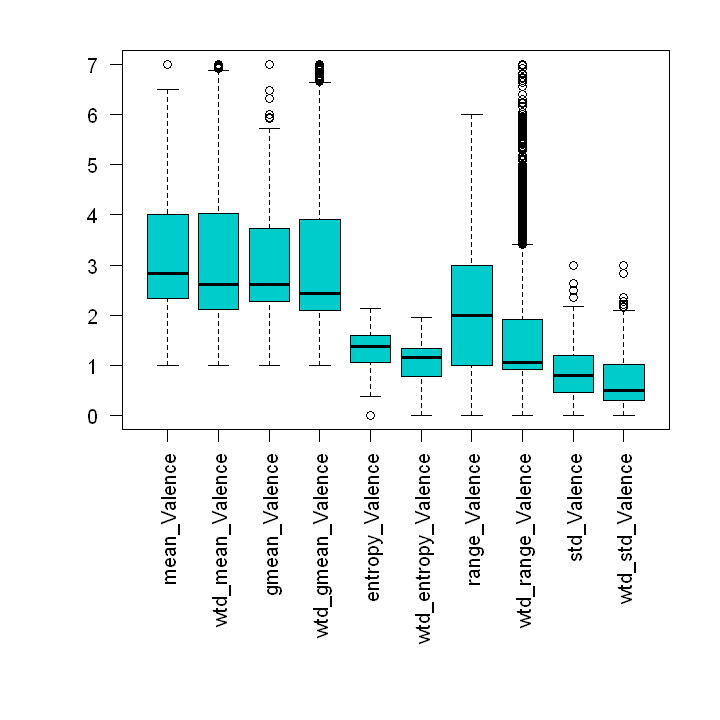

In [173]:
par(mar=c(12,5,2,2)+.1)
options(repr.plot.width = 6, repr.plot.height = 6)
cat("Boxplot for Valence\n")
boxplot(df_super[,72:81],las=2, cex.axis = 1, col="#00CCCC")

Notes:

mean_Valence and gmean_Valence have similar spread

wtd_mean_Valence and wtd_gmean_Valence have similar spread 

entropy_Valence and wtd_entropy_Valence have a larger scale comapred to other 7 attributes 

range_Valence, and std_Valence have similar spread though on different scale

wtd_range_Valence seems to have a different spread compared to other variables, might be useful in linear modelling

Based on the findings from above, we can comapare the highly correlated variable amongst the 8 attributes to see if we can find some pattern

**Comparing the means and geometric means of all the 8 attributes**

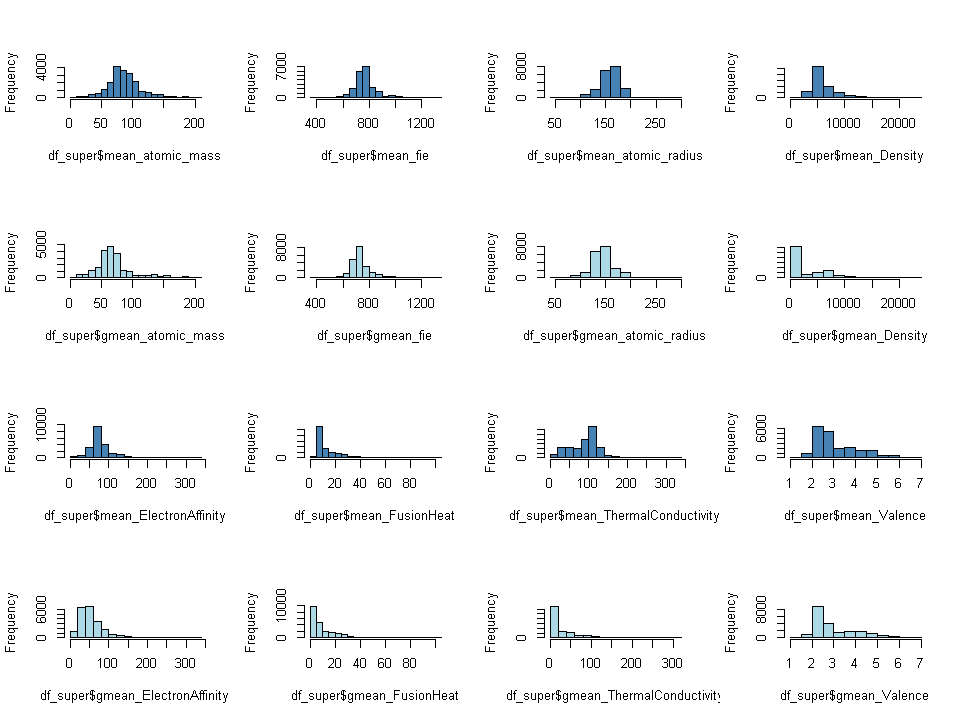

In [15]:
# Plot a histogram or bar chart of each variable
par(mfrow = c(4,4))
hist(df_super$mean_atomic_mass, col='steelblue', main =NULL)
hist(df_super$mean_fie,col='steelblue', main =NULL)
hist(df_super$mean_atomic_radius,col='steelblue', main =NULL)
hist(df_super$mean_Density,col='steelblue', main =NULL)

hist(df_super$gmean_atomic_mass,col='lightblue', main =NULL)
hist(df_super$gmean_fie,col='lightblue', main =NULL)
hist(df_super$gmean_atomic_radius,col='lightblue', main =NULL)
hist(df_super$gmean_Density,col='lightblue', main =NULL)

hist(df_super$mean_ElectronAffinity,col='steelblue',main =NULL)
hist(df_super$mean_FusionHeat,col='steelblue',main =NULL)
hist(df_super$mean_ThermalConductivity,col='steelblue',main =NULL)
hist(df_super$mean_Valence,col='steelblue',main =NULL)

hist(df_super$gmean_ElectronAffinity,col='lightblue',main =NULL)
hist(df_super$gmean_FusionHeat,col='lightblue',main =NULL)
hist(df_super$gmean_ThermalConductivity,col='lightblue',main =NULL)
hist(df_super$gmean_Valence,col='lightblue',main =NULL)

Notes:

Row 1 and Row 2 which are mean and geomteric mean of atmonic mass, FIE, atomic radus, and mean density respectively have almost similar distribution

Row 3 and Row 4 which are mean and geomteric mean of electron affinity, fusion heat, thermal conductivity, and valence have same distribution for Valence and somewhat similar Fusion heat

Thermal conductivity is quite different based on mean and geometric mean  

Fusion Heat, Density, and Valence have skewed distribuion

**Comparing the weighted means and weighted geometric means of all the 8 attributes**

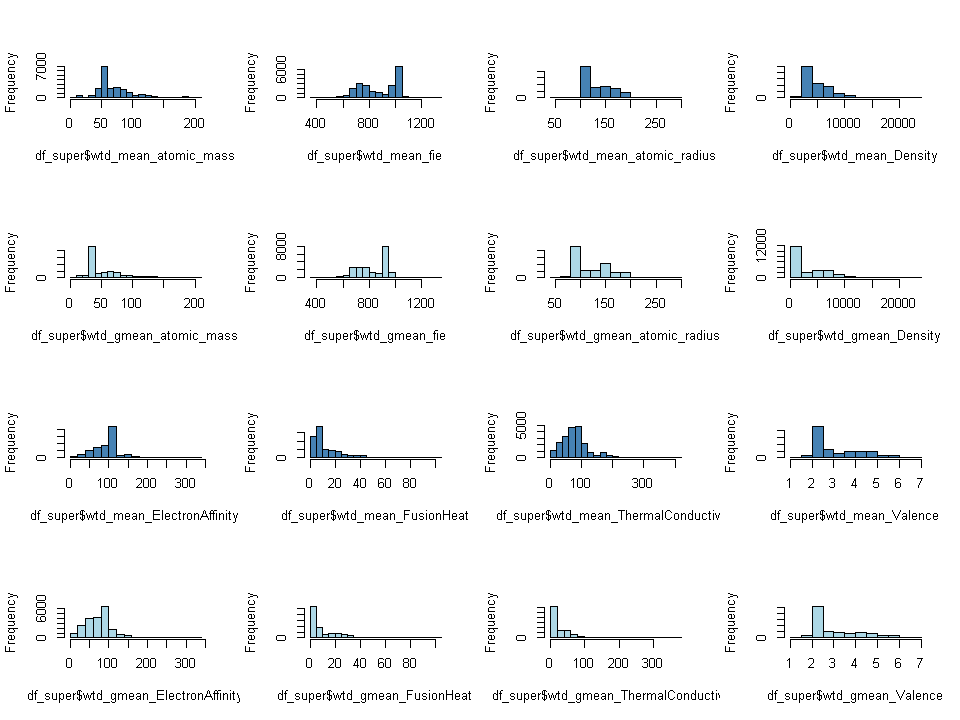

In [16]:
# Plot a histogram or bar chart of each variable
par(mfrow = c(4,4))
hist(df_super$wtd_mean_atomic_mass, col='steelblue', main =NULL)
hist(df_super$wtd_mean_fie,col='steelblue', main =NULL)
hist(df_super$wtd_mean_atomic_radius,col='steelblue', main =NULL)
hist(df_super$wtd_mean_Density,col='steelblue', main =NULL)

hist(df_super$wtd_gmean_atomic_mass,col='lightblue', main =NULL)
hist(df_super$wtd_gmean_fie,col='lightblue', main =NULL)
hist(df_super$wtd_gmean_atomic_radius,col='lightblue', main =NULL)
hist(df_super$wtd_gmean_Density,col='lightblue', main =NULL)

hist(df_super$wtd_mean_ElectronAffinity,col='steelblue',main =NULL)
hist(df_super$wtd_mean_FusionHeat,col='steelblue',main =NULL)
hist(df_super$wtd_mean_ThermalConductivity,col='steelblue',main =NULL)
hist(df_super$wtd_mean_Valence,col='steelblue',main =NULL)

hist(df_super$wtd_gmean_ElectronAffinity,col='lightblue',main =NULL)
hist(df_super$wtd_gmean_FusionHeat,col='lightblue',main =NULL)
hist(df_super$wtd_gmean_ThermalConductivity,col='lightblue',main =NULL)
hist(df_super$wtd_gmean_Valence,col='lightblue',main =NULL)

Notes:

Row 1 and Row 2 which are weighted mean and weighted geomteric mean of atmonic mass, FIE, atomic radus, and mean density respectively have almost similar distribution

Row 3 and Row 4 which are weighted mean and weighted geomteric mean of electron affinity, fusion heat, thermal conductivity, and valence have same distribution for electron affinity, fusion heat, and valence 

Thermal conductivity is quite different based on weighted mean and weighted geometric mean  

Fusion Heat, Density, and Valence have skewed distribuion

**Comparing the entropy and weighted entropy means of all the 8 attributes**

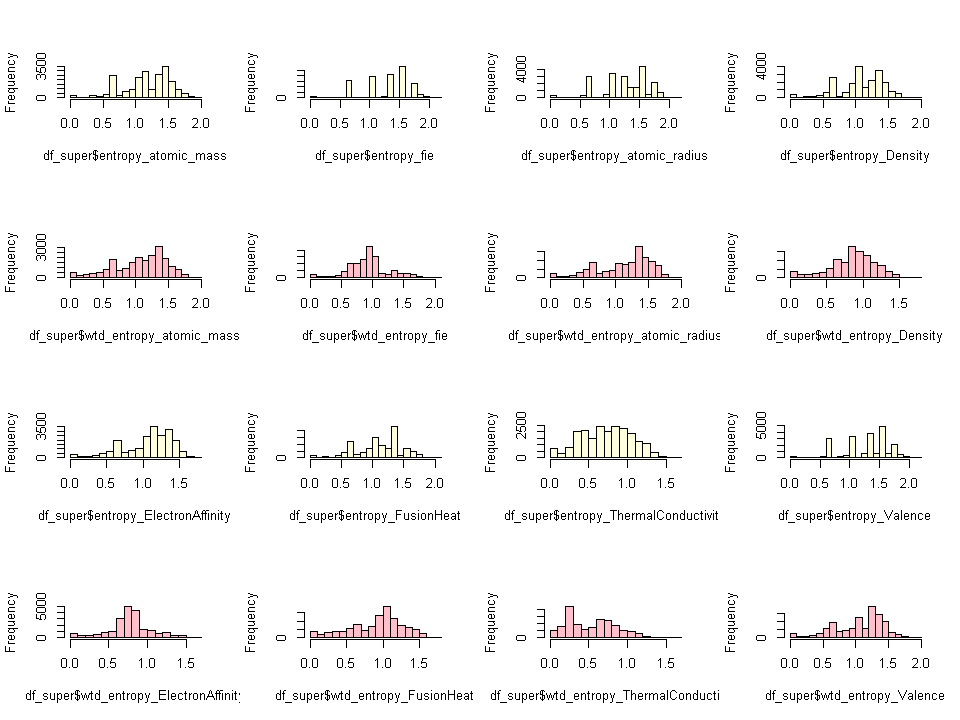

In [17]:
# Plot a histogram or bar chart of each variable
par(mfrow = c(4,4))
hist(df_super$entropy_atomic_mass, main =NULL,col='lightyellow')
hist(df_super$entropy_fie,main =NULL, col='lightyellow')
hist(df_super$entropy_atomic_radius, main =NULL,col='lightyellow')
hist(df_super$entropy_Density, main =NULL,col='lightyellow')

hist(df_super$wtd_entropy_atomic_mass, main =NULL,col='pink')
hist(df_super$wtd_entropy_fie,  main =NULL,col='pink')
hist(df_super$wtd_entropy_atomic_radius, main =NULL,col='pink')
hist(df_super$wtd_entropy_Density, main =NULL,col='pink')


hist(df_super$entropy_ElectronAffinity, main =NULL,col='lightyellow')
hist(df_super$entropy_FusionHeat, main =NULL,col='lightyellow')
hist(df_super$entropy_ThermalConductivity, main =NULL,col='lightyellow')
hist(df_super$entropy_Valence,main =NULL,col='lightyellow')

hist(df_super$wtd_entropy_ElectronAffinity, main =NULL,col='pink')
hist(df_super$wtd_entropy_FusionHeat, main =NULL,col='pink')
hist(df_super$wtd_entropy_ThermalConductivity, main =NULL,col='pink')
hist(df_super$wtd_entropy_Valence, main =NULL,col='pink')

Notes:

Row 1 and Row 2 which are entropy and weighted entropy of atmonic mass, FIE, atomic radus, and mean density respectively. Though overall the distribution for respective variables look similar, entropy has more zeros.

Row 3 and Row 4 which are entropy and weighted entropy of electron affinity, fusion heat, thermal conductivity, and valence have similar distribution for fusion heat, and valence 

Thermal conductivity is quite different based on entropy and weighted entropy


**Comparing the weighted range and standard deviation of all the 8 attributes**

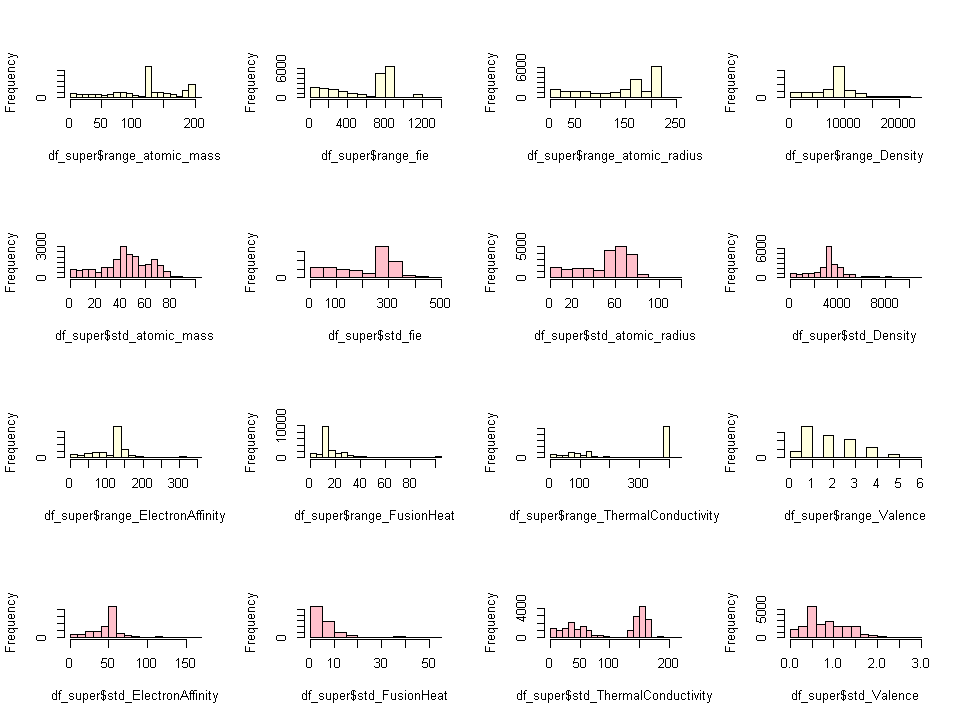

In [18]:
# Plot a histogram or bar chart of each variable
par(mfrow = c(4,4))
hist(df_super$range_atomic_mass, main =NULL,col='lightyellow')
hist(df_super$range_fie,main =NULL, col='lightyellow')
hist(df_super$range_atomic_radius, main =NULL,col='lightyellow')
hist(df_super$range_Density, main =NULL,col='lightyellow')

hist(df_super$std_atomic_mass, main =NULL,col='pink')
hist(df_super$std_fie,  main =NULL,col='pink')
hist(df_super$std_atomic_radius, main =NULL,col='pink')
hist(df_super$std_Density, main =NULL,col='pink')

hist(df_super$range_ElectronAffinity, main =NULL,col='lightyellow')
hist(df_super$range_FusionHeat, main =NULL,col='lightyellow')
hist(df_super$range_ThermalConductivity, main =NULL,col='lightyellow')
hist(df_super$range_Valence,main =NULL,col='lightyellow')

hist(df_super$std_ElectronAffinity, main =NULL,col='pink')
hist(df_super$std_FusionHeat, main =NULL,col='pink')
hist(df_super$std_ThermalConductivity, main =NULL,col='pink')
hist(df_super$std_Valence, main =NULL,col='pink')

Notes:

Row 1 and Row 2 are range and standard deviation of atmonic mass, FIE, atomic radus, and mean density respectively.
The FIE, and density have very similar spread. 

Row 3 and Row 4 are range and standard deviation of electron affinity, fusion heat, thermal conductivity, and valence. Distribution for electron affinity, fusion heat and valence are quite similar.

Thermal conductivity is quite different based on range and standard deviation  


**Comparing the standard deviation and weighted standard deviation of all the 8 attributes**

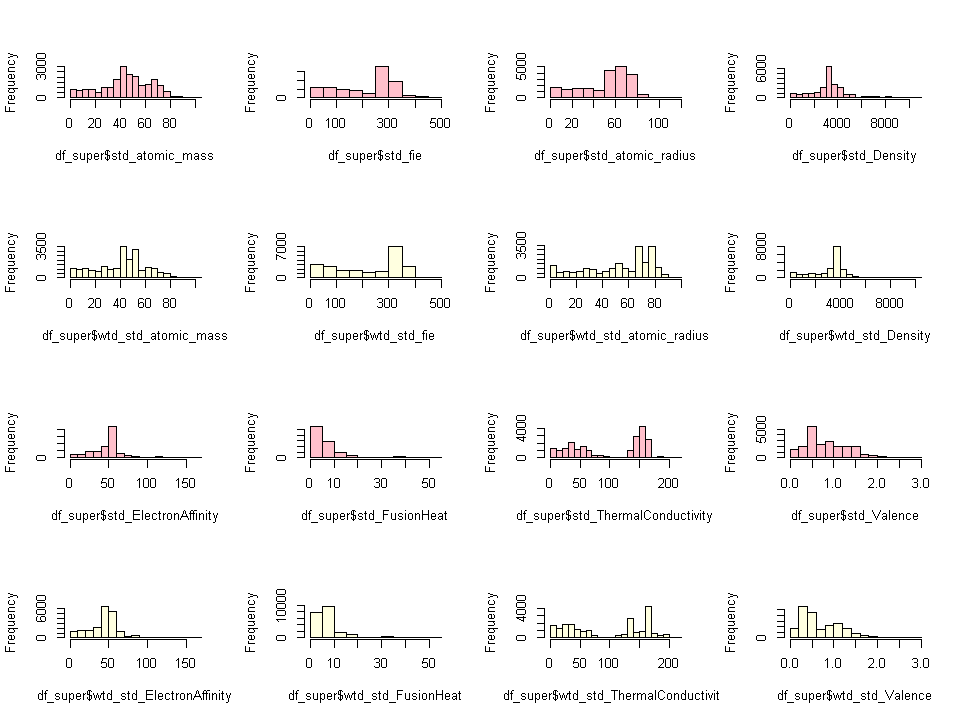

In [19]:
# Plot a histogram or bar chart of each variable
par(mfrow = c(4,4))

hist(df_super$std_atomic_mass, main =NULL,col='pink')
hist(df_super$std_fie,  main =NULL,col='pink')
hist(df_super$std_atomic_radius, main =NULL,col='pink')
hist(df_super$std_Density, main =NULL,col='pink')

hist(df_super$wtd_std_atomic_mass, main =NULL,col='lightyellow')
hist(df_super$wtd_std_fie,main =NULL, col='lightyellow')
hist(df_super$wtd_std_atomic_radius, main =NULL,col='lightyellow')
hist(df_super$wtd_std_Density, main =NULL,col='lightyellow')


hist(df_super$std_ElectronAffinity, main =NULL,col='pink')
hist(df_super$std_FusionHeat, main =NULL,col='pink')
hist(df_super$std_ThermalConductivity, main =NULL,col='pink')
hist(df_super$std_Valence, main =NULL,col='pink')

hist(df_super$wtd_std_ElectronAffinity, main =NULL,col='lightyellow')
hist(df_super$wtd_std_FusionHeat, main =NULL,col='lightyellow')
hist(df_super$wtd_std_ThermalConductivity, main =NULL,col='lightyellow')
hist(df_super$wtd_std_Valence,main =NULL,col='lightyellow')


Notes:

Row 1 and Row 2 are standard deviation and weighted standard deviation of atmonic mass, FIE, atomic radus, and mean density respectively, and all variable have very similar spread except atomic radius.

Row 3 and Row 4 are range and standard deviation of electron affinity, fusion heat, thermal conductivity, and valence respectively, and all variable have very similar spread.

Even for Thermal conductivity standard deviation and weighted standard deviation are the same.


**Comparing the weighted Range of all the 8 attributes**

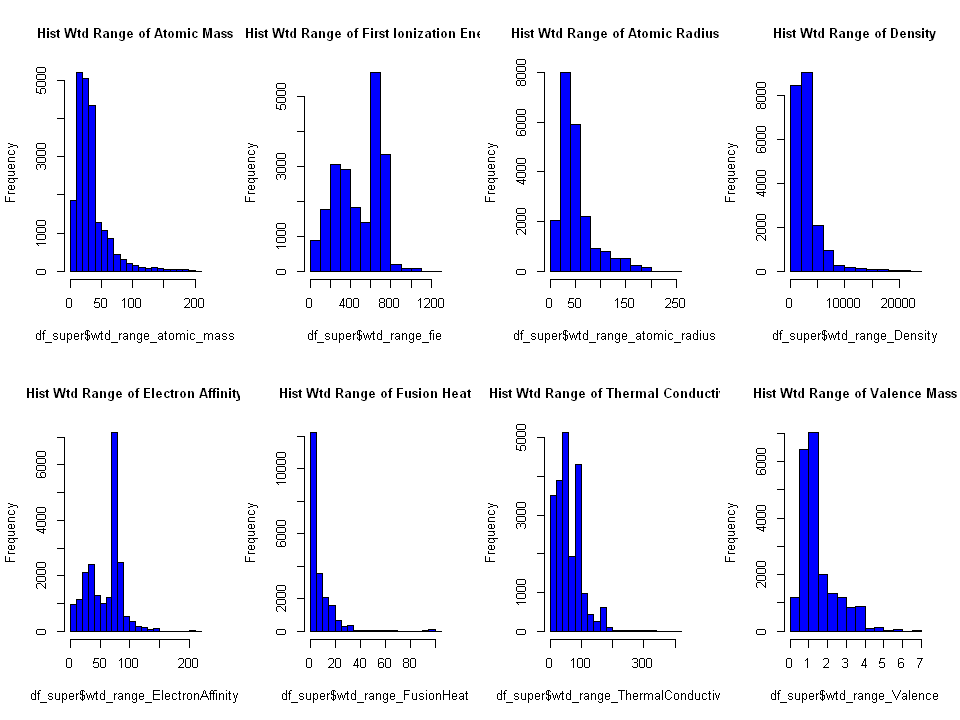

In [20]:
# Plot a histogram or bar chart of each variable
par(mfrow = c(2,4))
hist(df_super$wtd_range_atomic_mass, main='Hist Wtd Range of Atomic Mass',cex.main=1,col='blue')
hist(df_super$wtd_range_fie,  main='Hist Wtd Range of First Ionization Energy',cex.main=1,col='blue')
hist(df_super$wtd_range_atomic_radius, main='Hist Wtd Range of Atomic Radius',cex.main=1,col='blue')
hist(df_super$wtd_range_Density, main='Hist Wtd Range of Density',cex.main=1,col='blue')
hist(df_super$wtd_range_ElectronAffinity, main='Hist Wtd Range of Electron Affinity',cex.main=1,col='blue')
hist(df_super$wtd_range_FusionHeat, main='Hist Wtd Range of Fusion Heat',cex.main=1,col='blue')
hist(df_super$wtd_range_ThermalConductivity, main='Hist Wtd Range of Thermal Conductivity',cex.main=1,col='blue')
hist(df_super$wtd_range_Valence, main='Hist Wtd Range of Valence Mass',cex.main=1,col='blue')

This is the plot weighted range for all 8 attributes. Atomic radius and Valence seem to be quite similar.


<a id='DE5'></a>
### 2.5 Relationship between predictors and critical temperature

Checking the impact of number of elements on the critical temperature

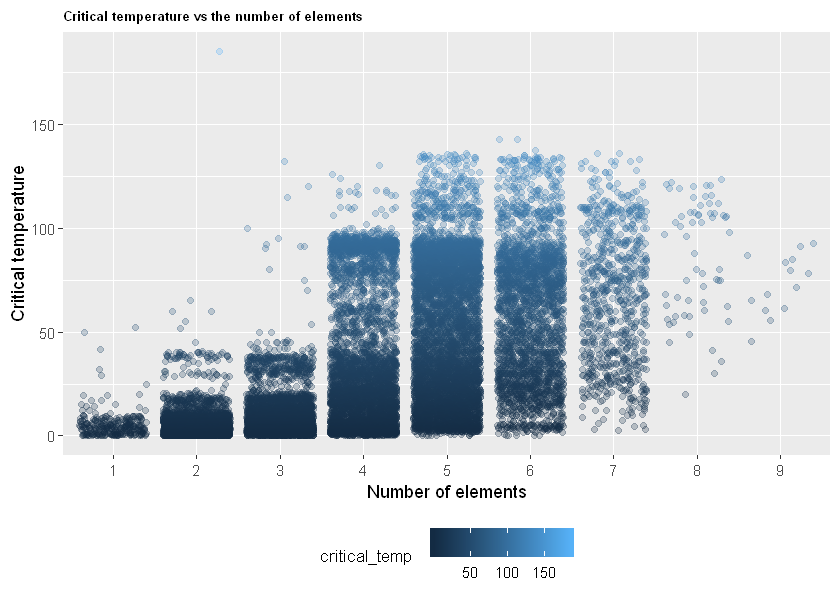

In [21]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(data=df_super,aes(x=factor(df_super$number_of_elements), y = critical_temp)) +
geom_point(aes(color=critical_temp),alpha=1/4, position = 'jitter')+
ggtitle('Critical temperature vs the number of elements') +
scale_fill_brewer(palette="Set2") +
xlab("Number of elements") + ylab("Critical temperature")+
theme(plot.title = element_text(size=8,face='bold'),legend.position='bottom',legend.title=element_text(size=10))

As we can see from the above graph, most datapoints are to for number of elements ranging from 2 to 6. Clearly there is a linear trend as well

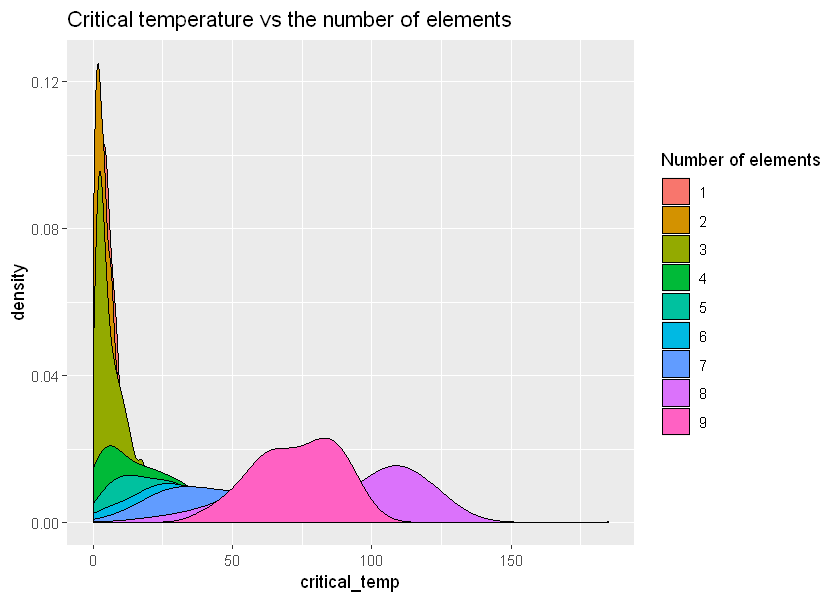

In [22]:
ggplot(aes(x=critical_temp),data = df_super) + 
geom_density(aes(fill = as.factor(number_of_elements))) +
ggtitle('Critical temperature vs the number of elements') +
scale_x_continuous(labels=comma) +
scale_fill_discrete(name="Number of elements")


For 1,2,3 the critical temperature is mostly less than 50, and it is increasing as the number of elements increase. For 9, we can see the that the critical temperature is between 50 and 100 but from the jitter plot it can be seen that there are very few datapoints for 9. 

### Checking the relationship of all predictors with critical tempertaure

In [ ]:
d=melt(df_super[,c(2:11,82)],id.vars="critical_temp")

ggplot(data=d,aes(value, critical_temp, col=variable)) +
geom_point(aes(color=variable),alpha=1/8, position = 'jitter') +
scale_fill_brewer(palette="Set2")  + facet_wrap(~variable)


Notes:

mean_atomic_mass, wtd_mean_atomic_mass, gmean_atomic_mass, and wtd_gmean_atomic_mass have similar relationship with critical temperature

entropy_atomic_mass and wtd_entropy_atomic_mass have small range so can't exactly tell from the plot, but they seem to have similar trend 

std_atomic_mass and wtd_std_atomic_mass have similar relationship with critical temperature

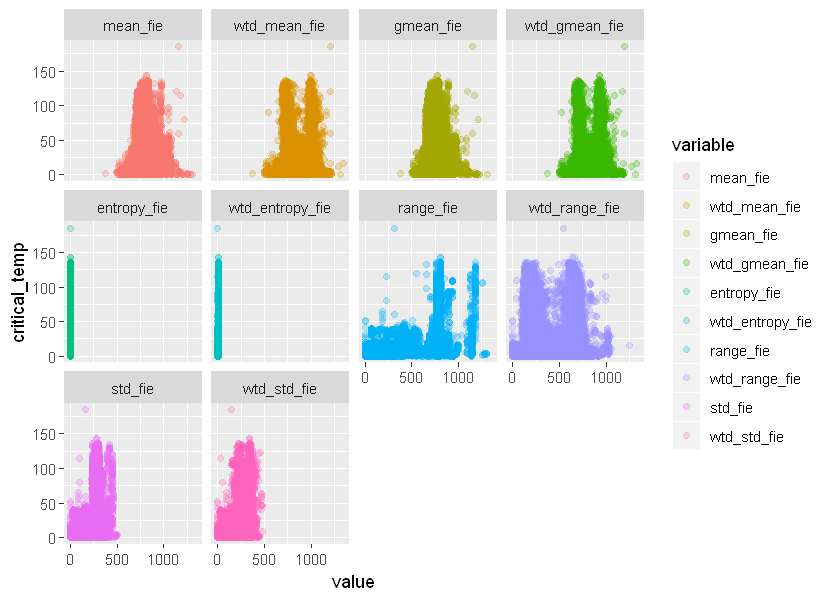

In [240]:
d=melt(df_super[,c(12:21,82)],id.vars="critical_temp")

ggplot(data=d,aes(value, critical_temp, col=variable)) +
geom_point(aes(color=variable),alpha=1/4, position = 'jitter') +
scale_fill_brewer(palette="Set2")  + facet_wrap(~variable)


Notes:

mean_fie, and gmean_fie have similar relationship with critical temperature

wtd_mean_fie, and wtd_gmean_fie have similar relationship with critical temperature

entropy_fie and wtd_entropy_fie have small range so can't exactly tell from the plot, but they seem to have similar trend 

std_fie and wtd_std_fie have similar relationship with critical temperature

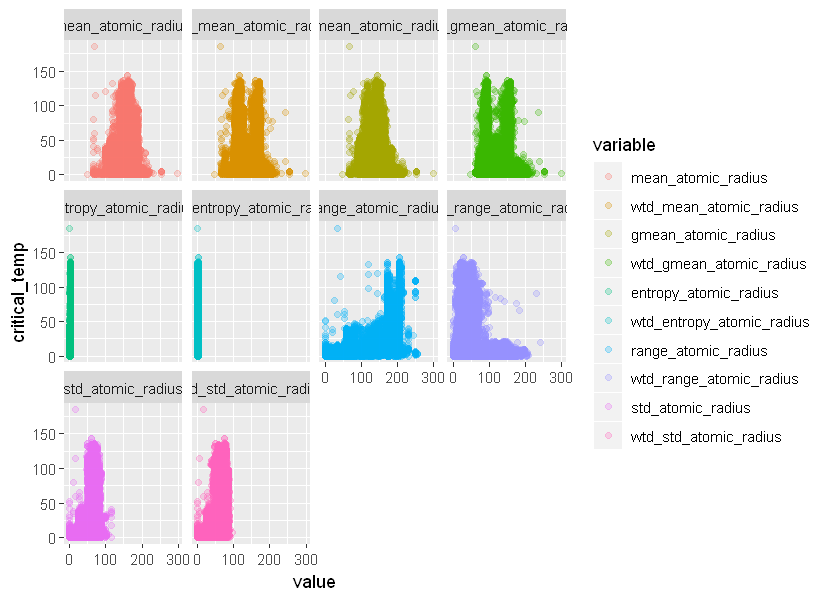

In [239]:
d=melt(df_super[,c(22:31,82)],id.vars="critical_temp")

ggplot(data=d,aes(value, critical_temp, col=variable)) +
geom_point(aes(color=variable),alpha=1/4, position = 'jitter') +
scale_fill_brewer(palette="Set2")  + facet_wrap(~variable)


Notes:

mean_atomic_radius, and gmean_atomic_radius have similar relationship with critical temperature

wtd_mean_atomic_radius, and wtd_gmean_atomic_radius have similar relationship with critical temperature

entropy_atomic_radius and wtd_entropy_atomic_radius have small range so can't exactly tell from the plot, but they seem to have similar trend 

std_atomic_radius and wtd_std_atomic_radius have similar relationship with critical temperature

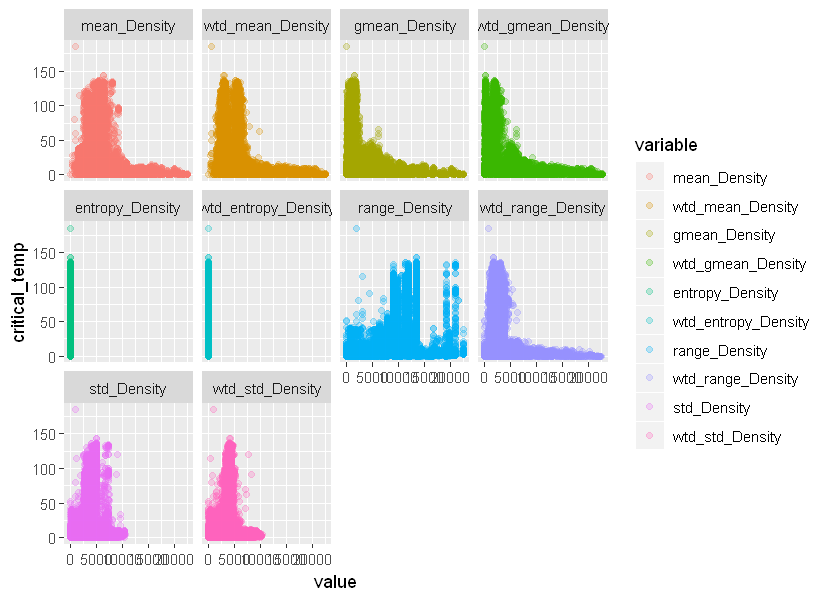

In [241]:
d=melt(df_super[,c(32:41,82)],id.vars="critical_temp")

ggplot(data=d,aes(value, critical_temp, col=variable)) +
geom_point(aes(color=variable),alpha=1/4, position = 'jitter') +
scale_fill_brewer(palette="Set2")  + facet_wrap(~variable)


Notes:

mean_Density, wtd_mean_Density, have similar trend with critical temperature

Overall mean_Density, wtd_mean_Density, gmean_Density, wtd_gmean_Density, and wtd_range_Density seem to have closely similar dependency with critical temperature

entropy_Density and wtd_entropy_Desity have small range so can't exactly tell from the plot, but they seem to have similar trend 

std_Density and wtd_std_Density have similar relationship with critical temperature

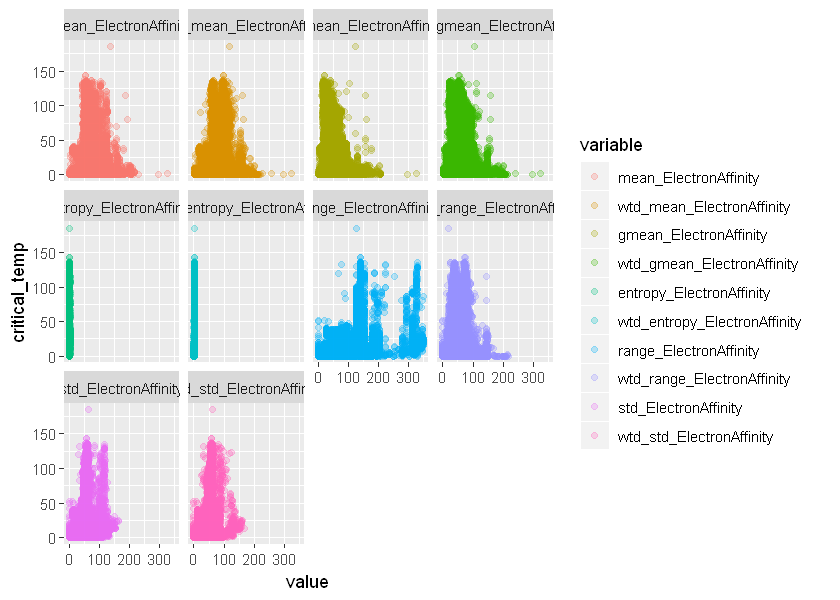

In [242]:
d=melt(df_super[,c(42:51,82)],id.vars="critical_temp")

ggplot(data=d,aes(value, critical_temp, col=variable)) +
geom_point(aes(color=variable),alpha=1/4, position = 'jitter') +
scale_fill_brewer(palette="Set2")  + facet_wrap(~variable)


Notes:

mean_ElectronAffinity, wtd_mean_ElectronAffinity, have similar trend with critical temperature

gmean_ElectronAffinity, and wtd_range_ElectronAffinity seem to have closely similar dependency with critical temperature

entropy_ElectronAffinity and wtd_entropy_ElectronAffinity have small range so can't exactly tell from the plot, but they seem to have similar trend 

std_ElectronAffinity and wtd_std_ElectronAffinity have similar relationship with critical temperature

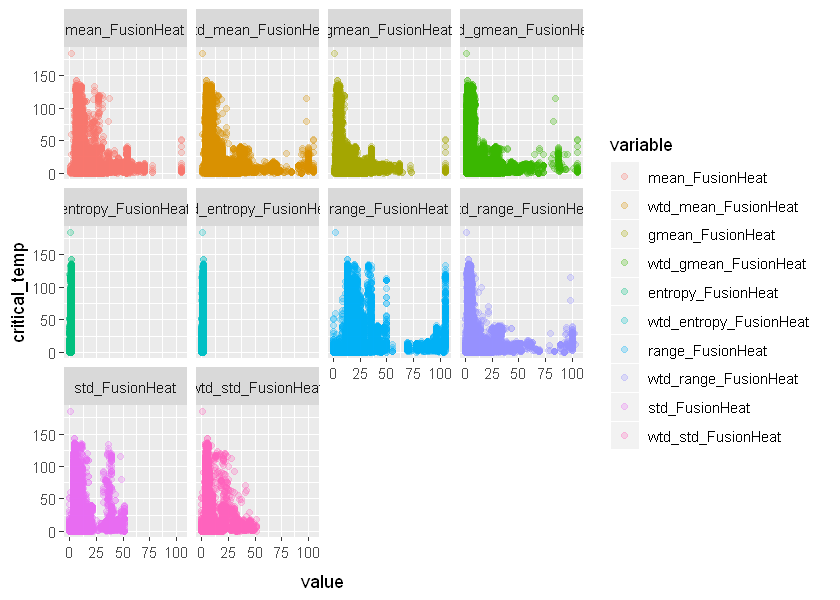

In [243]:
d=melt(df_super[,c(52:61,82)],id.vars="critical_temp")

ggplot(data=d,aes(value, critical_temp, col=variable)) +
geom_point(aes(color=variable),alpha=1/4, position = 'jitter') +
scale_fill_brewer(palette="Set2")  + facet_wrap(~variable)


Notes:

Overall mean_FusionHeat, wtd_mean_FusionHeat, gmean_FusionHeat, wtd_gmean_FusionHeat, and wtd_range_FusionHeat have similar trend with critical temperature

entropy_FusionHeat and wtd_entropy_FusionHeat have small range so can't exactly tell from the plot, but they seem to have similar trend 

std_FusionHeat and wtd_std_FusionHeat have similar relationship with critical temperature

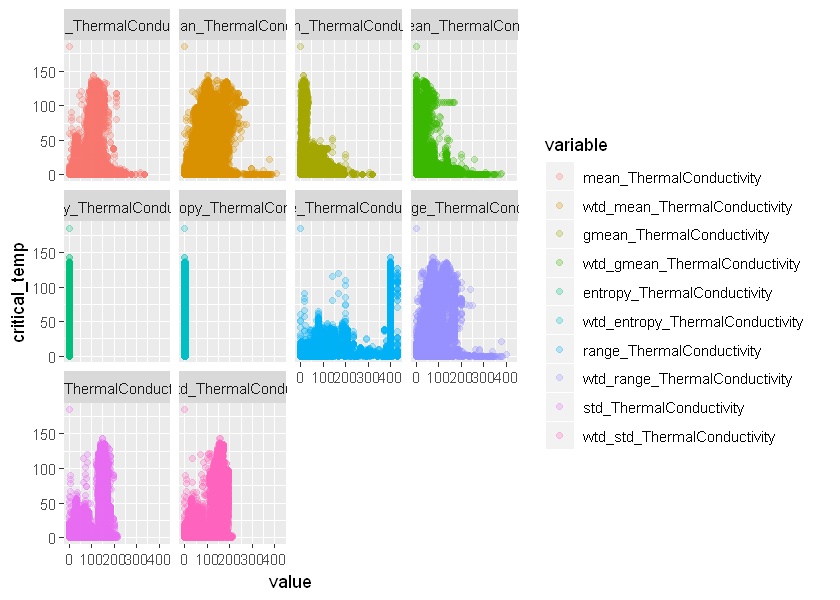

In [244]:
d=melt(df_super[,c(62:71,82)],id.vars="critical_temp")

ggplot(data=d,aes(value, critical_temp, col=variable)) +
geom_point(aes(color=variable),alpha=1/4, position = 'jitter') +
scale_fill_brewer(palette="Set2")  + facet_wrap(~variable)


Notes:

gmean_ThermalCondutivity, and wtd_range_ThermalCondutivity, have similar trend with critical temperature

entropy_ThermalCondutivity, and wtd_entropy_ThermalCondutivity, have small range so can't exactly tell from the plot, but they seem to have similar trend 

std_ThermalCondutivity, and wtd_std_ThermalCondutivity, have similar relationship with critical temperature

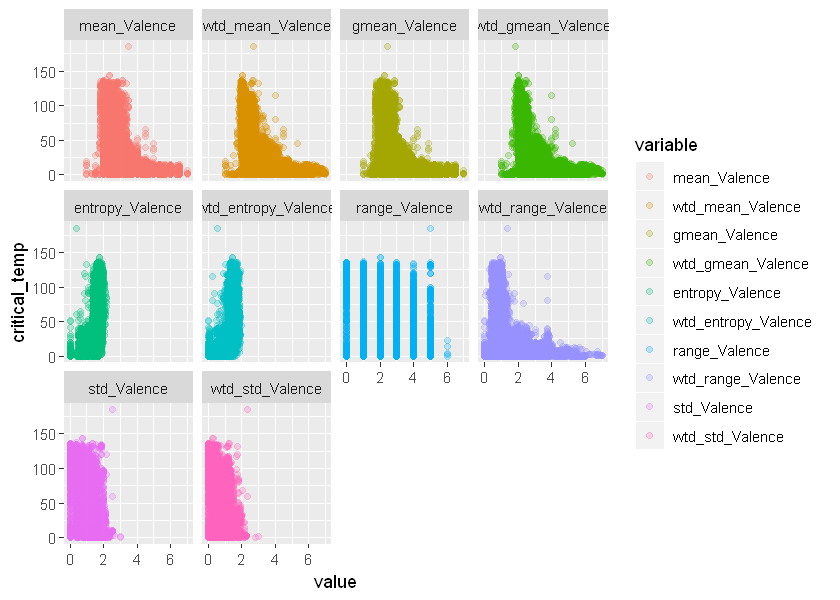

In [245]:
d=melt(df_super[,c(72:81,82)],id.vars="critical_temp")

ggplot(data=d,aes(value, critical_temp, col=variable)) +
geom_point(aes(color=variable),alpha=1/4, position = 'jitter') +
scale_fill_brewer(palette="Set2")  + facet_wrap(~variable)


Notes:

mean_Valence, and gmean_Valence have similar relationship with critical temperature

wtd_mean_Valence, and wtd_gmean_Valence have similar relationship with critical temperature

entropy_Valence and wtd_entropy_Valence range have similar relationship with critical temperature

std_Valence and wtd_std_Valence have similar relationship with critical temperature

<a id='DE6'></a>
### 2.6 Identification of near zero variance predictors

Now, let's check the near zero variance predictors, which have the following two characteristics
    1. They have very few unique values relative to the number of samples
    2. the ratio of the frequency of the most common value to the frequency of the second most common value is large
    
This kind of predictor is non-informative, it can break some models you may want to fit to your data. For example, we usually break a categorical variable with many categories into several dummy variables. Hence, when one of the categories have zero observations, it becomes a dummy variable full of zeros.    

the function <a href="https://www.rdocumentation.org/packages/caret/versions/6.0-81/topics/nearZeroVar">nearZeroVar</a> from the caret can help us idenfity those near zero variance predictors.

In [159]:
nzv <- nearZeroVar(df_super, saveMetrics = TRUE)
nzv

,freqRatio,percentUnique,zeroVar,nzv
number_of_elements,1.288256,0.04232705,FALSE,FALSE
mean_atomic_mass,2.011173,15.82561257,FALSE,FALSE
wtd_mean_atomic_mass,1.325301,71.31637116,FALSE,FALSE
gmean_atomic_mass,2.011173,15.82561257,FALSE,FALSE
wtd_gmean_atomic_mass,1.325301,71.32107417,FALSE,FALSE
entropy_atomic_mass,2.011173,15.58575930,FALSE,FALSE
wtd_entropy_atomic_mass,2.590909,71.07651789,FALSE,FALSE
range_atomic_mass,1.027630,4.90053144,FALSE,FALSE
wtd_range_atomic_mass,1.540541,59.45068899,FALSE,FALSE
std_atomic_mass,2.011173,15.58105629,FALSE,FALSE


The variable 'range_ThermalConductivity' has near zero variance. We will mostly remove this from modellig as it contributes to zero information 

<a id='MD'></a>
# 3. Model Development

The data is divided into training and test set in the ratio of 3:1. Therefore 75% (15,947 records) are used for training and 25% (5,316 records) are used for testing.

<a id='MD1'></a>
### 3.1 Linear Model

As all the variables are numerical and the target also is continuous, it makes sense to use linear model. 

<a id='MD1a'></a>
### 3.1 a. Full Linear Model

Try fitting all variables to see what appears to be important

In [23]:
#loading the data
df_super <- read.csv('train.csv', header = TRUE) 

set.seed(1234)
#75% trainng and 25% data for testing
bound <- floor(0.75 * nrow(df_super))
df <- df_super[sample(nrow(df_super)), ] #sample rows
df.train <- df[1:bound, ] #get training set
df.test <- df[(bound+1):nrow(df), ]
print(dim(df.train))
print(dim(df.test))

[1] 15947    82
[1] 5316   82


In [24]:
full_linear_model=lm(critical_temp~.,  data= df.train)

In [25]:
summary(full_linear_model)


Call:
lm(formula = critical_temp ~ ., data = df.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.981  -9.445   0.648  11.118 116.103 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -2.316e+01  5.792e+00  -3.998 6.42e-05 ***
number_of_elements              -3.604e+00  8.721e-01  -4.133 3.60e-05 ***
mean_atomic_mass                 8.249e-01  9.529e-02   8.657  < 2e-16 ***
wtd_mean_atomic_mass            -9.115e-01  1.200e-01  -7.595 3.24e-14 ***
gmean_atomic_mass               -4.809e-01  9.420e-02  -5.105 3.34e-07 ***
wtd_gmean_atomic_mass            6.464e-01  1.135e-01   5.696 1.25e-08 ***
entropy_atomic_mass             -3.934e+01  5.257e+00  -7.482 7.69e-14 ***
wtd_entropy_atomic_mass          6.417e+00  4.208e+00   1.525 0.127312    
range_atomic_mass                2.111e-01  1.898e-02  11.126  < 2e-16 ***
wtd_range_atomic_mass            2.684e-02  2.554e-02   1.051 0.293158    
std_atomic

The adjusted R-squared ($R^2$) value indicates this model explains 73.63% of the variation in house prices.

The F-statistic 733.8 on 81 variables has a p-value < 2.2e-16 - so reject the null hypothesis (the model explains nothing) - i.e. the model is useful

The p-values for the coefficients show most of the variables are significant at the 0.05 level. This could indicate overfitting or highly complex model.


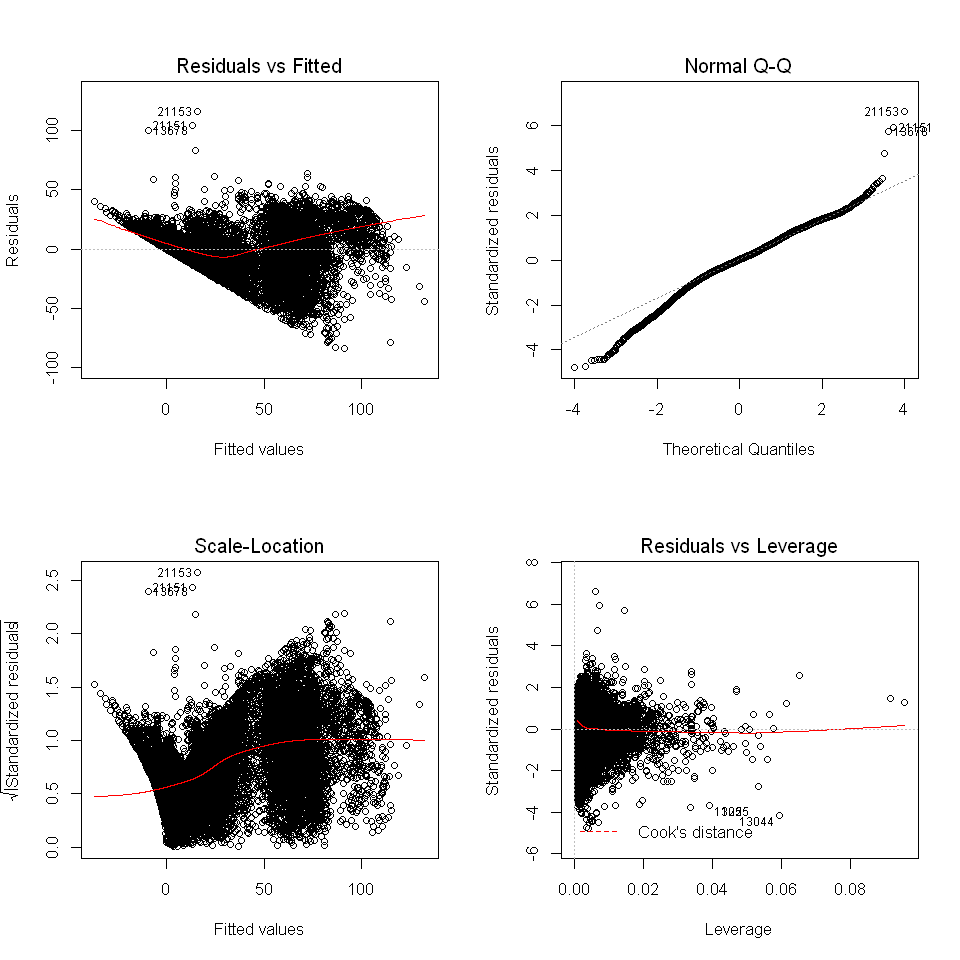

In [26]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(2,2))
plot(full_linear_model)

The model plots show:

- Residual vs Fitted - shows the residuals are not evenly distributed around zero, and they funnel to become larger as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line

- Normal Q-Q - the residuals deviate significantly from the dashed line, indicating the residuals are not normally distributed

- Scale-Location - The chart shows the model violates the assumption of equal variance, as the square root of standardized residuals are not even spread across the red line

- Residuals vs Leverage - The chart shows there are some possibly influential outliers, however they appear to cancel each other out

The full model is very complex and as we know the data has highly corelated variables, it is worth checking the correlation of predictors with the response varibale to select a threshold for removing few variables and to pick features that are relavant to the target. 


<a id='MD1b'></a>
### 3.1 b. Checking correlation of all the attributes variable against the target variable.

In [131]:
apply(cor(df_super, df_super$critical_temp), 2, sort)

wtd_mean_Valence,-0.6324010
wtd_gmean_Valence,-0.6156533
mean_Valence,-0.6000849
gmean_Valence,-0.5730681
gmean_Density,-0.5416844
wtd_gmean_Density,-0.5400456
wtd_range_Valence,-0.4399008
wtd_mean_Density,-0.4339396
wtd_gmean_FusionHeat,-0.4323645
gmean_FusionHeat,-0.4317946
wtd_gmean_atomic_radius,-0.4051756


In [167]:
#install.packages("cvTools")
library(cvTools)
# Performs cross-validation on the data and returns the mean of relavant metrics.
fit_lm_cv_func <- function(data, corr_thresh=NULL){
set.seed(111)

##code to get variables with very low corelation with the response 
features <- c() # Vector with variable names within the correlation threshold.
i <- 1
for (cc in cor(data, df_super$critical_temp))
{
if(abs(cc)>corr){
features <- append(features,i)
}
i <- i + 1
}
#####################

#Create 10 equally size folds
folds <- cvFolds(nrow(data), K=10)

acc <- matrix(0,nrow=10) # empty vector to store acc for each fold
for(i in 1:10)
{
train <- data[folds$subsets[folds$which != i], ] #Set the training set
validation <- data[folds$subsets[folds$which == i], ] #Set the validation set
    
mse_list <- c()

fit.lm <- lm(critical_temp ~ ., data = train, family = "gaussian")
probs <- predict(fit.lm, newdata = validation, type="response")
mse <- mean((validation$critical_temp - probs)^2) 
mse_list <- append(mse_list, mse)
    
}
return (mse = (mean(mse_list)))
}


Now, using the above functions, we would first do cross-validation on the various probability
thresholds and the above functions would be reused all over the rest of the code.

In [176]:
options(warn=-1)

tab <- matrix(NA,ncol=2,nrow=3)
colnames(tab) <- c("Correlation Threshold", "MSE")
len <- 1
for (corr in c(1,0.5,0)){
result <- fit_lm_cv_func(df_super, corr_thresh)
tab[len,] <- c(corr, result)
len <- len + 1
}
print(tab)


     Correlation Threshold     MSE
[1,]                   1.0 326.922
[2,]                   0.5 326.922
[3,]                   0.0 326.922


The above observation tells that there is no difference between different correlation threshold.
One reason could be that these variables are highly correlated amongst themselves. Hence it would make sense to remove multicolinearity using VIF.

<a id='MD1c'></a>
### 3.1.c. Variance Inflation Factor
it is a measure of how much the variance of the estimated regression coefficient is "inflated" by the existence of correlation among the predictor variables in the model.

A VIF of 1 means that there is no correlation among the k-th predictor and the remaining predictor variables, and hence the variance of the k-th coefficient is not inflated at all. The general rule of thumb is that VIFs exceeding 4 warrant further investigation, while VIFs exceeding 10 are signs of serious multicollinearity requiring correction.

We can see that certain variabled have very high VIF, suggesting high multicolinearity
Removing these varibles.


In [34]:
install.packages("fmsb")
library(fmsb)

package 'fmsb' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Stephy\AppData\Local\Temp\Rtmp0yEYFu\downloaded_packages


In [37]:
#Ref https://www.r-bloggers.com/collinearity-and-stepwise-vif-selection/

vif_func<-function(in_frame,thresh=10,trace=T,...){

  if(any(!'data.frame' %in% class(in_frame))) in_frame<-data.frame(in_frame)
  
  #get initial vif value for all comparisons of variables
  vif_init<-NULL
  var_names <- names(in_frame)
  for(val in var_names){
      regressors <- var_names[-which(var_names == val)]
      form <- paste(regressors, collapse = '+')
      form_in <- formula(paste(val, '~', form))
      vif_init<-rbind(vif_init, c(val, VIF(lm(form_in, data = in_frame, ...))))
      }
  vif_max<-max(as.numeric(vif_init[,2]), na.rm = TRUE)

  if(vif_max < thresh){
    if(trace==T){ #print output of each iteration
        prmatrix(vif_init,collab=c('var','vif'),rowlab=rep('',nrow(vif_init)),quote=F)
        cat('\n')
        cat(paste('All variables have VIF < ', thresh,', max VIF ',round(vif_max,2), sep=''),'\n\n')
        }
    return(var_names)
    }
  else{

    in_dat<-in_frame

    #backwards selection of explanatory variables, stops when all VIF values are below 'thresh'
    while(vif_max >= thresh){
      
      vif_vals<-NULL
      var_names <- names(in_dat)
        
      for(val in var_names){
        regressors <- var_names[-which(var_names == val)]
        form <- paste(regressors, collapse = '+')
        form_in <- formula(paste(val, '~', form))
        vif_add<-VIF(lm(form_in, data = in_dat, ...))
        vif_vals<-rbind(vif_vals,c(val,vif_add))
        }
      max_row<-which(vif_vals[,2] == max(as.numeric(vif_vals[,2]), na.rm = TRUE))[1]

      vif_max<-as.numeric(vif_vals[max_row,2])

      if(vif_max<thresh) break
      
      if(trace==T){ #print output of each iteration
        prmatrix(vif_vals,collab=c('var','vif'),rowlab=rep('',nrow(vif_vals)),quote=F)
        cat('\n')
        cat('removed: ',vif_vals[max_row,1],vif_max,'\n\n')
        flush.console()
        }

      in_dat<-in_dat[,!names(in_dat) %in% vif_vals[max_row,1]]

      }

    return(names(in_dat))
    
    }
    
    }

In [79]:
keep.dat<-vif_func(in_frame=df.train[,-82],thresh=10,trace=T)
form.in<-paste('critical_temp ~',paste(keep.dat,collapse='+'))
mod2<-lm(form.in,data=df.train)
summary(mod2)

 var                             vif             
 number_of_elements              80.9678703805394
 mean_atomic_mass                413.017687603836
 wtd_mean_atomic_mass            834.519256678362
 gmean_atomic_mass               442.786812805102
 wtd_gmean_atomic_mass           894.571003481797
 entropy_atomic_mass             188.251032412996
 wtd_entropy_atomic_mass         146.727053118316
 range_atomic_mass               55.3464007956564
 wtd_range_atomic_mass           24.6281669040325
 std_atomic_mass                 107.447312143873
 wtd_std_atomic_mass             82.5422619985353
 mean_fie                        2132.92679728029
 wtd_mean_fie                    8588.79515606715
 gmean_fie                       1664.06613419978
 wtd_gmean_fie                   5853.48245120929
 entropy_fie                     4132.1691289189 
 wtd_entropy_fie                 178.161763872925
 range_fie                       273.196194508203
 wtd_range_fie                   46.4513720052891


 var                             vif             
 number_of_elements              80.6372065664769
 mean_atomic_mass                399.867068507372
 wtd_mean_atomic_mass            799.268695147105
 gmean_atomic_mass               425.18066801576 
 wtd_gmean_atomic_mass           840.45339238922 
 entropy_atomic_mass             187.691905066258
 wtd_entropy_atomic_mass         145.803898479704
 range_atomic_mass               55.1832561329025
 wtd_range_atomic_mass           24.4658585565734
 std_atomic_mass                 103.934062861755
 wtd_std_atomic_mass             76.7026700563639
 mean_fie                        1025.2144532258 
 gmean_fie                       807.919575651833
 wtd_gmean_fie                   44.9104239283905
 entropy_fie                     3648.90766063118
 wtd_entropy_fie                 159.323464729207
 range_fie                       271.016498156975
 wtd_range_fie                   46.4297043716117
 std_fie                         279.717819049083


 var                             vif             
 number_of_elements              74.018248196179 
 mean_atomic_mass                392.338970192266
 wtd_mean_atomic_mass            768.498801093162
 gmean_atomic_mass               417.101290361713
 wtd_gmean_atomic_mass           804.458987685286
 entropy_atomic_mass             164.609965849831
 wtd_entropy_atomic_mass         139.732749566463
 range_atomic_mass               55.0287942130687
 wtd_range_atomic_mass           24.1008609571186
 std_atomic_mass                 102.130238015826
 wtd_std_atomic_mass             72.9646736241832
 mean_fie                        980.783775303044
 gmean_fie                       768.949103204566
 wtd_gmean_fie                   42.4274906081595
 wtd_entropy_fie                 143.393599818624
 range_fie                       269.31956924706 
 wtd_range_fie                   44.88942851446  
 std_fie                         260.762360643477
 wtd_std_fie                     100.138216097842


 var                             vif             
 number_of_elements              70.5619555119128
 mean_atomic_mass                156.063396880204
 wtd_mean_atomic_mass            79.497487112328 
 gmean_atomic_mass               166.738375967957
 entropy_atomic_mass             159.976238672268
 wtd_entropy_atomic_mass         128.946326243131
 range_atomic_mass               53.7218171043462
 wtd_range_atomic_mass           24.0537634729344
 std_atomic_mass                 75.7262932479273
 wtd_std_atomic_mass             36.3696388650331
 gmean_fie                       18.1942777216332
 wtd_gmean_fie                   41.722074829331 
 wtd_entropy_fie                 138.625571780523
 range_fie                       265.993792413331
 wtd_range_fie                   43.087686901059 
 std_fie                         215.909601796371
 wtd_std_fie                     99.5872312204565
 mean_atomic_radius              275.92078819735 
 wtd_mean_atomic_radius          48.9451379079176


 var                             vif             
 number_of_elements              61.1429198878816
 mean_atomic_mass                152.135288034476
 wtd_mean_atomic_mass            76.2023835260987
 gmean_atomic_mass               160.170872776666
 entropy_atomic_mass             159.614240829911
 wtd_entropy_atomic_mass         126.368420139084
 range_atomic_mass               53.2479266707684
 wtd_range_atomic_mass           23.5351450899747
 std_atomic_mass                 74.7727141598068
 wtd_std_atomic_mass             35.9543397211391
 gmean_fie                       18.1367752730688
 wtd_gmean_fie                   41.5099712679407
 wtd_entropy_fie                 137.576251417161
 range_fie                       260.664880648989
 wtd_range_fie                   42.7165769125158
 std_fie                         214.764571396609
 wtd_std_fie                     97.5875232543891
 mean_atomic_radius              20.3440733431863
 wtd_mean_atomic_radius          47.016046401823 


 var                             vif             
 number_of_elements              48.5614018111696
 mean_atomic_mass                142.915902875129
 wtd_mean_atomic_mass            75.8901461151136
 gmean_atomic_mass               148.806386601363
 entropy_atomic_mass             126.078676409454
 wtd_entropy_atomic_mass         124.847986739259
 range_atomic_mass               52.3597312608534
 wtd_range_atomic_mass           23.3921520236442
 std_atomic_mass                 72.997263946444 
 wtd_std_atomic_mass             34.9930319650752
 gmean_fie                       17.0886921754446
 wtd_gmean_fie                   39.7684351994483
 wtd_entropy_fie                 133.990429200959
 wtd_range_fie                   39.1331804895838
 std_fie                         63.7311783544145
 wtd_std_fie                     93.8871593296224
 mean_atomic_radius              19.2603571012858
 wtd_mean_atomic_radius          44.2161349552126
 wtd_entropy_atomic_radius       239.554866470043


 var                             vif             
 number_of_elements              46.2452832492316
 mean_atomic_mass                141.883645964644
 wtd_mean_atomic_mass            75.7820263639024
 gmean_atomic_mass               146.999391698374
 entropy_atomic_mass             125.345897050805
 wtd_entropy_atomic_mass         82.891814325757 
 range_atomic_mass               50.8017666350178
 wtd_range_atomic_mass           22.5069343129891
 std_atomic_mass                 69.7263606611402
 wtd_std_atomic_mass             33.3568413623416
 gmean_fie                       16.0823391433716
 wtd_gmean_fie                   38.5581268562984
 wtd_entropy_fie                 60.3565392015027
 wtd_range_fie                   35.0340206398313
 std_fie                         62.1663638274769
 wtd_std_fie                     90.2520089376538
 mean_atomic_radius              17.308099207609 
 wtd_mean_atomic_radius          42.5639611437177
 range_atomic_radius             106.170701089503


 var                             vif             
 number_of_elements              41.146202914314 
 mean_atomic_mass                41.0544698906672
 wtd_mean_atomic_mass            70.9744463472491
 entropy_atomic_mass             112.256670740369
 wtd_entropy_atomic_mass         81.1403104402601
 range_atomic_mass               49.4303548496956
 wtd_range_atomic_mass           21.6632856334859
 std_atomic_mass                 61.3558466386393
 wtd_std_atomic_mass             33.1120033352428
 gmean_fie                       15.8460237659619
 wtd_gmean_fie                   37.7361144919133
 wtd_entropy_fie                 59.3451335509798
 wtd_range_fie                   33.9384265426772
 std_fie                         61.8678579336129
 wtd_std_fie                     88.4791186455434
 mean_atomic_radius              17.1801341783302
 wtd_mean_atomic_radius          42.4113471627244
 range_atomic_radius             105.091637797604
 wtd_range_atomic_radius         14.5914185615202


 var                             vif             
 number_of_elements              35.6426727009742
 mean_atomic_mass                40.8200983966297
 wtd_mean_atomic_mass            70.7410908667455
 wtd_entropy_atomic_mass         63.439189820673 
 range_atomic_mass               48.7007712364017
 wtd_range_atomic_mass           21.1715136860081
 std_atomic_mass                 50.4654214016453
 wtd_std_atomic_mass             29.8895079302265
 gmean_fie                       15.6733455278617
 wtd_gmean_fie                   36.7691488043168
 wtd_entropy_fie                 57.0045011389536
 wtd_range_fie                   33.1288495550606
 std_fie                         58.6165225417071
 wtd_std_fie                     86.0542836482396
 mean_atomic_radius              16.9224036077064
 wtd_mean_atomic_radius          42.1032221474547
 wtd_range_atomic_radius         14.2152171538653
 std_atomic_radius               52.9772188546443
 wtd_std_atomic_radius           71.6745937987337


 var                             vif             
 number_of_elements              35.038392103938 
 mean_atomic_mass                27.9823766950993
 wtd_mean_atomic_mass            39.7952294899577
 wtd_entropy_atomic_mass         63.0097247741932
 range_atomic_mass               48.5529302113677
 wtd_range_atomic_mass           17.3749642204582
 std_atomic_mass                 49.655756168539 
 wtd_std_atomic_mass             29.7538511825028
 gmean_fie                       14.9814461480555
 wtd_gmean_fie                   34.8308413508417
 wtd_entropy_fie                 55.4816836776205
 wtd_range_fie                   32.7833254263875
 std_fie                         16.0971641771733
 mean_atomic_radius              16.5144811849206
 wtd_mean_atomic_radius          41.3684787184177
 wtd_range_atomic_radius         14.1071543771297
 std_atomic_radius               36.6603508131501
 wtd_std_atomic_radius           43.9988837778852
 mean_Density                    46.951164171168 


 var                             vif             
 number_of_elements              31.9135810552119
 mean_atomic_mass                24.6649630866766
 wtd_mean_atomic_mass            38.778209423958 
 range_atomic_mass               47.0387220630274
 wtd_range_atomic_mass           14.5602356487387
 std_atomic_mass                 42.2841336813221
 wtd_std_atomic_mass             24.8949375864299
 gmean_fie                       14.2256425128205
 wtd_gmean_fie                   33.2498176204437
 wtd_entropy_fie                 45.3624038942954
 wtd_range_fie                   30.1182068845271
 std_fie                         15.9417488614969
 mean_atomic_radius              15.8799381736202
 wtd_mean_atomic_radius          40.3931716559637
 wtd_range_atomic_radius         13.8484755509751
 std_atomic_radius               35.6906161779175
 wtd_std_atomic_radius           41.8475497081153
 mean_Density                    40.6027816158217
 gmean_Density                   53.7584534290963


 var                             vif             
 number_of_elements              31.597157283186 
 mean_atomic_mass                24.5386866215552
 wtd_mean_atomic_mass            38.0697098924375
 range_atomic_mass               45.2873380425239
 wtd_range_atomic_mass           14.4205728308251
 std_atomic_mass                 39.9550494140748
 wtd_std_atomic_mass             23.6670030228788
 gmean_fie                       14.0551040911904
 wtd_gmean_fie                   32.7476619594804
 wtd_entropy_fie                 44.6144023049845
 wtd_range_fie                   28.9840427736272
 std_fie                         14.0982606546283
 mean_atomic_radius              15.0215424613648
 wtd_mean_atomic_radius          39.3032453737688
 wtd_range_atomic_radius         13.4161678667068
 std_atomic_radius               34.821360795579 
 wtd_std_atomic_radius           40.4396186097599
 mean_Density                    14.1092532107731
 entropy_Density                 37.4937324750679


 var                             vif             
 number_of_elements              27.6327030556676
 mean_atomic_mass                23.5246232930858
 wtd_mean_atomic_mass            35.6803155886458
 wtd_range_atomic_mass           14.0448272502897
 std_atomic_mass                 16.8751264477371
 wtd_std_atomic_mass             22.2141300025987
 gmean_fie                       13.3130727250727
 wtd_gmean_fie                   31.8271377902245
 wtd_range_fie                   21.3362940732578
 std_fie                         13.1114976518684
 mean_atomic_radius              14.8843222397386
 wtd_mean_atomic_radius          38.6991707381651
 wtd_range_atomic_radius         12.8493655536099
 std_atomic_radius               33.3284189666326
 wtd_std_atomic_radius           39.2643733032753
 mean_Density                    13.9211443003563
 entropy_Density                 22.5577392634019
 wtd_entropy_Density             18.9477422458634
 range_Density                   13.7539323885962


 var                             vif             
 mean_atomic_mass                17.8204626358763
 wtd_mean_atomic_mass            24.7149620564981
 wtd_range_atomic_mass           11.0708753565407
 std_atomic_mass                 15.1814137518165
 wtd_std_atomic_mass             19.4156708689558
 gmean_fie                       11.3636612119544
 wtd_gmean_fie                   23.5868822677232
 wtd_range_fie                   18.0493479278499
 std_fie                         12.4523144323322
 mean_atomic_radius              5.54781188330746
 wtd_range_atomic_radius         7.68384180687615
 std_atomic_radius               10.0060011497185
 mean_Density                    13.237355878993 
 entropy_Density                 19.2727337525127
 wtd_entropy_Density             17.4480124145088
 range_Density                   13.2352365290638
 wtd_range_Density               8.17110433860208
 wtd_std_Density                 15.354338491043 
 mean_ElectronAffinity           12.1823854619133



Call:
lm(formula = form.in, data = df.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-117.900  -12.319    0.064   12.852  102.802 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -4.670e+01  5.462e+00  -8.551  < 2e-16 ***
mean_atomic_mass                 1.734e-01  1.486e-02  11.670  < 2e-16 ***
wtd_range_atomic_mass           -1.951e-01  1.559e-02 -12.517  < 2e-16 ***
std_atomic_mass                  4.330e-01  2.827e-02  15.315  < 2e-16 ***
wtd_std_atomic_mass             -2.439e-01  3.330e-02  -7.322 2.55e-13 ***
gmean_fie                        6.130e-02  4.486e-03  13.665  < 2e-16 ***
wtd_range_fie                   -2.065e-02  1.731e-03 -11.929  < 2e-16 ***
std_fie                          1.507e-02  4.970e-03   3.032 0.002437 ** 
mean_atomic_radius               1.154e-01  1.790e-02   6.449 1.16e-10 ***
wtd_range_atomic_radius         -1.010e-01  1.045e-02  -9.668  < 2e-16 ***
std_atomic

Most of the variables that have been removed due to high VIF are also the ones that have very high corelation amongst themselves.
We will proceed the rest of the analysis with these 29 variables


In [183]:
list(keep.dat)

[[1]]
 [1] "mean_atomic_mass"                "wtd_range_atomic_mass"          
 [3] "std_atomic_mass"                 "wtd_std_atomic_mass"            
 [5] "gmean_fie"                       "wtd_range_fie"                  
 [7] "std_fie"                         "mean_atomic_radius"             
 [9] "wtd_range_atomic_radius"         "std_atomic_radius"              
[11] "mean_Density"                    "entropy_Density"                
[13] "wtd_entropy_Density"             "range_Density"                  
[15] "wtd_range_Density"               "wtd_std_Density"                
[17] "mean_ElectronAffinity"           "wtd_gmean_ElectronAffinity"     
[19] "entropy_ElectronAffinity"        "wtd_entropy_ElectronAffinity"   
[21] "range_ElectronAffinity"          "wtd_range_ElectronAffinity"     
[23] "wtd_std_ElectronAffinity"        "gmean_FusionHeat"               
[25] "wtd_entropy_FusionHeat"          "range_FusionHeat"               
[27] "wtd_range_FusionHeat"            "wtd_std_FusionHeat"             
[29] "mean_ThermalConductivity"        "gmean_ThermalConductivity"      
[31] "wtd_gmean_ThermalConductivity"   "entropy_ThermalConductivity"    
[33] "wtd_entropy_ThermalConductivity" "wtd_range_ThermalConductivity"  
[35] "gmean_Valence"                   "range_Valence"                  
[37] "wtd_range_Valence"               "wtd_std_Valence"

<a id='MD2'></a>
### 3.2 Using stepwise backward, forward and exhaustive method for subset selection

Ref: Explanation from tutorial of week 6

Using the regsubsets() function to perform subset selection in order to choose the subset models containing the predictors. The model is chosen based on Mallow's Cp ,  BIC , and adjusted  R2. Plots will provide evidence for the selection. The coefficients will be reported. 

* <b>Forward stepwise selection</b>: Starts with one-variable models, gradually add one variable, end with a model including all the specified variables.
* <b>Backward stepwise selection</b>: Starts with a full model, gradually exclude one variable, end with one-variable models.
* <b>Hybrid selection</b>: the combination of Forward stepwise selection and Backward stepwise selection.

Performing stepwise backward regression first

The summary() function will output the best set of variables for each model size from 1 to 29..

The asterisk in output indicates that a variable in the corresponding column is included in the model. 

The below mentioned measures help to find optimal number of variables

1) Mallow's CP
2) Bayesian Information Criterion
3) Adjusted

as they penalize complex overfitting models. Aim is to find model with low Mallow's Cp, low Bic and high adjusted Rsquared.


In [27]:
#install.packages("leaps")
library(leaps)
fit_bwd <- regsubsets(critical_temp ~ mean_atomic_mass+
wtd_range_atomic_mass+
std_atomic_mass+
gmean_fie+
wtd_range_fie+
mean_atomic_radius+
wtd_range_atomic_radius+
std_atomic_radius+
wtd_entropy_Density+
range_Density+
wtd_range_Density+
mean_ElectronAffinity+
wtd_gmean_ElectronAffinity+
wtd_entropy_ElectronAffinity+
range_ElectronAffinity+
wtd_std_ElectronAffinity+
gmean_FusionHeat+
range_FusionHeat+
wtd_range_FusionHeat+
wtd_std_FusionHeat+
mean_ThermalConductivity+
wtd_gmean_ThermalConductivity+
entropy_ThermalConductivity+
wtd_entropy_ThermalConductivity+
wtd_range_ThermalConductivity+
gmean_Valence+
range_Valence+
wtd_range_Valence+
wtd_std_Valence, data = df.train , method = 'backward', nvmax=29)
            
fit.summary_bwd <- summary(fit_bwd)
fit.summary_bwd

Subset selection object
Call: regsubsets.formula(critical_temp ~ mean_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + gmean_fie + wtd_range_fie + mean_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_entropy_Density + 
    range_Density + wtd_range_Density + mean_ElectronAffinity + 
    wtd_gmean_ElectronAffinity + wtd_entropy_ElectronAffinity + 
    range_ElectronAffinity + wtd_std_ElectronAffinity + gmean_FusionHeat + 
    range_FusionHeat + wtd_range_FusionHeat + wtd_std_FusionHeat + 
    mean_ThermalConductivity + wtd_gmean_ThermalConductivity + 
    entropy_ThermalConductivity + wtd_entropy_ThermalConductivity + 
    wtd_range_ThermalConductivity + gmean_Valence + range_Valence + 
    wtd_range_Valence + wtd_std_Valence, data = df.train, method = "backward", 
    nvmax = 29)
29 Variables  (and intercept)
                                Forced in Forced out
mean_atomic_mass                    FALSE      FALSE
wtd_range_atomic_mass               FA

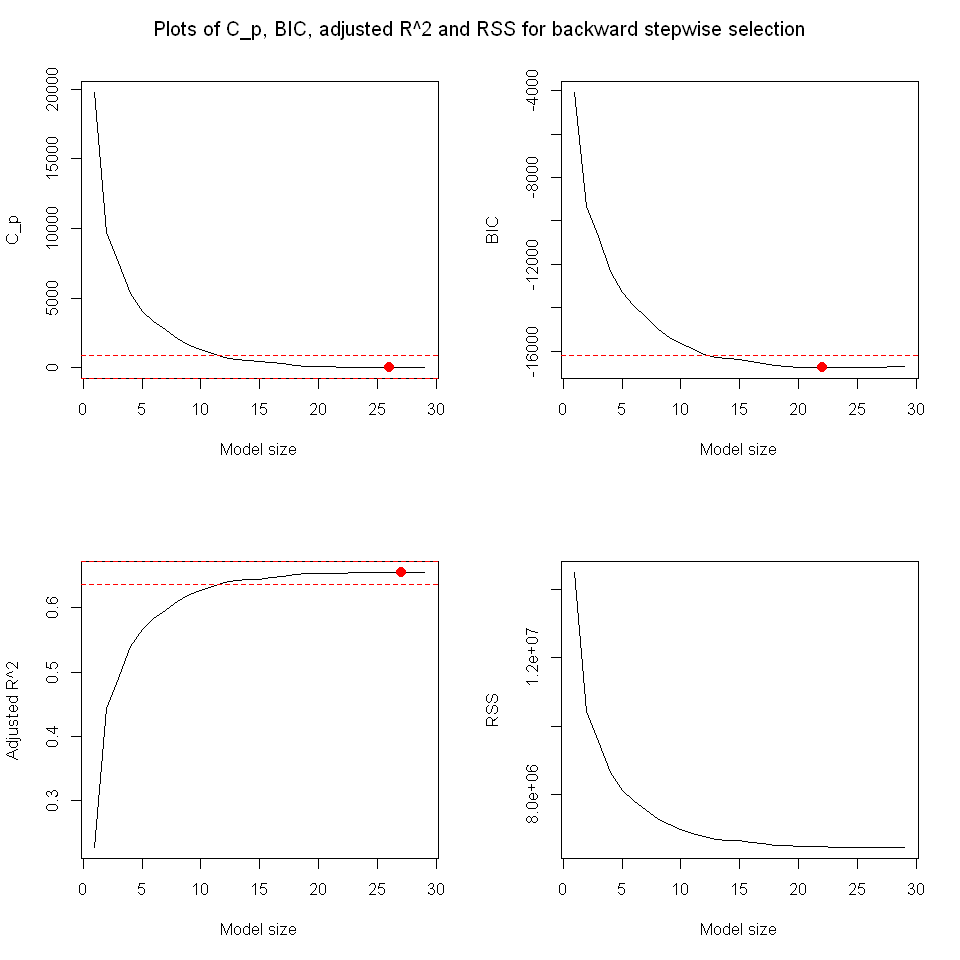

In [28]:
par(mfrow = c(2, 2))
# plot Mallow's CP
plot(fit.summary_bwd$cp, xlab = "Model size", ylab = "C_p", type = "l")
points(which.min(fit.summary_bwd$cp), fit.summary_bwd$cp[which.min(fit.summary_bwd$cp)], col = "red", cex = 2, pch = 20)
min.cp <- min(fit.summary_bwd$cp)
std.cp <- sd(fit.summary_bwd$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
# plot BIC
plot(fit.summary_bwd$bic, xlab = "Model size", ylab = "BIC", type = "l")
points(which.min(fit.summary_bwd$bic), fit.summary_bwd$bic[which.min(fit.summary_bwd$bic)], col = "red", cex = 2, pch = 20)
min.bic <- min(fit.summary_bwd$bic)
std.bic <- sd(fit.summary_bwd$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
# plot Adjr2
plot(fit.summary_bwd$adjr2, xlab = "Model size", ylab = "Adjusted R^2", type = "l")
points(which.max(fit.summary_bwd$adjr2), fit.summary_bwd$adjr2[which.max(fit.summary_bwd$adjr2)], col = "red", cex = 2, pch = 20)
max.adjr2 <- max(fit.summary_bwd$adjr2)
std.adjr2 <- sd(fit.summary_bwd$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)
# plot RSS
plot(fit.summary_bwd$rss, xlab = "Model size", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)

Observing the plots for Mallow's CP, BIC and Adjusted we can conclude, 

A model with 10 or less attributes would underfit and model with more than 29 vriables would overfit.

According to Mallow's CP, the best model is the model with 27 predictor variables. 
According to BIC, the best model is the model with 23 predictor variables. 
According to Adjusted R2, the best model is the model with 27 predictor variables.

Considering the number of variables that are within 0.2 standard deviations from the optimal, we can conclude that 13 predictor variables would satisfy the condition for Cp, BIC and Adjusted Rsquared . 

Selecting the 13 predictor variables got from Backward Stepwise Selection.


In [29]:
coef(fit_bwd, 13)

(Intercept)                 std_atomic_mass 
                     13.1470659                       0.1704463 
        wtd_range_atomic_radius               std_atomic_radius 
                     -0.1453704                       0.3574142 
          mean_ElectronAffinity      wtd_gmean_ElectronAffinity 
                      0.2075928                      -0.3286631 
   wtd_entropy_ElectronAffinity              wtd_std_FusionHeat 
                    -17.1942780                      -0.6660800 
       mean_ThermalConductivity   wtd_gmean_ThermalConductivity 
                      0.1235903                      -0.2850212 
    entropy_ThermalConductivity wtd_entropy_ThermalConductivity 
                     13.2190171                      15.5493853 
  wtd_range_ThermalConductivity                 wtd_std_Valence 
                      0.3119935                     -17.3975457

In [174]:
fit2 <- lm(critical_temp ~ 
std_atomic_mass+wtd_range_atomic_radius+std_atomic_radius
+mean_ElectronAffinity+wtd_gmean_ElectronAffinity+wtd_entropy_ElectronAffinity
+wtd_std_FusionHeat+mean_ThermalConductivity+wtd_gmean_ThermalConductivity
+entropy_ThermalConductivity+wtd_entropy_ThermalConductivity+wtd_range_ThermalConductivity
+wtd_std_Valence  , data=df.train1)


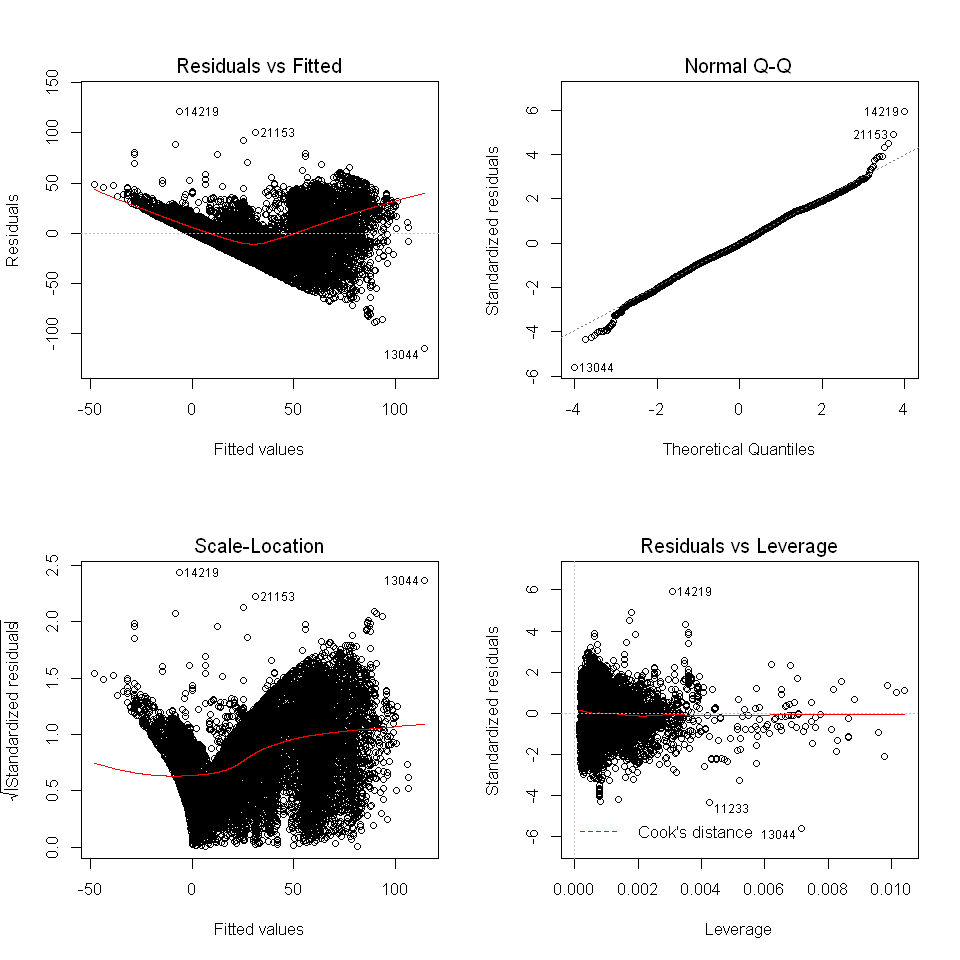

In [177]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(2,2))
plot(fit2)

The model plots show:

- Residual vs Fitted - shows the residuals are not evenly distributed around zero, and they funnel to become larger as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line

- Normal Q-Q - the residuals do not deviate significantly from the dashed line, but still they are not normally distributed as indicated at the tails of plot

- Scale-Location - The chart shows the model violates the assumption of equal variance, as the square root of standardized residuals are not evenly spread across the red line

- Residuals vs Leverage - The chart shows there are some possibly influential outliers, however they appear to cancel each other out


In [30]:
#forward regression
fit_fwd <- regsubsets(critical_temp ~ mean_atomic_mass+
wtd_range_atomic_mass+
std_atomic_mass+
gmean_fie+
wtd_range_fie+
mean_atomic_radius+
wtd_range_atomic_radius+
std_atomic_radius+
wtd_entropy_Density+
range_Density+
wtd_range_Density+
mean_ElectronAffinity+
wtd_gmean_ElectronAffinity+
wtd_entropy_ElectronAffinity+
range_ElectronAffinity+
wtd_std_ElectronAffinity+
gmean_FusionHeat+
range_FusionHeat+
wtd_range_FusionHeat+
wtd_std_FusionHeat+
mean_ThermalConductivity+
wtd_gmean_ThermalConductivity+
entropy_ThermalConductivity+
wtd_entropy_ThermalConductivity+
wtd_range_ThermalConductivity+
gmean_Valence+
range_Valence+
wtd_range_Valence+
wtd_std_Valence, data = df.train, method = 'forward' ,nvmax=29 )
            
fit.summary_fwd <- summary(fit_fwd)
fit.summary_fwd

Subset selection object
Call: regsubsets.formula(critical_temp ~ mean_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + gmean_fie + wtd_range_fie + mean_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_entropy_Density + 
    range_Density + wtd_range_Density + mean_ElectronAffinity + 
    wtd_gmean_ElectronAffinity + wtd_entropy_ElectronAffinity + 
    range_ElectronAffinity + wtd_std_ElectronAffinity + gmean_FusionHeat + 
    range_FusionHeat + wtd_range_FusionHeat + wtd_std_FusionHeat + 
    mean_ThermalConductivity + wtd_gmean_ThermalConductivity + 
    entropy_ThermalConductivity + wtd_entropy_ThermalConductivity + 
    wtd_range_ThermalConductivity + gmean_Valence + range_Valence + 
    wtd_range_Valence + wtd_std_Valence, data = df.train, method = "forward", 
    nvmax = 29)
29 Variables  (and intercept)
                                Forced in Forced out
mean_atomic_mass                    FALSE      FALSE
wtd_range_atomic_mass               FAL

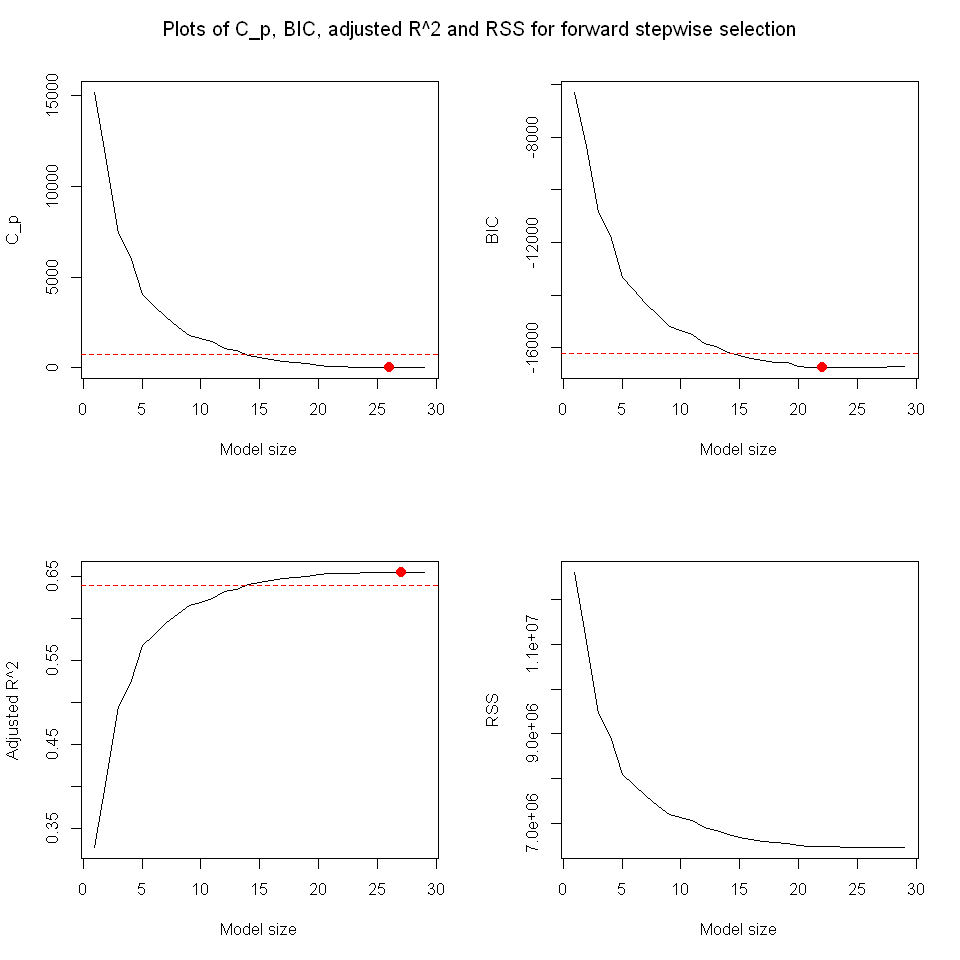

In [31]:
par(mfrow = c(2, 2))
# plot Mallow's CP
plot(fit.summary_fwd$cp, xlab = "Model size", ylab = "C_p", type = "l")
points(which.min(fit.summary_fwd$cp), fit.summary_fwd$cp[which.min(fit.summary_fwd$cp)], col = "red", cex = 2, pch = 20)
min.cp <- min(fit.summary_fwd$cp)
std.cp <- sd(fit.summary_fwd$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
# plot BIC
plot(fit.summary_fwd$bic, xlab = "Model size", ylab = "BIC", type = "l")
points(which.min(fit.summary_fwd$bic), fit.summary_fwd$bic[which.min(fit.summary_fwd$bic)], col = "red", cex = 2, pch = 20)
min.bic <- min(fit.summary_fwd$bic)
std.bic <- sd(fit.summary_fwd$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
# plot Adjr2
plot(fit.summary_fwd$adjr2, xlab = "Model size", ylab = "Adjusted R^2", type = "l")
points(which.max(fit.summary_fwd$adjr2), fit.summary_fwd$adjr2[which.max(fit.summary_fwd$adjr2)], col = "red", cex = 2, pch = 20)
max.adjr2 <- max(fit.summary_fwd$adjr2)
std.adjr2 <- sd(fit.summary_fwd$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)
# plot RSS
plot(fit.summary_fwd$rss, xlab = "Model size", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

Observing the plots for Mallow's CP, BIC and Adjusted we can conclude, 

The results are very similar to backward regression model.

A model with 14 or less attributes would underfit and model with more than 29 variables would overfit.

According to Mallow's CP, the best model is the model with 26 predictor variables. 
According to BIC, the best model is the model with 22 predictor variables. 
According to Adjusted R2, the best model is the model with 27 predictor variables.

Considering the number of variables that are within 0.2 standard deviations from the optimal, we can conclude that 15 predictor variables would satisfy the condition for Cp, BIC and Adjusted Rsquared . 

Selecting the 15 predictor variables got from Backward Stepwise Selection.


In [32]:
coef(fit_fwd, 15)

(Intercept)                 std_atomic_mass 
                     15.7211767                       0.1708336 
        wtd_range_atomic_radius               std_atomic_radius 
                     -0.1474603                       0.3307277 
          mean_ElectronAffinity      wtd_gmean_ElectronAffinity 
                      0.2014382                      -0.3248147 
   wtd_entropy_ElectronAffinity              wtd_std_FusionHeat 
                    -16.3747763                      -0.6438056 
       mean_ThermalConductivity   wtd_gmean_ThermalConductivity 
                      0.1213930                      -0.2790065 
    entropy_ThermalConductivity wtd_entropy_ThermalConductivity 
                     11.5091517                      15.8326726 
  wtd_range_ThermalConductivity                   gmean_Valence 
                      0.3090138                      -0.4120220 
                  range_Valence                 wtd_std_Valence 
                      2.0090851                     -22.2106354

In [178]:
fit3 <- lm(critical_temp ~ 
std_atomic_mass+wtd_range_atomic_radius+std_atomic_radius
+mean_ElectronAffinity+wtd_gmean_ElectronAffinity+wtd_entropy_ElectronAffinity
+wtd_std_FusionHeat+mean_ThermalConductivity+wtd_gmean_ThermalConductivity
+entropy_ThermalConductivity+wtd_entropy_ThermalConductivity+wtd_range_ThermalConductivity+gmean_Valence+range_Valence
+wtd_std_Valence  , data=df.train1)


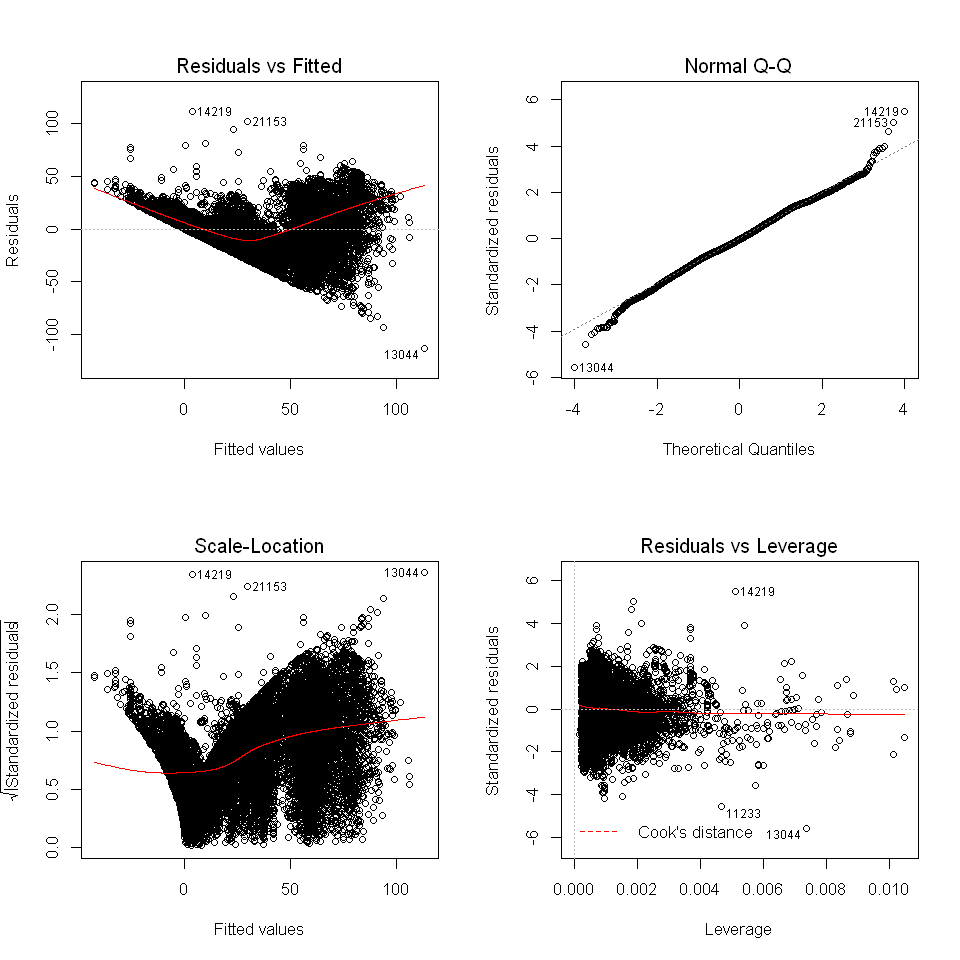

In [179]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(2,2))
plot(fit4)

The model plots show:

- Residual vs Fitted - shows the residuals are not evenly distributed around zero, and they funnel to become larger as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line

- Normal Q-Q - the residuals though they do not deviate significantly from the dashed line, it is not perfectly normally distributed

- Scale-Location - The chart shows the model violates the assumption of equal variance, as the square root of standardized residuals are not evenly spread across the red line

- Residuals vs Leverage - The chart shows there are some possibly influential outliers, however they appear to cancel each other out


In [33]:
#library("leaps")
fit_hbd <- regsubsets(critical_temp ~ 
                        mean_atomic_mass+
                        wtd_range_atomic_mass+
                        std_atomic_mass+
                        gmean_fie+
                        wtd_range_fie+
                        mean_atomic_radius+
                        wtd_range_atomic_radius+
                        std_atomic_radius+
                        wtd_entropy_Density+
                        range_Density+
                        wtd_range_Density+
                        mean_ElectronAffinity+
                        wtd_gmean_ElectronAffinity+
                        wtd_entropy_ElectronAffinity+
                        range_ElectronAffinity+
                        wtd_std_ElectronAffinity+
                        gmean_FusionHeat+
                        range_FusionHeat+
                        wtd_range_FusionHeat+
                        wtd_std_FusionHeat+
                        mean_ThermalConductivity+
                        wtd_gmean_ThermalConductivity+
                        entropy_ThermalConductivity+
                        wtd_entropy_ThermalConductivity+
                        wtd_range_ThermalConductivity+
                        gmean_Valence+
                        range_Valence+
                        wtd_range_Valence+
                        wtd_std_Valence
, data = df.train , really.big=T, method = 'exhaustive', nvmax=29)
fit.summary_hbd <- summary(fit_hbd)
fit.summary_hbd

Subset selection object
Call: regsubsets.formula(critical_temp ~ mean_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + gmean_fie + wtd_range_fie + mean_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_entropy_Density + 
    range_Density + wtd_range_Density + mean_ElectronAffinity + 
    wtd_gmean_ElectronAffinity + wtd_entropy_ElectronAffinity + 
    range_ElectronAffinity + wtd_std_ElectronAffinity + gmean_FusionHeat + 
    range_FusionHeat + wtd_range_FusionHeat + wtd_std_FusionHeat + 
    mean_ThermalConductivity + wtd_gmean_ThermalConductivity + 
    entropy_ThermalConductivity + wtd_entropy_ThermalConductivity + 
    wtd_range_ThermalConductivity + gmean_Valence + range_Valence + 
    wtd_range_Valence + wtd_std_Valence, data = df.train, really.big = T, 
    method = "exhaustive", nvmax = 29)
29 Variables  (and intercept)
                                Forced in Forced out
mean_atomic_mass                    FALSE      FALSE
wtd_range_atomic_mas

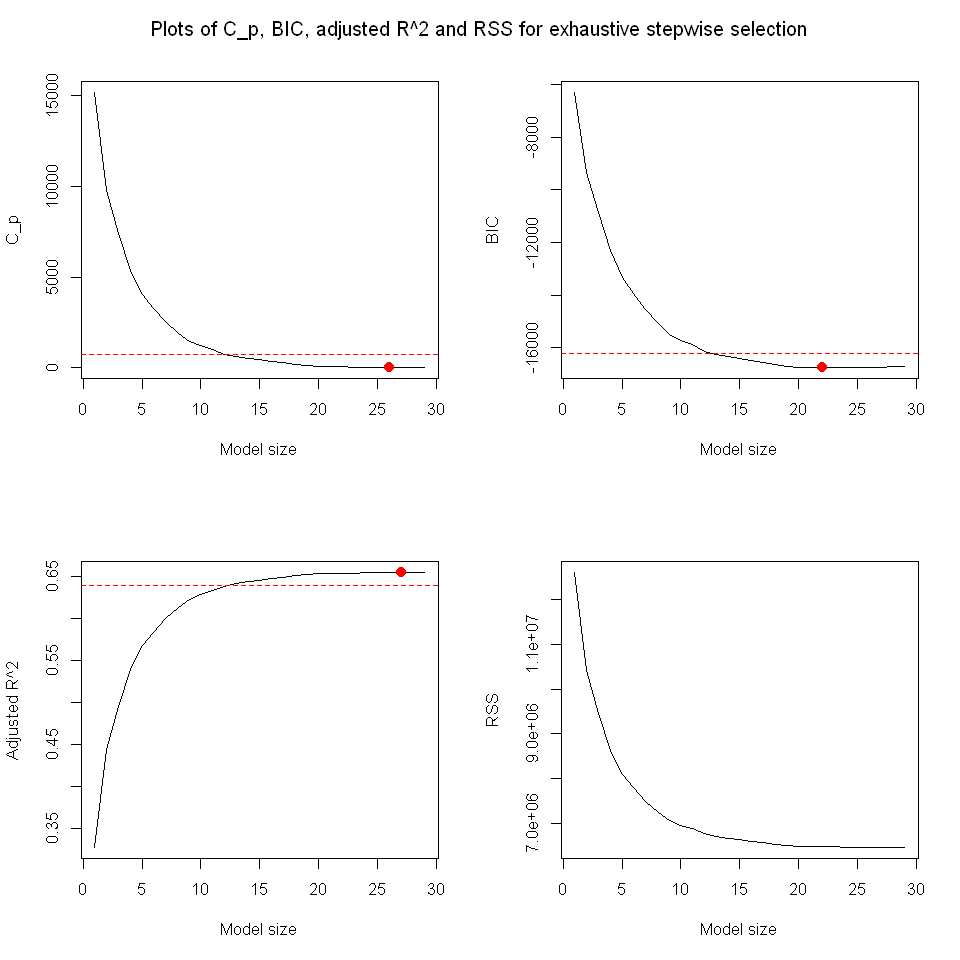

In [34]:
par(mfrow = c(2, 2))
# plot Mallow's CP
plot(fit.summary_hbd$cp, xlab = "Model size", ylab = "C_p", type = "l")
points(which.min(fit.summary_hbd$cp), fit.summary_hbd$cp[which.min(fit.summary_hbd$cp)], col = "red", cex = 2, pch = 20)
min.cp <- min(fit.summary_hbd$cp)
std.cp <- sd(fit.summary_hbd$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
# plot BIC
plot(fit.summary_hbd$bic, xlab = "Model size", ylab = "BIC", type = "l")
points(which.min(fit.summary_hbd$bic), fit.summary_hbd$bic[which.min(fit.summary_hbd$bic)], col = "red", cex = 2, pch = 20)
min.bic <- min(fit.summary_hbd$bic)
std.bic <- sd(fit.summary_hbd$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
# plot Adjr2
plot(fit.summary_hbd$adjr2, xlab = "Model size", ylab = "Adjusted R^2", type = "l")
points(which.max(fit.summary_hbd$adjr2), fit.summary_hbd$adjr2[which.max(fit.summary_hbd$adjr2)], col = "red", cex = 2, pch = 20)
max.adjr2 <- max(fit.summary_hbd$adjr2)
std.adjr2 <- sd(fit.summary_hbd$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)
# plot RSS
plot(fit.summary_hbd$rss, xlab = "Model size", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for exhaustive stepwise selection", side = 3, line = -2, outer = TRUE)

Observing the plots for Mallow's CP, BIC and Adjusted we can conclude, 

The results are very similar to forward regression model.

A model with 14 or less attributes would underfit and model with more than 29 variables would overfit.

According to Mallow's CP, the best model is the model with 26 predictor variables. 
According to BIC, the best model is the model with 22 predictor variables. 
According to Adjusted R2, the best model is the model with 27 predictor variables.

Considering the number of variables that are within 0.2 standard deviations from the optimal, we can conclude that 15 predictor variables would satisfy the condition for Cp, BIC and Adjusted Rsquared . 

Selecting the 15 predictor variables got from exhaustive Stepwise Selection.


In [35]:
coef(fit_hbd, 15)

(Intercept)                 std_atomic_mass 
                   13.542632748                     0.250297722 
        wtd_range_atomic_radius               std_atomic_radius 
                   -0.148301944                     0.338482047 
                  range_Density           mean_ElectronAffinity 
                   -0.000616808                     0.209128014 
     wtd_gmean_ElectronAffinity    wtd_entropy_ElectronAffinity 
                   -0.327122140                   -16.553791276 
             wtd_std_FusionHeat        mean_ThermalConductivity 
                   -0.665449539                     0.134100484 
  wtd_gmean_ThermalConductivity     entropy_ThermalConductivity 
                   -0.283039921                    12.408997634 
wtd_entropy_ThermalConductivity   wtd_range_ThermalConductivity 
                   15.724967212                     0.309614221 
                  range_Valence                 wtd_std_Valence 
                    2.542463486                   -22.949022004

In [180]:
fit4 <- lm(critical_temp ~ 
std_atomic_mass+wtd_range_atomic_radius+std_atomic_radius+range_Density
+mean_ElectronAffinity+wtd_gmean_ElectronAffinity+wtd_entropy_ElectronAffinity
+wtd_std_FusionHeat+mean_ThermalConductivity+wtd_gmean_ThermalConductivity
+entropy_ThermalConductivity+wtd_entropy_ThermalConductivity+wtd_range_ThermalConductivity+range_Valence
+wtd_std_Valence  , data=df.train1)


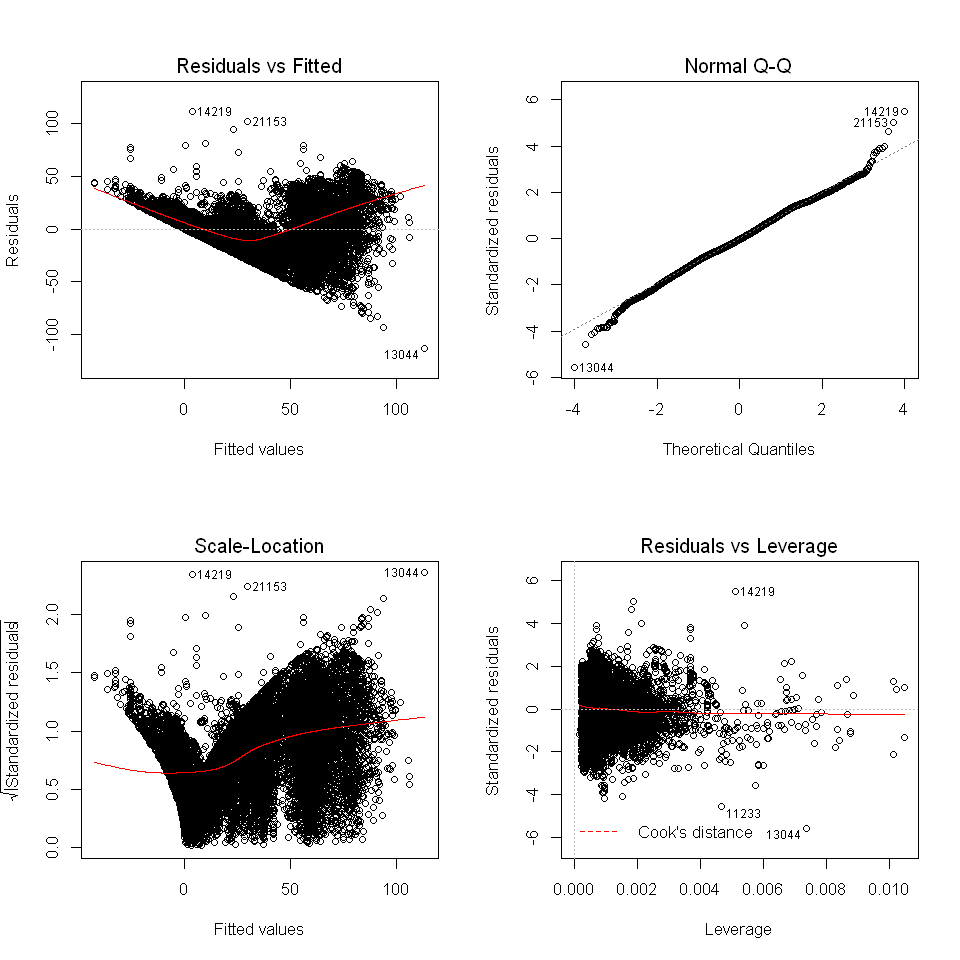

In [182]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(2,2))
plot(fit4)

The model plots show:

- Residual vs Fitted - shows the residuals are not evenly distributed around zero, and they funnel to become larger as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line

- Normal Q-Q - the residuals though do not deviate significantly from the dashed line, still some residuals are not part of normal distribution 

- Scale-Location - The chart shows the model violates the assumption of equal variance, as the square root of standardized residuals are not evenly spread across the red line

- Residuals vs Leverage - The chart shows there are some possibly influential outliers, however they appear to cancel each other out


<a id='MD3'></a>
### 3.3 Lasso Regularisation for feature selection

Next considering Lasso Regularisation which helps to perform feature selection automatically. 
Lasso regularizes the coefficient in a way such that the estimated coefficients can be shrunk toward zero, depending on the shrinkage parameter. The variables with zero co-eff can be eleiminated from the model. Thus Lasso helps in feature selection.
Using the glmnet function from glmnet package to help us build a Lasso model.


In [36]:
library(glmnet)

In [37]:
vif29 <- c('mean_atomic_mass', 
'wtd_range_atomic_mass',
'std_atomic_mass',
'gmean_fie',
'wtd_range_fie',
'mean_atomic_radius',
'wtd_range_atomic_radius',
'std_atomic_radius',
'wtd_entropy_Density',
'range_Density',
'wtd_range_Density',
'mean_ElectronAffinity',
'wtd_gmean_ElectronAffinity',
'wtd_entropy_ElectronAffinity',
'range_ElectronAffinity',
'wtd_std_ElectronAffinity',
'gmean_FusionHeat',
'range_FusionHeat',
'wtd_range_FusionHeat',
'wtd_std_FusionHeat',
'mean_ThermalConductivity',
'wtd_gmean_ThermalConductivity',
'entropy_ThermalConductivity',
'wtd_entropy_ThermalConductivity',
'wtd_range_ThermalConductivity',
'gmean_Valence',
'range_Valence',
'wtd_range_Valence',
'wtd_std_Valence', 
'critical_temp')

df.train1 <- df.train[,vif29]
df.test1 <- df.test[,vif29]



In [38]:
dim(df.train1)
dim(df.test1)

[1] 15947    30

[1] 5316   30

Using a lasso model to fit the data post removing variables with high VIF.

And Use cross-validation to select the optimal value of $\lambda$.

Plots of the cross-validation error as a function of $\lambda$, will be created and along with the resulting coefficient estimates.

model.matrix function produces a data matrix corresponding to the 29 predictor variables from the and also transforms any qualitative variables into dummy variables. In this case, there are no qualitative variables. 


In [39]:
#matrix for training data
xmat <- model.matrix(df.train1$critical_temp ~ .,  family="gaussian", data = df.train1)
#removing intercept
xmat <- xmat[, -1]

#matrix for test data
xmat_test <- model.matrix(df.test1$critical_temp ~ .,  family="gaussian", data = df.test1)
#removing intercept
xmat_test <- xmat_test[, -1]

In [40]:
#fitting lasso model on df.train
lasso.mod = glmnet(xmat, df.train1$critical_temp, alpha = 1)

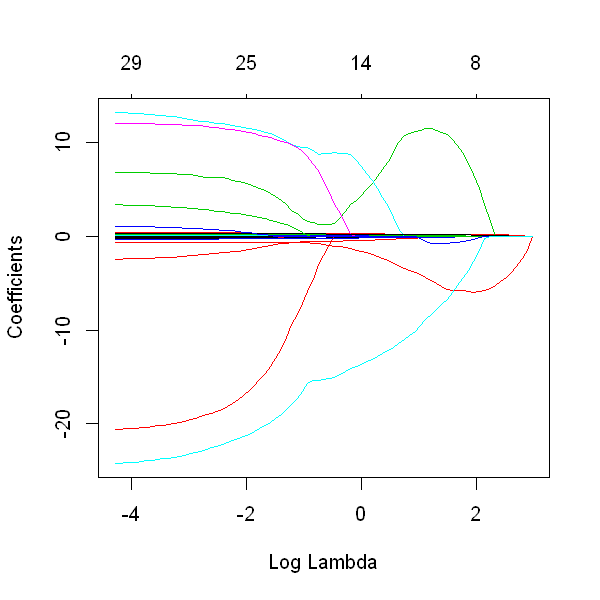

In [41]:
# plot coefficients against log lambda
options(repr.plot.width = 5, repr.plot.height = 5)
plot(lasso.mod, xvar = "lambda")


The optimal lambda value post cross-validated is: 0.01829243

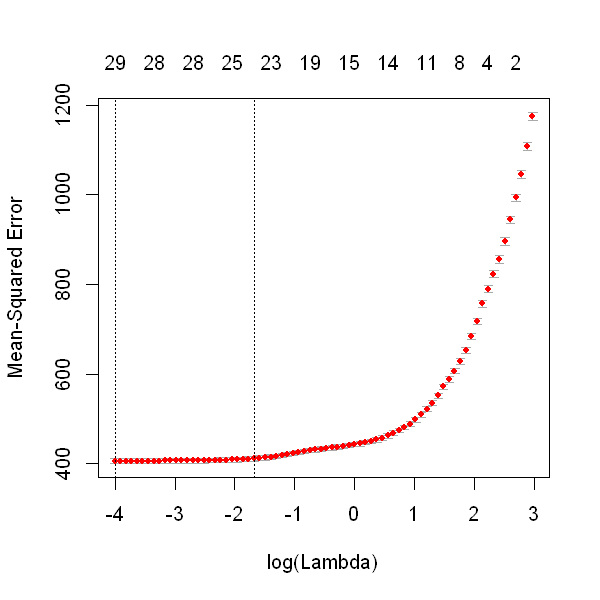

In [42]:
#finding the optimla lambda value 
# seed to get same result
set.seed(1111)

#fit a lasso model with cross-validation using the cv.glmnet() function
lasso.cv = cv.glmnet(xmat, df.train1$critical_temp, alpha = 1)

# plot the MSE as a function of the logarithm of $\lambda$ with error bars.
plot(lasso.cv)

# get the minimum lambda value
bestlam <- lasso.cv$lambda.min
cat("\nThe optimal lambda value post cross-validated is:", bestlam)

In [125]:
# using the best lambda to predict critical temp from training data 
#fit.lasso <- glmnet(xmat, y, alpha = 1)
predict(lasso.mod, s = bestlam, type = "coefficients")[1:30, ]


(Intercept)                mean_atomic_mass 
                  -5.311347e+00                    7.102862e-03 
          wtd_range_atomic_mass                 std_atomic_mass 
                  -1.460861e-01                    2.972008e-01 
                      gmean_fie                   wtd_range_fie 
                   3.008394e-02                   -1.611385e-02 
             mean_atomic_radius         wtd_range_atomic_radius 
                   3.277822e-02                   -1.103278e-01 
              std_atomic_radius             wtd_entropy_Density 
                   3.590650e-01                    6.697453e+00 
                  range_Density               wtd_range_Density 
                  -8.885582e-04                    1.872120e-03 
          mean_ElectronAffinity      wtd_gmean_ElectronAffinity 
                   1.383647e-01                   -2.479887e-01 
   wtd_entropy_ElectronAffinity          range_ElectronAffinity 
                  -2.015552e+01                   -8.832017e-03 
       wtd_std_ElectronAffinity                gmean_FusionHeat 
                   0.000000e+00                    8.948628e-02 
               range_FusionHeat            wtd_range_FusionHeat 
                  -3.003642e-02                    1.691498e-02 
             wtd_std_FusionHeat        mean_ThermalConductivity 
                  -6.943804e-01                    1.678829e-01 
  wtd_gmean_ThermalConductivity     entropy_ThermalConductivity 
                  -3.105477e-01                    1.286427e+01 
wtd_entropy_ThermalConductivity   wtd_range_ThermalConductivity 
                   1.192908e+01                    2.652986e-01 
                  gmean_Valence                   range_Valence 
                  -2.296616e+00                    3.180457e+00 
              wtd_range_Valence                 wtd_std_Valence 
                   9.616247e-01                   -2.376485e+01

In [44]:
cat("\n Attributes with non-zero coefficient estimates:",
    (sum(predict(lasso.mod, s = bestlam, type = "coefficients")!=0))-1)



 Attributes with non-zero coefficient estimates: 29

<a id='MD4'></a>
### 3.4 Ridge Regularisation for feature selection

The Ridge regularization will shrink all the estimated parameters towards zero, but never equal to zero.
Now fitting a ridge regression model on the training set. The shrinkage parameter $\lambda$ is chosen by cross-validation. The  training and test data taken is a matrix as in Lasso.

In [45]:
#RIDGE REGRESSION
#fitting lasso model on df.train
ridge.mod = glmnet(xmat, df.train1$critical_temp,  family="gaussian", alpha = 0)

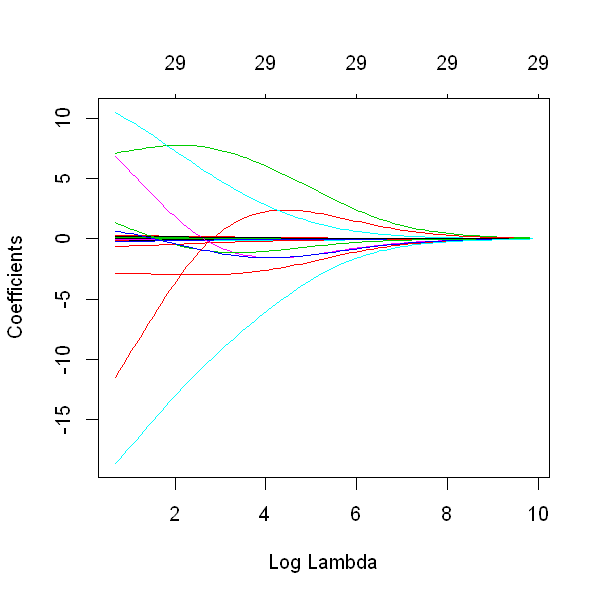

In [46]:
# plot coefficients against log lambda
plot(ridge.mod, xvar = "lambda")


In [47]:
#finding the optimla lambda value 
# seed to get same result
set.seed(1111)

#fit a ridge model with cross-validation using the cv.glmnet() function
ridge.cv = cv.glmnet(xmat, df.train1$critical_temp, alpha = 0)


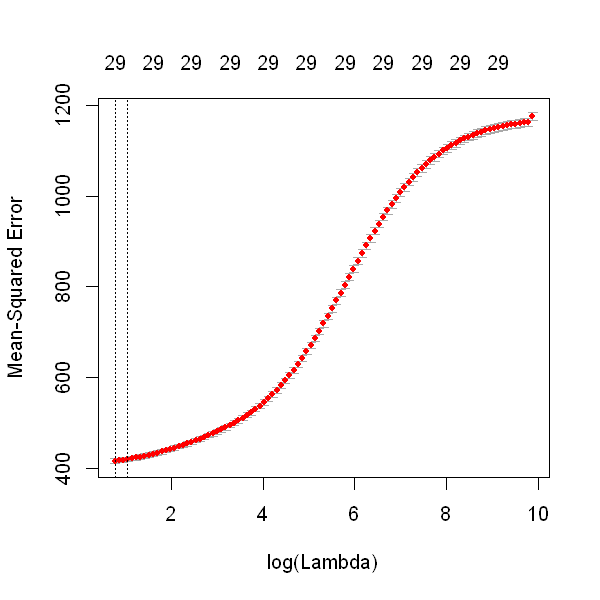

In [48]:
# plot the MSE as a function of the logarithm of $\lambda$ with error bars.
plot(ridge.cv)


In [49]:
# get the minimum lambda value
bestlam <- ridge.cv$lambda.min
cat("\nThe optimal lambda value post cross-validated is:", bestlam)
# using the best lambda to predict critical temp from training data 



The optimal lambda value post cross-validated is: 2.152675

In [50]:
#fit.lasso <- glmnet(xmat, y, alpha = 1)
predict(ridge.mod, s = bestlam, type = "coefficients")[1:30, ]
cat("\n Attributes with non-zero coefficient estimates:",
    (sum(predict(ridge.mod, s = bestlam, type = "coefficients")!=0))-1)


(Intercept)                mean_atomic_mass 
                  -7.567744e+00                    8.359225e-04 
          wtd_range_atomic_mass                 std_atomic_mass 
                  -1.203873e-01                    2.430939e-01 
                      gmean_fie                   wtd_range_fie 
                   3.115110e-02                   -9.715746e-03 
             mean_atomic_radius         wtd_range_atomic_radius 
                   5.172233e-02                   -8.177878e-02 
              std_atomic_radius             wtd_entropy_Density 
                   2.850419e-01                    7.163837e+00 
                  range_Density               wtd_range_Density 
                  -5.177111e-04                    1.195739e-03 
          mean_ElectronAffinity      wtd_gmean_ElectronAffinity 
                   3.527187e-02                   -1.848607e-01 
   wtd_entropy_ElectronAffinity          range_ElectronAffinity 
                  -1.093063e+01                   -2.450262e-03 
       wtd_std_ElectronAffinity                gmean_FusionHeat 
                   7.552679e-02                    3.411616e-02 
               range_FusionHeat            wtd_range_FusionHeat 
                  -2.703057e-02                    1.088816e-02 
             wtd_std_FusionHeat        mean_ThermalConductivity 
                  -6.193775e-01                    1.505689e-01 
  wtd_gmean_ThermalConductivity     entropy_ThermalConductivity 
                  -2.300796e-01                    1.028575e+01 
wtd_entropy_ThermalConductivity   wtd_range_ThermalConductivity 
                   6.503429e+00                    2.169412e-01 
                  gmean_Valence                   range_Valence 
                  -2.842039e+00                    1.201974e+00 
              wtd_range_Valence                 wtd_std_Valence 
                   5.795361e-01                   -1.824599e+01


 Attributes with non-zero coefficient estimates: 29

<a id='MD5'></a>
### 3.5 Elastic Net Regularisation for feature selection

This is a regularization that takes into account both, lasso and ridge regularization.


In [51]:
#ELASTIC NET 
#fitting ELASTIC NET model on df.train
elastic.mod = glmnet(xmat, df.train1$critical_temp,  family="gaussian", alpha = 0.5)


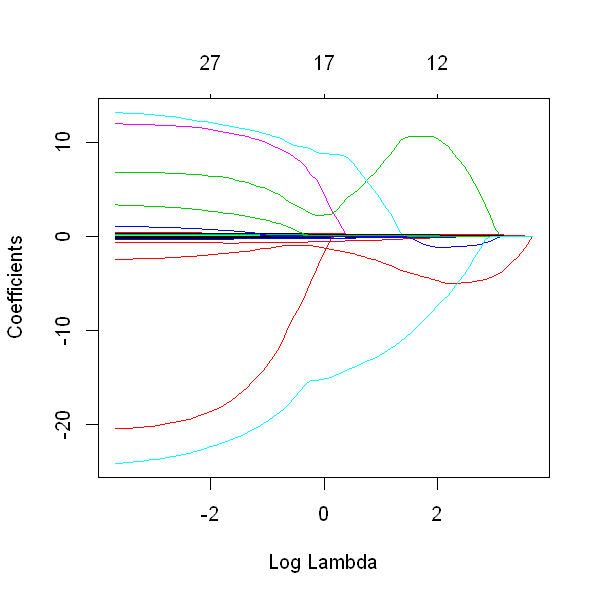

In [52]:
# plot coefficients against log lambda
plot(elastic.mod, xvar = "lambda")


In [53]:
#finding the optimla lambda value 
# seed to get same result
set.seed(1111)

#fit a elastic net model with cross-validation using the cv.glmnet() function
elastic.cv = cv.glmnet(xmat, df.train1$critical_temp, alpha = .5)


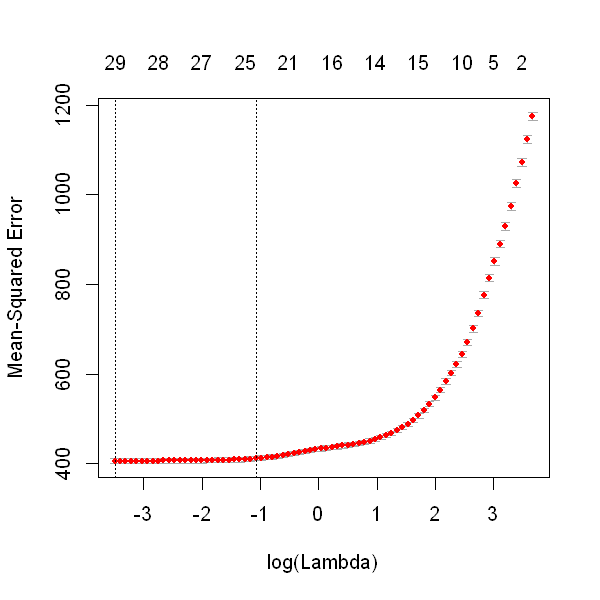

In [54]:
# plot the MSE as a function of the logarithm of $\lambda$ with error bars.
plot(elastic.cv)

In [55]:
# get the minimum lambda value
bestlam <- elastic.cv$lambda.min
cat("\nThe optimal lambda value post cross-validated is:", bestlam)
# using the best lambda to predict critical temp from training data 



The optimal lambda value post cross-validated is: 0.03037339

In [56]:
#fit.lasso <- glmnet(xmat, y, alpha = 1)
predict(elastic.mod, s = bestlam, type = "coefficients")[1:30, ]
cat("\n Attributes with non-zero coefficient estimates:",
    (sum(predict(elastic.mod, s = bestlam, type = "coefficients")!=0))-1)


(Intercept)                mean_atomic_mass 
                  -6.181338e+00                    8.546678e-03 
          wtd_range_atomic_mass                 std_atomic_mass 
                  -1.501572e-01                    3.007578e-01 
                      gmean_fie                   wtd_range_fie 
                   3.107258e-02                   -1.642252e-02 
             mean_atomic_radius         wtd_range_atomic_radius 
                   3.495279e-02                   -1.119856e-01 
              std_atomic_radius             wtd_entropy_Density 
                   3.611104e-01                    6.812854e+00 
                  range_Density               wtd_range_Density 
                  -9.168388e-04                    1.934655e-03 
          mean_ElectronAffinity      wtd_gmean_ElectronAffinity 
                   1.466736e-01                   -2.522795e-01 
   wtd_entropy_ElectronAffinity          range_ElectronAffinity 
                  -2.045409e+01                   -1.211461e-02 
       wtd_std_ElectronAffinity                gmean_FusionHeat 
                   2.336384e-03                    9.481757e-02 
               range_FusionHeat            wtd_range_FusionHeat 
                  -3.641975e-02                    2.045964e-02 
             wtd_std_FusionHeat        mean_ThermalConductivity 
                  -6.870732e-01                    1.688200e-01 
  wtd_gmean_ThermalConductivity     entropy_ThermalConductivity 
                  -3.129596e-01                    1.312583e+01 
wtd_entropy_ThermalConductivity   wtd_range_ThermalConductivity 
                   1.195176e+01                    2.654061e-01 
                  gmean_Valence                   range_Valence 
                  -2.442939e+00                    3.301465e+00 
              wtd_range_Valence                 wtd_std_Valence 
                   1.047854e+00                   -2.409849e+01


 Attributes with non-zero coefficient estimates: 29

<a id='MD6'></a>
### 3.6 Random Forest Model

Another way of variable selection could be, by fitting a Random forest model on entire data and then using the variables out of its feature importance.

Ref https://www.guru99.com/r-random-forest-tutorial.html (Explanation and Code)

Aim is to evaluate the performance of a model by training on different datasets and evaluate them over the other smaller testing set a.k.a K Fold cross-validation. R has a function to randomly split number of datasets of almost the same size. For example, if k=9, the model is evaluated over the nine folder and tested on the remaining test set. This process is repeated until all the subsets have been evaluated. This technique is widely used for model selection, especially when the model has parameters to tune.

Now that we have a way to evaluate our model, we need to figure out how to choose the parameters that generalized best the data.

Random forest chooses a random subset of features and builds many Decision Trees. The model averages out all the predictions of the Decisions trees.

Random forest has some parameters that can be changed to improve the generalization of the prediction.

Will be using the function RandomForest() to train the model.


The following code is to find the best mtry using cross validation

In [8]:

#Evaluate the model with a grid search of 10 folder
trControl <- trainControl(method = "cv", number = 10, search = "grid")

# try to run the model with the default parameters and see the accuracy score.
# train(formula, df, method = "rf", metric= "Accuracy", trControl = trainControl(), tuneGrid = NULL)

set.seed(1234)
# Run the model
rf_default <- train(critical_temp~.,data = df.train1, method = "rf", metric = "MSE", trControl = trControl)
# Print the results
print(rf_default)



Warning message in train.default(x, y, weights = w, ...):
"The metric "MSE" was not in the result set. RMSE will be used instead."

Random Forest 

15947 samples
   29 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 14352, 14353, 14351, 14352, 14353, 14354, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   2    9.684613  0.9208506  5.696841
  15    9.605888  0.9217693  5.519002
  29    9.900005  0.9167543  5.615755

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 15.


RandomForest(formula, ntree=n, mtry=FALSE, maxnodes = NULL)
Arguments:
- Formula: Formula of the fitted model
- ntree: number of trees in the forest
- mtry: Number of candidates draw to feed the algorithm. By default, it is the square of the number of columns.
- maxnodes: Set the maximum amount of terminal nodes in the forest
- importance=TRUE: Whether independent variables importance in the random forest be assessed

In [172]:
fit.rf <- randomForest(critical_temp~., df.train1,ntree=100, mtry=15, maxnodes=NULL, importance=TRUE)
fit.rf


Call:
 randomForest(formula = critical_temp ~ ., data = df.train1, ntree = 100,      mtry = 15, maxnodes = NULL, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 15

          Mean of squared residuals: 92.47283
                    % Var explained: 92.13

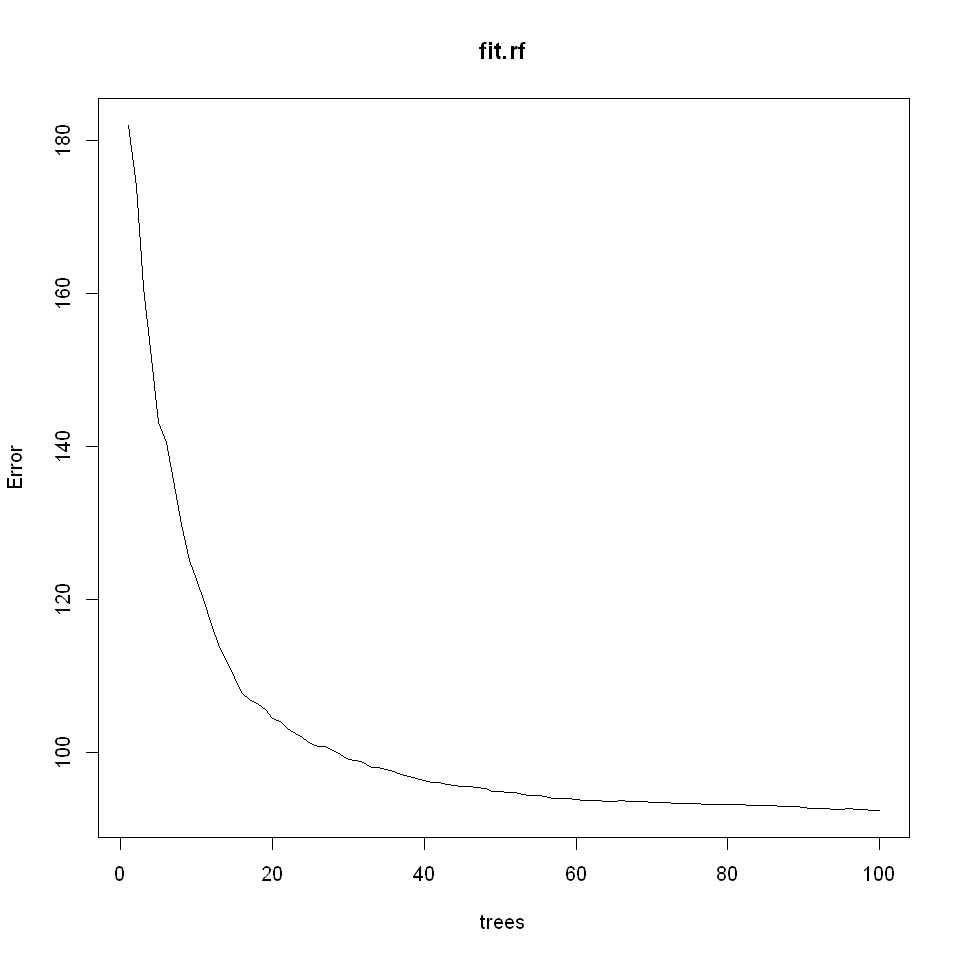

In [192]:
plot(fit.rf)

<a id='MC'></a>
### 4. Model Comparision

Now compare the models based on their test and train MSE

#Code from House Price Prediction tutorial

#### Function to Calculate MSE

Name: MSE

Input parameters:
- predicted - a vector of predictions
- target - a vector containing the target values for the predictions 

Return Value:

The MSE value calculated from the predicted and target values

In [76]:
Model.Accuracy <- function(predicted, target, df, p) {
    rss <- 0
    tss <- 0
    target.mean <- mean(target)
    for (i in 1:length(predicted)) {
        rss <- rss + (predicted[i]-target[i])^2
        tss <- tss + (target[i]-target.mean)^2
    }
    rsquared <- 1 - rss/tss
    rse <- sqrt(rss/df)
    f.stat <- ((tss-rss)/p) / (rss/df)
    return(list(rsquared=rsquared,rse=rse,f.stat=f.stat))
}

MSE <- function(predicted, target) {
    se <- 0
    for (i in 1:length(predicted)) {
        se <- se + (predicted[i]-target[i])^2
    }
    return ((se/length(predicted)))
    }

Prediction based on Full Linear model

In [129]:
fit1 <- lm(critical_temp ~ ., data=df.train)
cat("R-Squared:",Model.Accuracy(fit1$fitted.values,df.train$critical_temp, df.train, 0)$rsquared)

full.mse <- MSE(fit1$fitted.values,df.train$critical_temp)
cat("\nMSE for train model predictions is:",full.mse,"; which is",sqrt(full.mse*100/mean(df.train$critical_temp)),
    "% of the mean critical temperature.")

#MSE on test data
yhat1 <- predict(fit1, newdata=df.test[,-82])

mse1 <- mean((df.test[,82] - yhat1)^2)
cat("\nMSE for test model predictions is:",mse1,"; which is",sqrt(mse2*100/mean(df.test1$critical_temp)),
    "% of the mean critical temperature.")

R-Squared: 0.7373366
MSE for train model predictions is: 308.7311 ; which is 29.91781 % of the mean critical temperature.
MSE for test model predictions is: 308.2936 ; which is 34.88375 % of the mean critical temperature.

Prediction based on stepwise backward model

In [131]:
fit2 <- lm(critical_temp ~ 
std_atomic_mass+wtd_range_atomic_radius+std_atomic_radius
+mean_ElectronAffinity+wtd_gmean_ElectronAffinity+wtd_entropy_ElectronAffinity
+wtd_std_FusionHeat+mean_ThermalConductivity+wtd_gmean_ThermalConductivity
+entropy_ThermalConductivity+wtd_entropy_ThermalConductivity+wtd_range_ThermalConductivity
+wtd_std_Valence  , data=df.train1)

cat("R-Squared:",Model.Accuracy(fit2$fitted.values,df.train1$critical_temp, df.train1, 0)$rsquared)

full.mse <- MSE(fit2$fitted.values,df.train1$critical_temp)
cat("\nMSE for train model predictions is:",full.mse,"; which is",sqrt(full.mse*100/mean(df.train1$critical_temp)),
    "% of the mean critical temperature")

#MSE on test data
yhat2 <- predict(fit2, newdata=df.test1[,-30])

mse2 <- mean((df.test1[,30] - yhat2)^2)
cat("\nMSE for test model predictions is:",mse2,"; which is",sqrt(mse2*100/mean(df.test1$critical_temp)),
    "% of the mean critical temperature.")

R-Squared: 0.6424722
MSE for train model predictions is: 420.2335 ; which is 34.90478 % of the mean critical temperature
MSE for test model predictions is: 416.2731 ; which is 34.88375 % of the mean critical temperature.

Prediction based on stepwise forward model

In [133]:
fit3 <- lm(critical_temp ~ 
std_atomic_mass+wtd_range_atomic_radius+std_atomic_radius
+mean_ElectronAffinity+wtd_gmean_ElectronAffinity+wtd_entropy_ElectronAffinity
+wtd_std_FusionHeat+mean_ThermalConductivity+wtd_gmean_ThermalConductivity
+entropy_ThermalConductivity+wtd_entropy_ThermalConductivity+wtd_range_ThermalConductivity+gmean_Valence+range_Valence
+wtd_std_Valence  , data=df.train1)

cat("R-Squared:",Model.Accuracy(fit3$fitted.values,df.train1$critical_temp, df.train1, 0)$rsquared)

full.mse <- MSE(fit3$fitted.values,df.train1$critical_temp)

cat("\nMSE for train model predictions is:",full.mse,"; which is",sqrt(full.mse*100/mean(df.train1$critical_temp)),
    "% of the mean critical temperature.")

#MSE on test data
yhat3 <- predict(fit3, newdata=df.test1[,-30])

mse3 <- mean((df.test1[,30] - yhat3)^2)
cat("\nMSE for test model predictions is:",mse3,"; which is",sqrt(mse3*100/mean(df.test1$critical_temp)),
    "% of the mean critical temperature.")

R-Squared: 0.6436107
MSE for train model predictions is: 418.8953 ; which is 34.84916 % of the mean critical temperature.
MSE for test model predictions is: 416.2828 ; which is 34.88416 % of the mean critical temperature.

Prediction based on exhaustive model for subset selection

In [138]:
fit4 <- lm(critical_temp ~ 
std_atomic_mass+wtd_range_atomic_radius+std_atomic_radius+range_Density
+mean_ElectronAffinity+wtd_gmean_ElectronAffinity+wtd_entropy_ElectronAffinity
+wtd_std_FusionHeat+mean_ThermalConductivity+wtd_gmean_ThermalConductivity
+entropy_ThermalConductivity+wtd_entropy_ThermalConductivity+wtd_range_ThermalConductivity+range_Valence
+wtd_std_Valence  , data=df.train1)

cat("R-Squared:",Model.Accuracy(fit4$fitted.values,df.train1$critical_temp, df.train1, 0)$rsquared)

full.mse <- MSE(fit4$fitted.values,df.train1$critical_temp)

cat("\nMSE for train model predictions is:",full.mse,"; which is",sqrt(full.mse*100/mean(df.train1$critical_temp)),
    "% of the mean critical temperature.")

#MSE on test data
yhat4 <- predict(fit4, newdata=df.test1[,-30])

mse4 <- mean((df.test1[,30] - yhat4)^2)
cat("\nMSE for test model predictions is:",mse4,"; which is",sqrt(mse4*100/mean(df.test1$critical_temp)),
    "% of the mean critical temperature.")

R-Squared: 0.6459884
MSE for train model predictions is: 416.1005 ; which is 34.73272 % of the mean critical temperature.
MSE for test model predictions is: 412.7167 ; which is 34.73442 % of the mean critical temperature.

Prediction based on Lasso Regularisation for feature selection


In [137]:
lasso <- predict(lasso.mod, s = bestlam, newx = xmat)
full.mse <- mean((lasso-df.train1$critical_temp)^2)

cat("\nMSE for full model predictions is:",full.mse,"; which is",sqrt(full.mse*100/mean(df.train1$critical_temp)),
    "% of the mean critical temperature.")

#MSE on test data
yhat5 <- predict(lasso.mod, s = bestlam, newx = xmat_test)
mse5<-  mean((yhat5 - df.test1$critical_temp)^2)

cat("\nMSE for test model predictions is:",mse5,"; which is",sqrt(mse5*100/mean(df.test1$critical_temp)),
    "% of the mean critical temperature.")


MSE for full model predictions is: 405.0395 ; which is 34.26797 % of the mean critical temperature.
MSE for test model predictions is: 403.196 ; which is 34.33145 % of the mean critical temperature.

Prediction based on Ridge Regularisation for feature selection

In [139]:
ridge <- predict(ridge.mod, s = bestlam, newx = xmat)
full.mse <- mean((ridge-df.train1$critical_temp)^2)

cat("\nMSE for full model predictions is:",full.mse,"; which is",sqrt(full.mse*100/mean(df.train1$critical_temp)),
    "% of the mean critical temperature.")

#MSE on test data
yhat6 <- predict(ridge.mod, s = bestlam, newx = xmat_test)
mse6<-  mean((yhat6 - df.test1$critical_temp)^2)

cat("\nMSE for test model predictions is:",mse6,"; which is",sqrt(mse6*100/mean(df.test1$critical_temp)),
    "% of the mean critical temperature.")


MSE for full model predictions is: 413.429 ; which is 34.62104 % of the mean critical temperature.
MSE for test model predictions is: 412.0542 ; which is 34.70653 % of the mean critical temperature.

Prediction based on Elastic Net Regularisation for feature selection

In [140]:
elastic <- predict(elastic.mod, s = bestlam, newx = xmat)
full.mse <- mean((elastic-df.train1$critical_temp)^2)

cat("\nMSE for full model predictions is:",full.mse,"; which is",sqrt(full.mse*100/mean(df.train1$critical_temp)),
    "% of the mean critical temperature.")

#MSE on test data
yhat7 <- predict(elastic.mod, s = bestlam, newx = xmat_test)
mse7<-  mean((yhat7 - df.test1$critical_temp)^2)

cat("\nMSE for test model predictions is:",mse7,"; which is",sqrt(mse7*100/mean(df.test1$critical_temp)),
    "% of the mean critical temperature.")


MSE for full model predictions is: 404.9129 ; which is 34.26261 % of the mean critical temperature.
MSE for test model predictions is: 402.9745 ; which is 34.32202 % of the mean critical temperature.

Prediction based on Random Forest Model

In [173]:
prediction_rf <-predict(fit.rf, df.train1)
full.mse <- mean((prediction_rf - df.train1$critical_temp)^2)

cat("\nMSE for train model predictions is:",full.mse,"; which is",sqrt(full.mse*100/mean(df.train1$critical_temp)),
    "% of the mean critical temperature.")

#MSE on test data
yhat8 <- predict(fit.rf, df.test1)
mse8<-  mean((yhat8 - df.test1$critical_temp)^2)

cat("\nMSE for test model predictions is:",mse8,"; which is",sqrt(mse8*100/mean(df.test1$critical_temp)),
    "% of the mean critical temperature.")


MSE for train model predictions is: 28.24006 ; which is 9.048414 % of the mean critical temperature.
MSE for test model predictions is: 95.85293 ; which is 16.73928 % of the mean critical temperature.

The above results indicate that random forest is the best for prediction as the test MSE  is the least for random forest model.


<a id='VE'></a>
### Variable Identification and Explanation

The variables chosen for modelling purpose (and in the best model - random forest) are the ones that have most distinct relationship with critical temperature and have no corelation with other variables in the selection.
These varaibels are representative of all the eight features.
The main reason they got used in modelling can be traced from the EDA.

Starting by explaining the variables in sets:

SET1 

gmean_fie

gmean_FusionHeat

gmean_Valence

mean_atomic_mass

mean_atomic_radius

mean_ElectronAffinity

mean_ThermalConductivity


From the EDA we realised that across almost all the 8 attributes mean and geomteric mean has same distribution and had the very similar dependency on critical temperature.
This is the reason that no two same attributes (amongst Atomic Mass, First Ionization Energy, Atomic Radius, Density, Elec-
tron Afinity, Fusion Heat, Thermal Conductivity, Valence) are repeating in the mean and geometric mean terms.

This can be visualized in the below graph

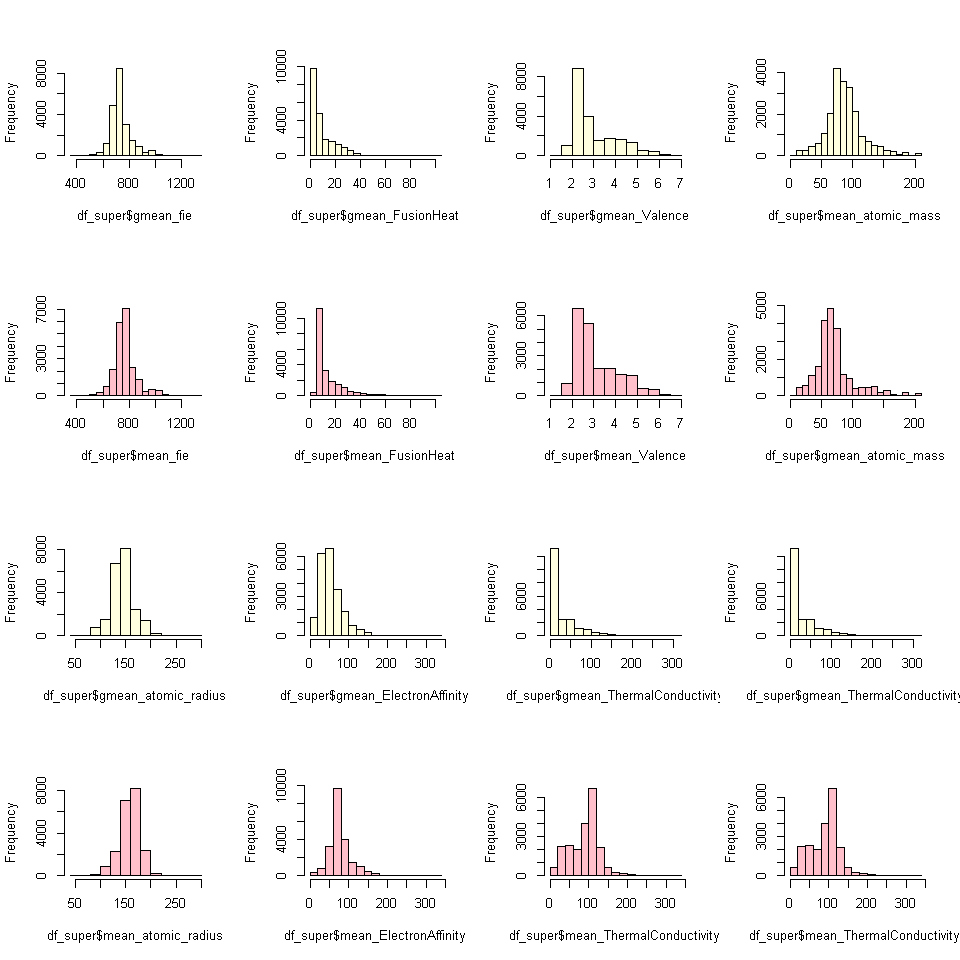

In [203]:
par(mfrow = c(4,4))
hist(df_super$gmean_fie, main =NULL,col='lightyellow')
hist(df_super$gmean_FusionHeat,main =NULL, col='lightyellow')
hist(df_super$gmean_Valence, main =NULL,col='lightyellow')
hist(df_super$mean_atomic_mass, main =NULL,col='lightyellow')

hist(df_super$mean_fie, main =NULL,col='pink')
hist(df_super$mean_FusionHeat,  main =NULL,col='pink')
hist(df_super$mean_Valence, main =NULL,col='pink')
hist(df_super$gmean_atomic_mass, main =NULL,col='pink')


hist(df_super$gmean_atomic_radius, main =NULL,col='lightyellow')
hist(df_super$gmean_ElectronAffinity, main =NULL,col='lightyellow')
hist(df_super$gmean_ThermalConductivity, main =NULL,col='lightyellow')
#hist(df_super$gmean_ThermalConductivity, main =NULL,col='lightyellow')


hist(df_super$mean_atomic_radius, main =NULL,col='pink')
hist(df_super$mean_ElectronAffinity, main =NULL,col='pink')
hist(df_super$mean_ThermalConductivity, main =NULL,col='pink')
#hist(df_super$mean_ThermalConductivity, main =NULL,col='pink')


As seen in the above graph, the row 1 and row 3 variables that have been selected in the model, have very similar distribution as the row 2 and row 4 graphs

SET 2

wtd_range_atomic_mass

wtd_range_atomic_radius

wtd_range_Density

wtd_range_fie

wtd_range_FusionHeat

wtd_range_ThermalConductivity

wtd_range_Valence


These variable had the most distinct distribution and impact on critical temperature. 
Hardly were other varibles corelated with the weighted range variation of the 8 main attributes


SET 3

std_atomic_mass

std_atomic_radius

wtd_std_ElectronAffinity

wtd_std_FusionHeat

wtd_std_Valence

From the EDA it was clear that standard deviation and weighted standard deviation of attributes are highly co-related.
This is the reason that no two same attributes (amongst Atomic Mass, Atomic Radius, Elec-
tron Afinity, Fusion Heat, Valence) are repeating in standard deviation and weighted standard deviation.

The below plot expalins that

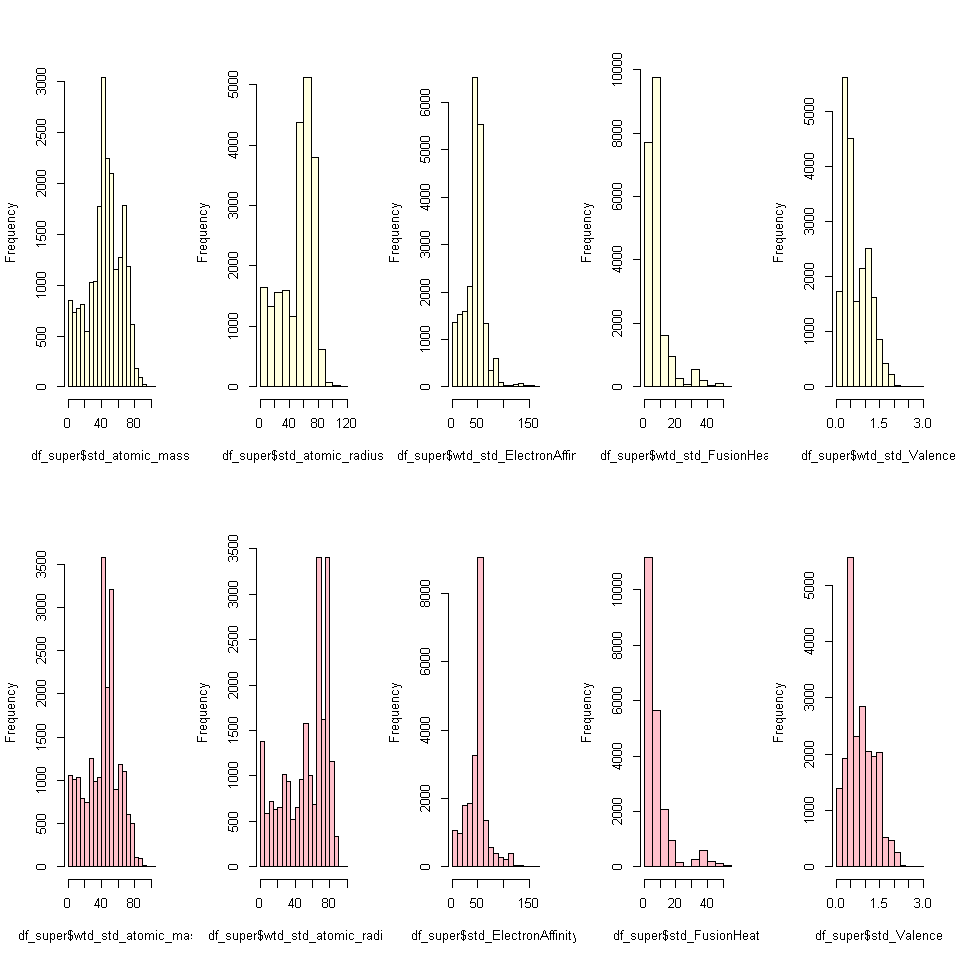

In [202]:
par(mfrow = c(2,5))
hist(df_super$std_atomic_mass, main =NULL,col='lightyellow')
hist(df_super$std_atomic_radius,main =NULL, col='lightyellow')
hist(df_super$wtd_std_ElectronAffinity, main =NULL,col='lightyellow')
hist(df_super$wtd_std_FusionHeat, main =NULL,col='lightyellow')
hist(df_super$wtd_std_Valence, main =NULL,col='lightyellow')

hist(df_super$wtd_std_atomic_mass, main =NULL,col='pink')
hist(df_super$wtd_std_atomic_radius,main =NULL, col='pink')
hist(df_super$std_ElectronAffinity, main =NULL,col='pink')
hist(df_super$std_FusionHeat, main =NULL,col='pink')
hist(df_super$std_Valence, main =NULL,col='pink')



As seen in the above graph, the row 1 variables that have been selected in the model, have very similar distribution as the row 2 graphs

SET 3

Thermal conductivity based variables

entropy_ThermalConductivity

wtd_entropy_ThermalConductivity

wtd_gmean_ThermalConductivity

As thermal conductivity is a very important measure afftecting the critical temperature, and since these variables were very different from other variables, they also got chosen in the model


SET4

The range variables are were in general highly corelated with standard deviation and weighted standard deviation variables for the same primary attribute hence it makes sense to add them in the model as these explain predictability highly 

range_FusionHeat

range_Valence

range_Density

range_ElectronAffinity

SET 5

wtd_entropy_ElectronAffinity - no corelation with any other variable

wtd_entropy_Density -  no corelation with any other variable

wtd_gmean_ElectronAffinity - no corelation with any other variable


<a id='CON'></a>
### 5. Conclusion

Developed a random forest model in Section 3 that gives a MSE of 92 when tested on when predicting the test data.
We have overcome the issue of high corelation amongst the variables and maybe with more models the number of variables used can be bought down significantly. The only cost of simplifying the model would be decreased accuracy. This could highly improve the explanability of the model though. 

Furthermore, we can improvise the model by looking at some more attributes impacting the critical temperature.
One issue with random forest is that it overfits the model, but since we do not have more testing data, we cannot confirm at this stage


<a id='REF'></a>
### 6. References

1. https://www.r-bloggers.com/collinearity-and-stepwise-vif-selection/

2. https://www.guru99.com/r-random-forest-tutorial.html

3. https://stats.stackexchange.com/questions/61090/how-to-split-a-data-set-to-do-10-fold-cross-validation

4. All tutorial content 
